# Homework #8
Name: Gunhoo Park  
USC ID: 8585425433  
Github username: gunhoo

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [5]:
FILE_PATH = "../data/breast+cancer+wisconsin+diagnostic/wdbc.data"
df = pd.read_csv(FILE_PATH,header=None)
df

0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26       27      28  \
0    0.14710  ...  25.380  17.33  184.60  2019.0  0.16220  0.66560  0.7119   
1    0.07017  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660  0.2416   
2    0.12790  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.4504   
3    0.10520  ...  14.910  26.50   98.87   567.7  0.20980  0.86630  0.6869   
4    0.10430  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500  0.4000   
..       ...  ...     ...    ...     ...     ...      ...      ...     ...   
564  0.13890  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
565  0.09791  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
566  0.05302  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
567  0.15200  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
568  0.00000  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

         29      30       31  
0    0.2654  0.4601  0.11890  
1    0.1860  0.2750  0.08902  
2    0.2430  0.3613  0.08758  
3    0.2575  0.6638  0.17300  
4    0.1625  0.2364  0.07678  
..      ...     ...      ...  
564  0.2216  0.2060  0.07115  
565  0.1628  0.2572  0.06637  
566  0.1418  0.2218  0.07820  
567  0.2650  0.4087  0.12400  
568  0.0000  0.2871  0.07039  

[569 rows x 32 columns]

In [6]:
['ID',np.arange(30)]
df.columns=['ID', 'class']+ list(f"column{i}" for i in np.arange(1, 31)) 
df.replace({'M': 1, 'B': 0}, inplace=True)
df

ID  class  column1  column2  column3  column4  column5  column6  \
0      842302      1    17.99    10.38   122.80   1001.0  0.11840  0.27760   
1      842517      1    20.57    17.77   132.90   1326.0  0.08474  0.07864   
2    84300903      1    19.69    21.25   130.00   1203.0  0.10960  0.15990   
3    84348301      1    11.42    20.38    77.58    386.1  0.14250  0.28390   
4    84358402      1    20.29    14.34   135.10   1297.0  0.10030  0.13280   
..        ...    ...      ...      ...      ...      ...      ...      ...   
564    926424      1    21.56    22.39   142.00   1479.0  0.11100  0.11590   
565    926682      1    20.13    28.25   131.20   1261.0  0.09780  0.10340   
566    926954      1    16.60    28.08   108.30    858.1  0.08455  0.10230   
567    927241      1    20.60    29.33   140.10   1265.0  0.11780  0.27700   
568     92751      0     7.76    24.54    47.92    181.0  0.05263  0.04362   

     column7  column8  ...  column21  column22  column23  column24  column25  \
0    0.30010  0.14710  ...    25.380     17.33    184.60    2019.0   0.16220   
1    0.08690  0.07017  ...    24.990     23.41    158.80    1956.0   0.12380   
2    0.19740  0.12790  ...    23.570     25.53    152.50    1709.0   0.14440   
3    0.24140  0.10520  ...    14.910     26.50     98.87     567.7   0.20980   
4    0.19800  0.10430  ...    22.540     16.67    152.20    1575.0   0.13740   
..       ...      ...  ...       ...       ...       ...       ...       ...   
564  0.24390  0.13890  ...    25.450     26.40    166.10    2027.0   0.14100   
565  0.14400  0.09791  ...    23.690     38.25    155.00    1731.0   0.11660   
566  0.09251  0.05302  ...    18.980     34.12    126.70    1124.0   0.11390   
567  0.35140  0.15200  ...    25.740     39.42    184.60    1821.0   0.16500   
568  0.00000  0.00000  ...     9.456     30.37     59.16     268.6   0.08996   

     column26  column27  column28  column29  column30  
0     0.66560    0.7119    0.2654    0.4601   0.11890  
1     0.18660    0.2416    0.1860    0.2750   0.08902  
2     0.42450    0.4504    0.2430    0.3613   0.08758  
3     0.86630    0.6869    0.2575    0.6638   0.17300  
4     0.20500    0.4000    0.1625    0.2364   0.07678  
..        ...       ...       ...       ...       ...  
564   0.21130    0.4107    0.2216    0.2060   0.07115  
565   0.19220    0.3215    0.1628    0.2572   0.06637  
566   0.30940    0.3403    0.1418    0.2218   0.07820  
567   0.86810    0.9387    0.2650    0.4087   0.12400  
568   0.06444    0.0000    0.0000    0.2871   0.07039  

[569 rows x 32 columns]

## (b) Monte-Carlo Simulation:

Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

### i. Supervised Learning:

Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [11]:
summary = {}

In [12]:
def split_data(dataset, seed, test_ratio=0.2):
    np.random.seed(seed)
    class_0_indices = dataset.index[dataset['class'] == 0].to_numpy()
    class_1_indices = dataset.index[dataset['class'] == 1].to_numpy()
    test_count_0 = int(len(class_0_indices) * test_ratio)
    test_count_1 = int(len(class_1_indices) * test_ratio)
    test_indices_0 = np.random.choice(class_0_indices, test_count_0, replace=False)
    test_indices_1 = np.random.choice(class_1_indices, test_count_1, replace=False)
    test_indices = np.hstack((test_indices_0, test_indices_1))
    train_indices = np.setdiff1d(dataset.index, test_indices)
    features_start_col = 2
    train_features = dataset.loc[train_indices, dataset.columns[features_start_col:]].reset_index(drop=True)
    train_labels = dataset.loc[train_indices, 'class'].reset_index(drop=True)
    test_features = dataset.loc[test_indices, dataset.columns[features_start_col:]].reset_index(drop=True)
    test_labels = dataset.loc[test_indices, 'class'].reset_index(drop=True)
    return train_features, test_features, train_labels, test_labels

In [13]:
x_train, x_test, y_train, y_test = split_data(df, 0)

In [14]:
normalizer = Normalizer()
x_train_normalized = pd.DataFrame(normalizer.fit_transform(x_train))
x_test_normalized = pd.DataFrame(normalizer.transform(x_test))

In [15]:
# Utility Functions
def calculate_metrics(actual, predicted, predicted_prob):
    """Calculate accuracy, precision, recall, F1-score, and AUC."""
    report = classification_report(actual, predicted, output_dict=True)
    fpr, tpr, _ = roc_curve(actual, predicted_prob, pos_label=1)
    return {
        'accuracy': round(accuracy_score(actual, predicted), 4),
        'precision': round(report['weighted avg']['precision'], 4),
        'recall': round(report['weighted avg']['recall'], 4),
        'f1-score': round(report['weighted avg']['f1-score'], 4),
        'auc': round(auc(fpr, tpr), 4),
    }

def plot_roc_curve(actual, predicted_prob, title):
    """Plot ROC curve."""
    fpr, tpr, _ = roc_curve(actual, predicted_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {round(roc_auc, 2)})")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

def evaluate_model(clf, x, y, title):
    """Predict, evaluate, and plot results for a given model."""
    predicted = clf.predict(x)
    predicted_prob = clf.decision_function(x)
    metrics = calculate_metrics(y, predicted, predicted_prob)
    plot_roc_curve(y, predicted_prob, title)
    conf_matrix = confusion_matrix(y, predicted)
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()
    return metrics, conf_matrix

# Monte Carlo Simulation for SVM
def monte_carlo_svm(data, iterations, algo, test_size=0.2):
    """Run Monte Carlo simulations for supervised or semi-supervised SVM."""
    cols = ['accuracy', 'precision', 'recall', 'f1-score', 'auc']
    train_metrics = pd.DataFrame(columns=cols)
    test_metrics = pd.DataFrame(columns=cols)
    train_conf_matrices = []
    test_conf_matrices = []

    end = 20 if algo == 'supervised-svm' else 10
    tuned_params = {'C': np.logspace(-2, 7, end)}
    kwargs = {'param_grid': tuned_params, 'scoring': 'f1_weighted', 'n_jobs': -1, 'verbose': 0}
    k_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for i in range(iterations):
        # Data splitting and normalization
        x_train, x_test, y_train, y_test = split_data(df, seed=i)
        normalizer = Normalizer()
        x_train = normalizer.fit_transform(x_train)
        x_test = normalizer.transform(x_test)

        # Model selection
        if algo == 'supervised-svm':
            kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False, max_iter=10000), **kwargs)
            clf.fit(x_train, y_train)
        elif algo == 'semi-supervised-svm':
            clf = semi_supervised_svm(x_train, y_train, kwargs)  # Assuming this function exists.
        else:
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False, max_iter=10000), **kwargs)
            clf.fit(x_train, y_train)

        # Evaluation
        train_result, train_conf_matrix = evaluate_model(clf, x_train, y_train, f"Training (Iteration {i+1})")
        test_result, test_conf_matrix = evaluate_model(clf, x_test, y_test, f"Testing (Iteration {i+1})")
        train_metrics.loc[len(train_metrics)] = train_result
        test_metrics.loc[len(test_metrics)] = test_result
        train_conf_matrices.append(train_conf_matrix)
        test_conf_matrices.append(test_conf_matrix)

        # Progress log
        print(f"Iteration {i + 1}: Training Accuracy = {train_metrics['accuracy'].iloc[-1]}, Test Accuracy = {test_metrics['accuracy'].iloc[-1]}")
        print(f"Best Parameters: {clf.best_params_}\n")

    summarize_results(train_metrics, test_metrics)
    return train_metrics, test_metrics

def summarize_results(train_metrics, test_metrics):
    """Summarize metrics for training and testing."""
    train_avg = train_metrics.mean().to_frame("Train Average").T
    test_avg = test_metrics.mean().to_frame("Test Average").T
    summary = pd.concat([train_avg, test_avg])
    print("\n--- Summary of Metrics ---")
    print(summary)
    return summary

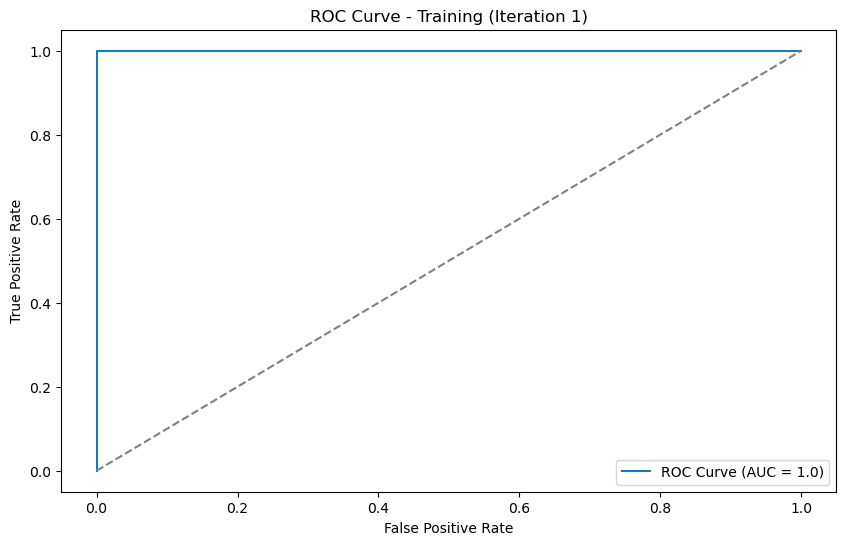

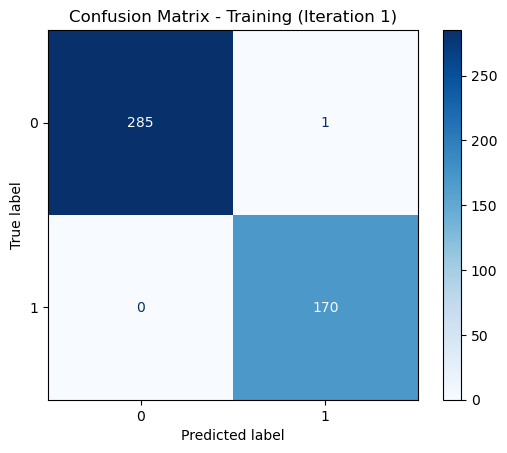

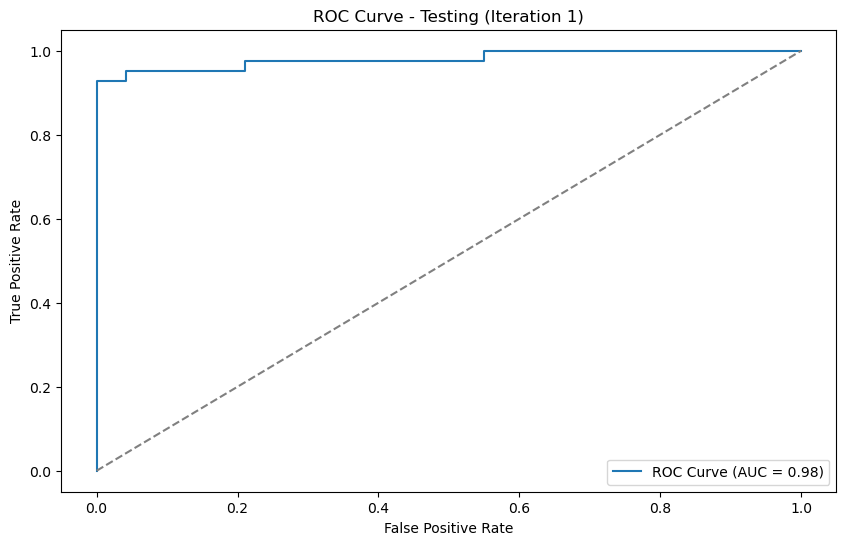

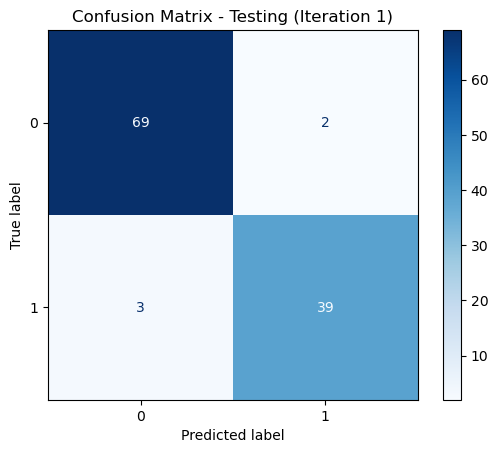

Iteration 1: Training Accuracy = 0.9978, Test Accuracy = 0.9558
Best Parameters: {'C': 42813.32398719387}



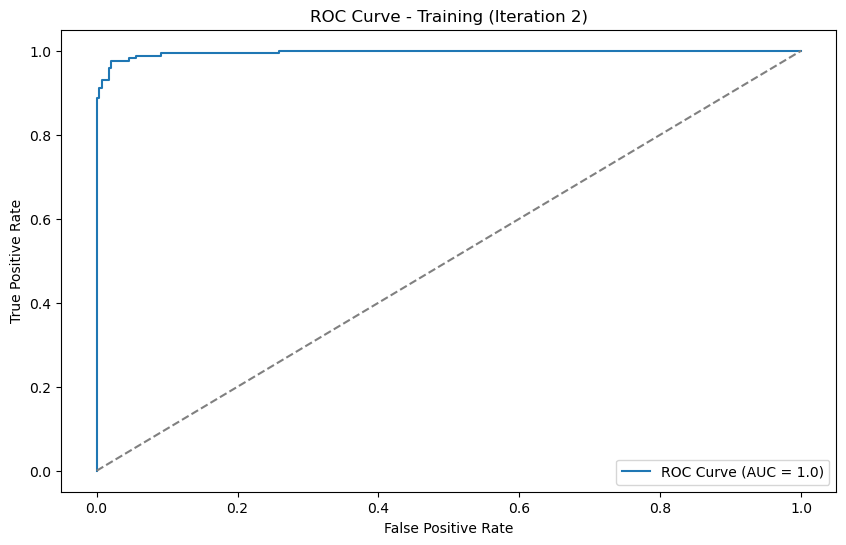

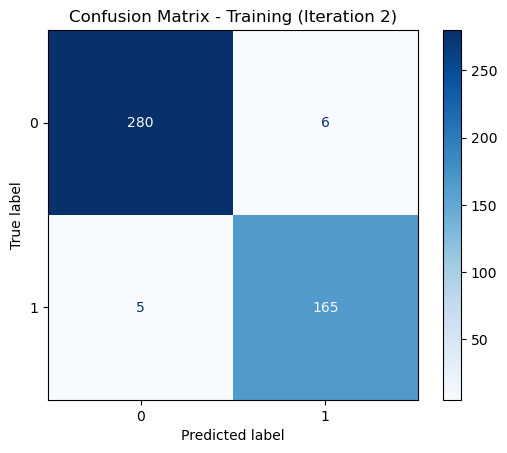

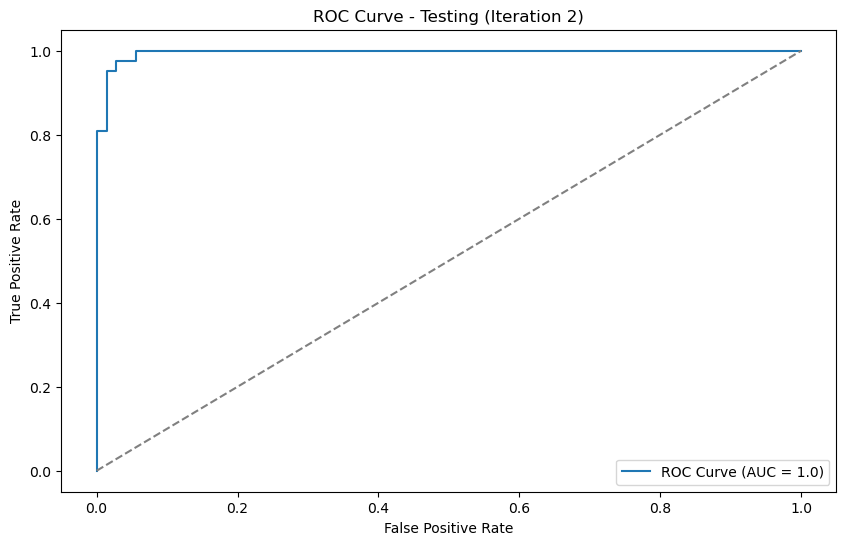

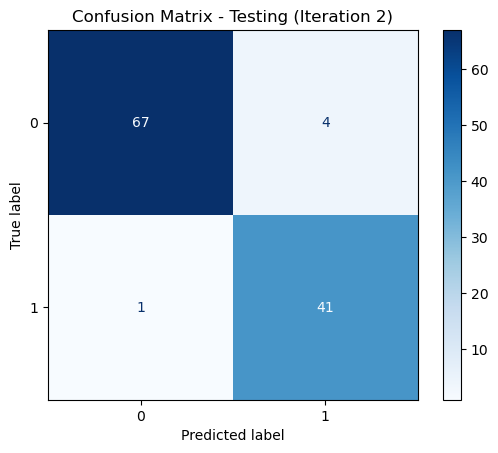

Iteration 2: Training Accuracy = 0.9759, Test Accuracy = 0.9558
Best Parameters: {'C': 1623.776739188721}



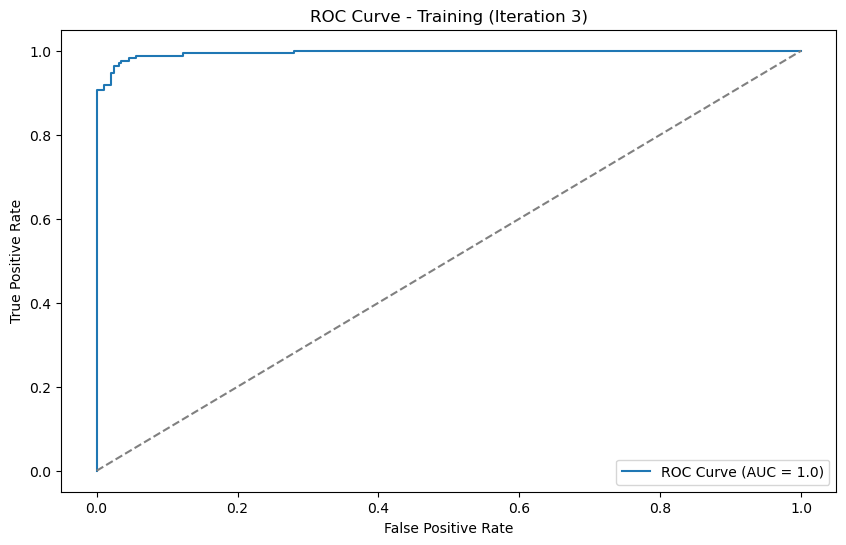

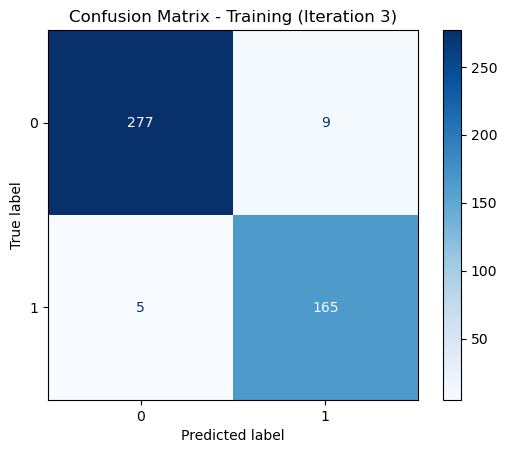

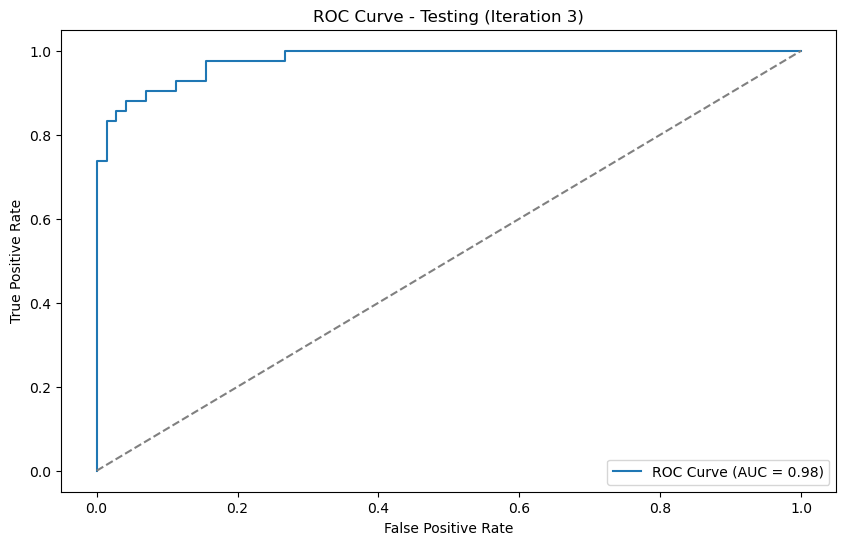

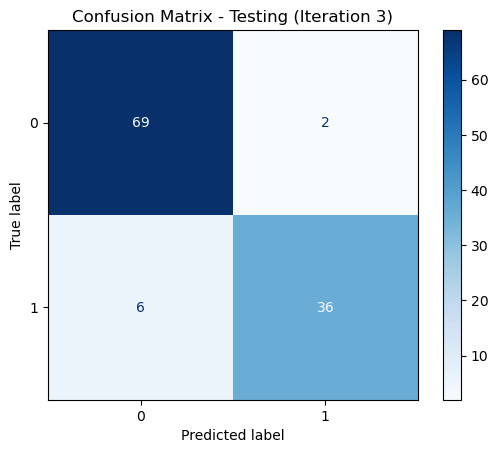

Iteration 3: Training Accuracy = 0.9693, Test Accuracy = 0.9292
Best Parameters: {'C': 183.29807108324337}



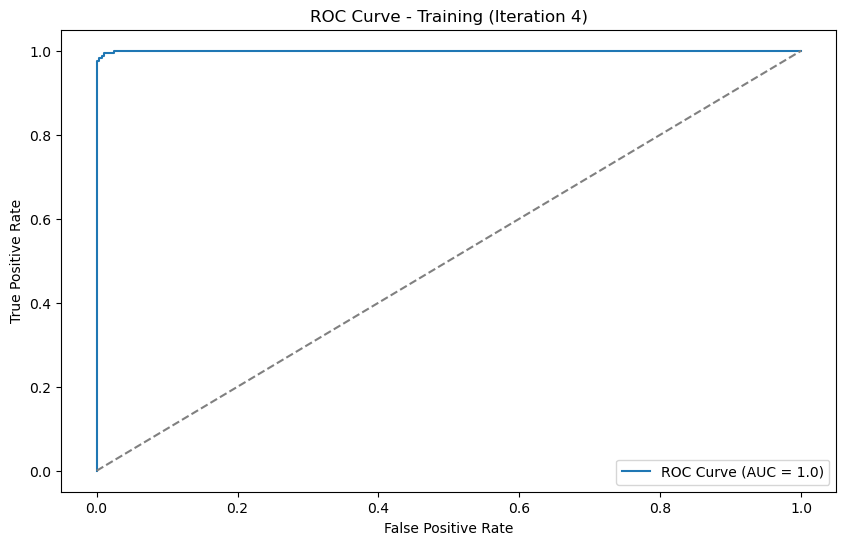

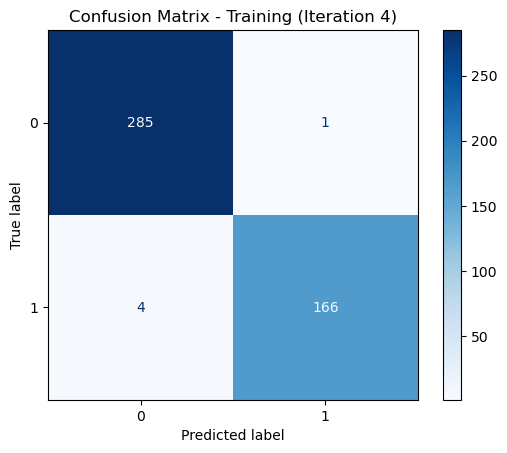

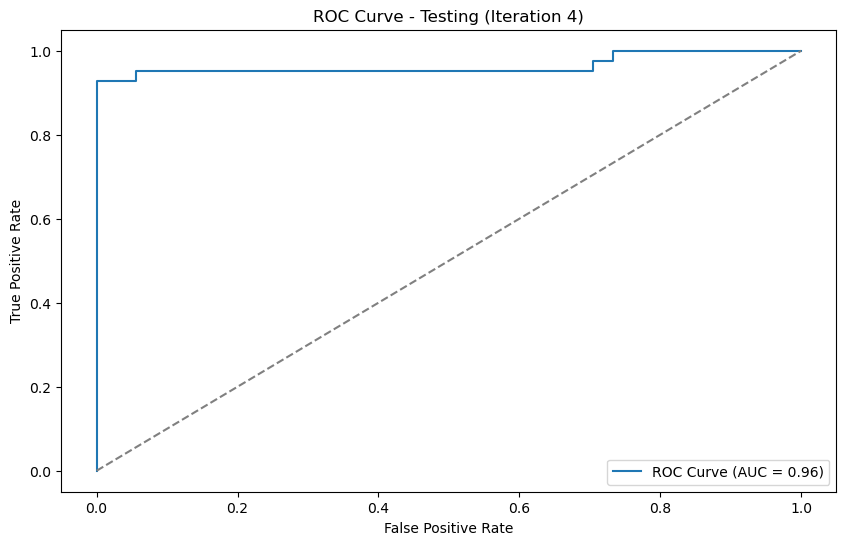

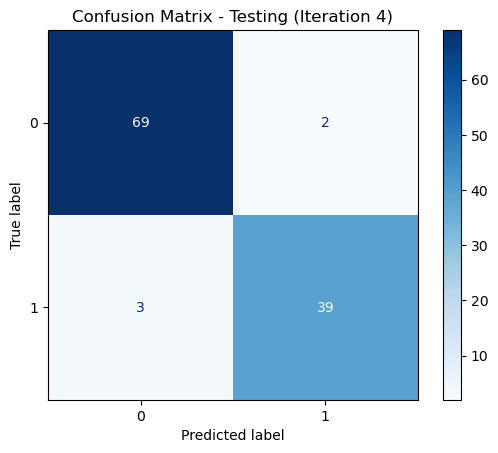

Iteration 4: Training Accuracy = 0.989, Test Accuracy = 0.9558
Best Parameters: {'C': 14384.498882876629}



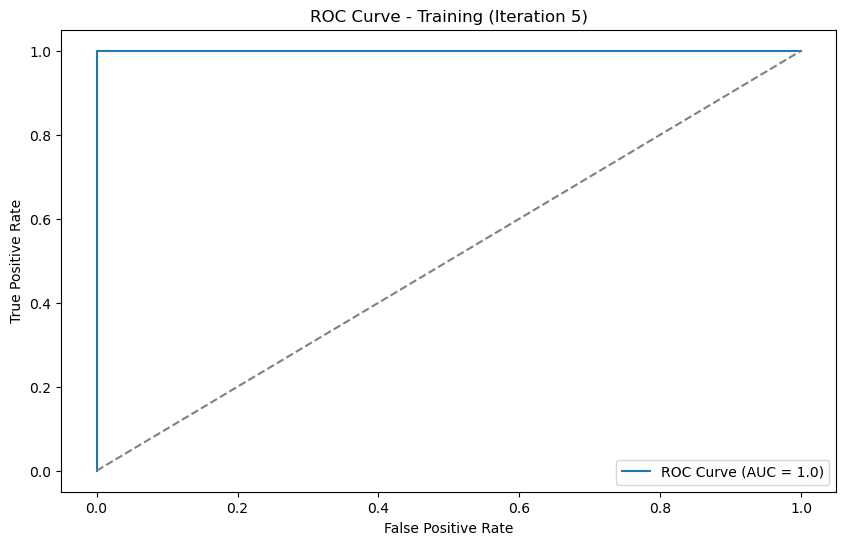

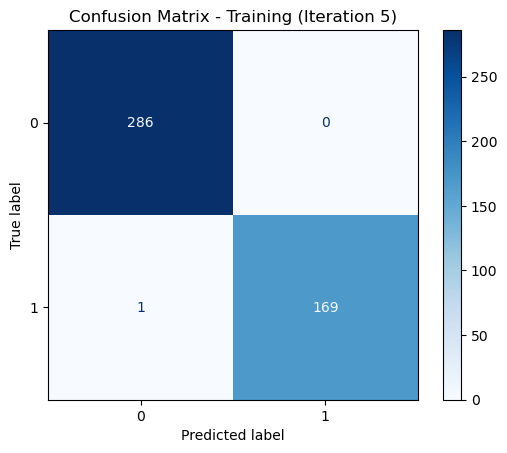

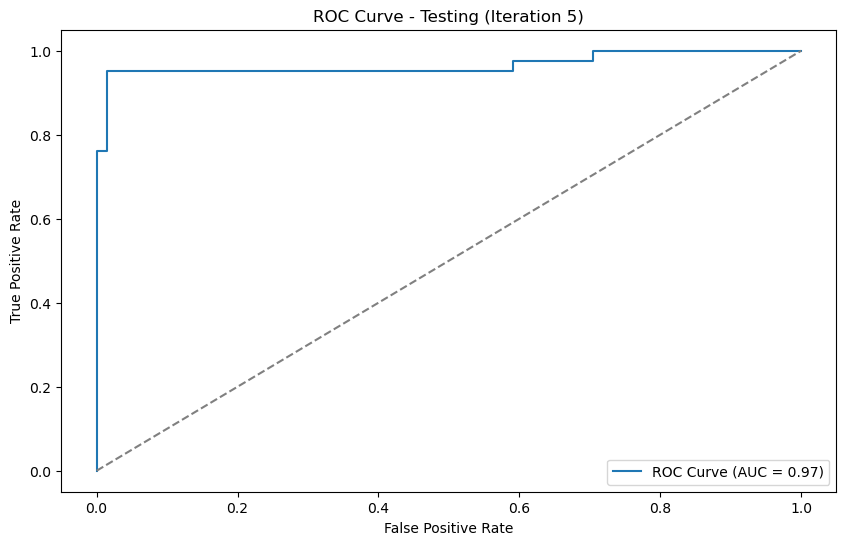

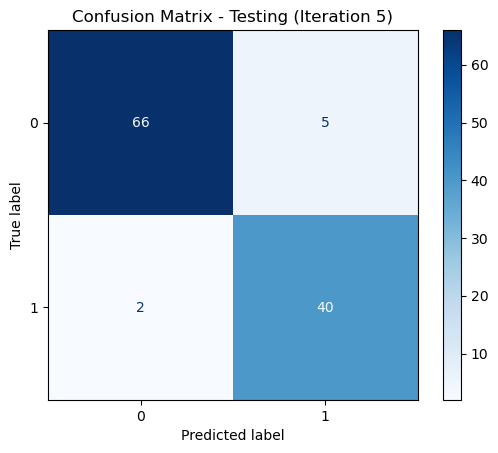

Iteration 5: Training Accuracy = 0.9978, Test Accuracy = 0.9381
Best Parameters: {'C': 42813.32398719387}



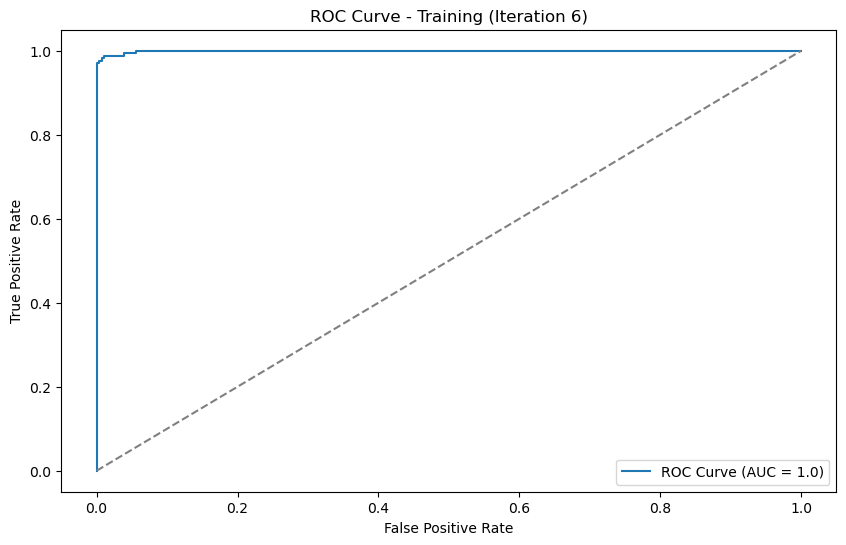

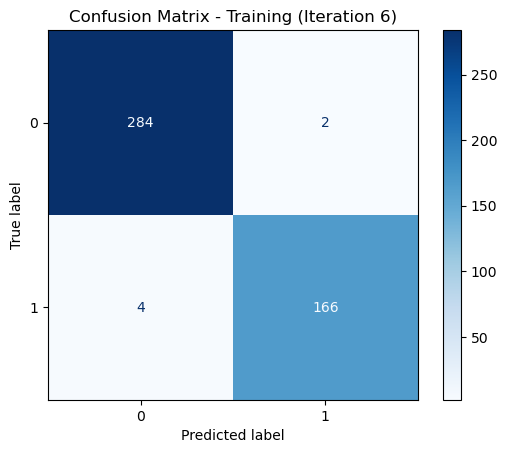

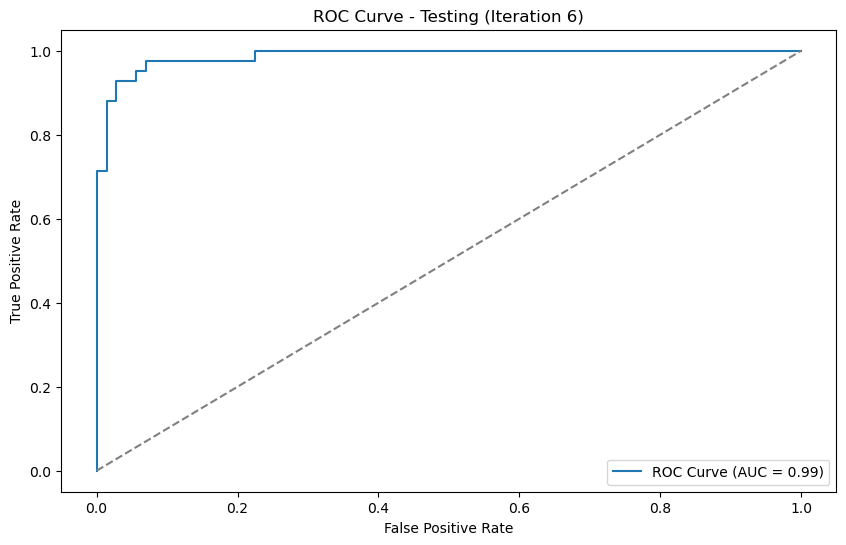

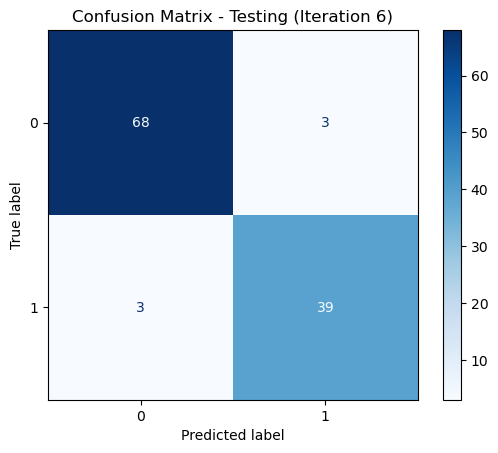

Iteration 6: Training Accuracy = 0.9868, Test Accuracy = 0.9469
Best Parameters: {'C': 42813.32398719387}



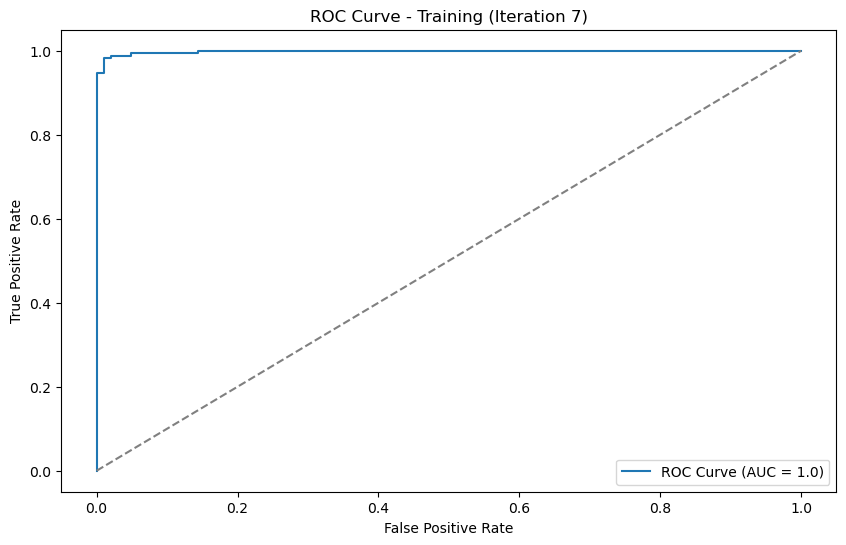

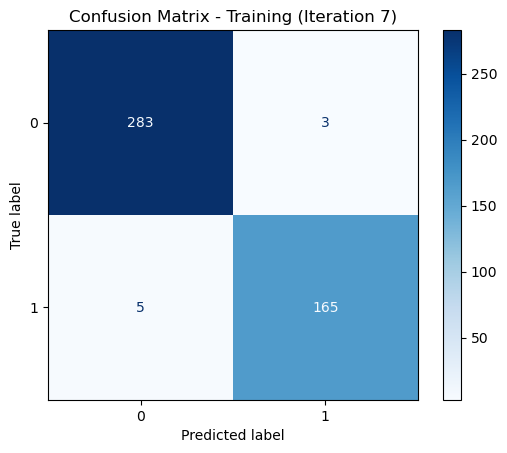

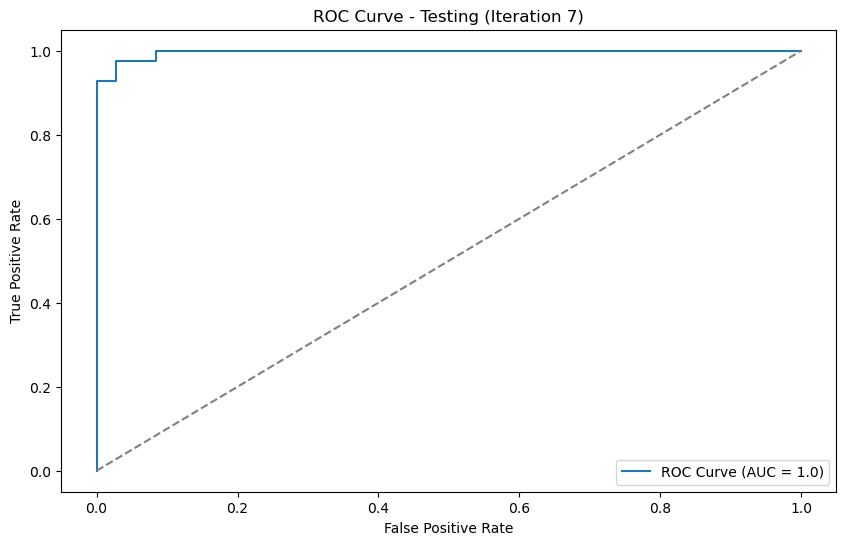

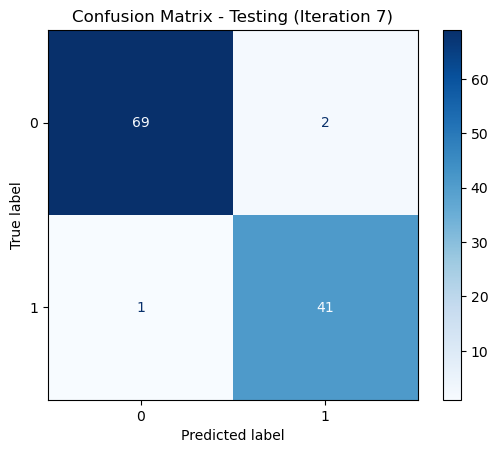

Iteration 7: Training Accuracy = 0.9825, Test Accuracy = 0.9735
Best Parameters: {'C': 14384.498882876629}



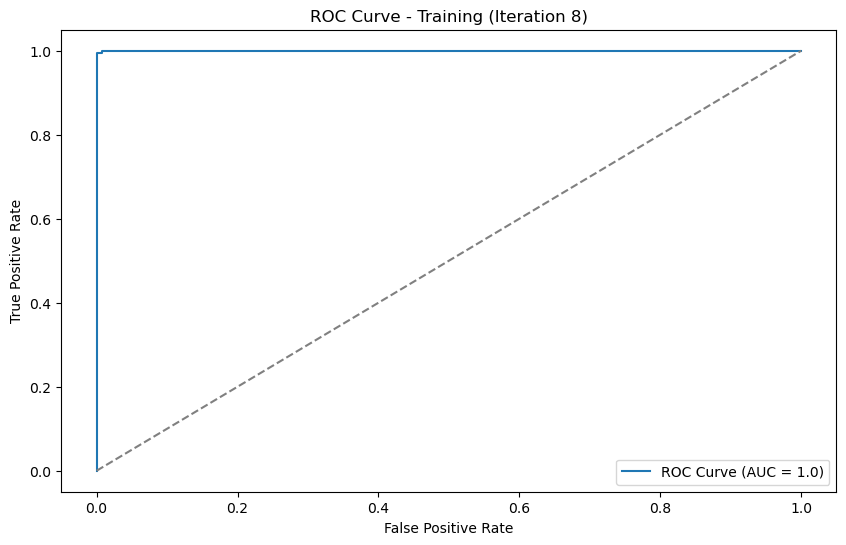

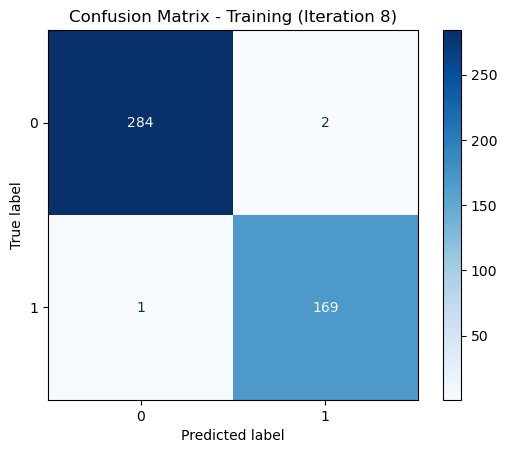

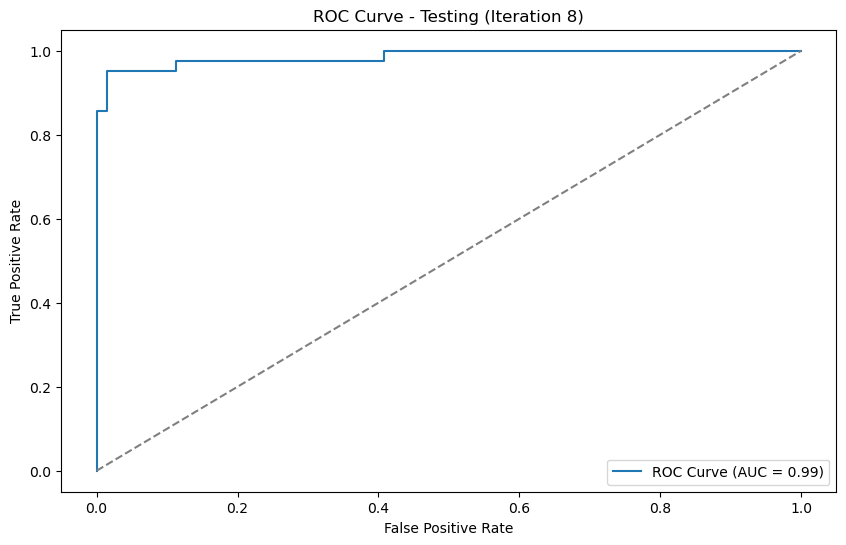

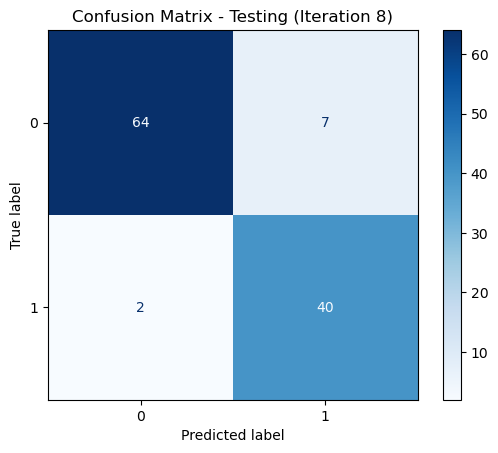

Iteration 8: Training Accuracy = 0.9934, Test Accuracy = 0.9204
Best Parameters: {'C': 379269.0190732246}



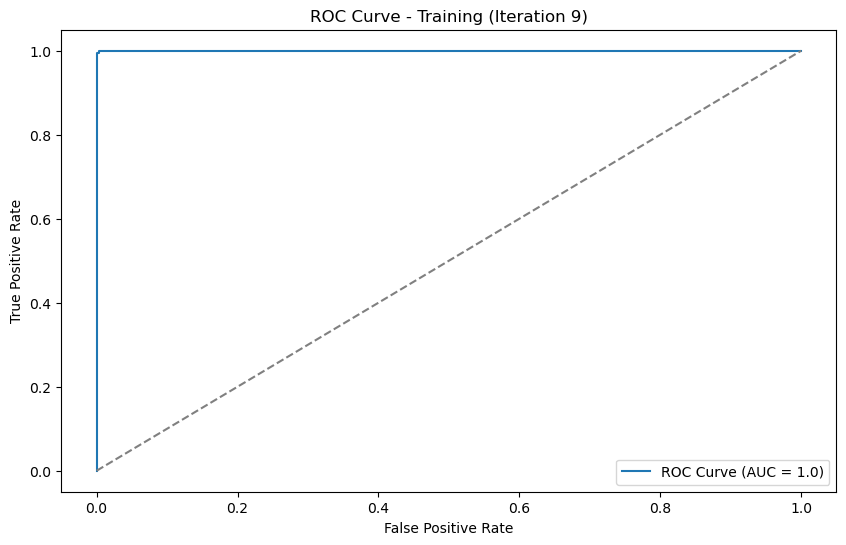

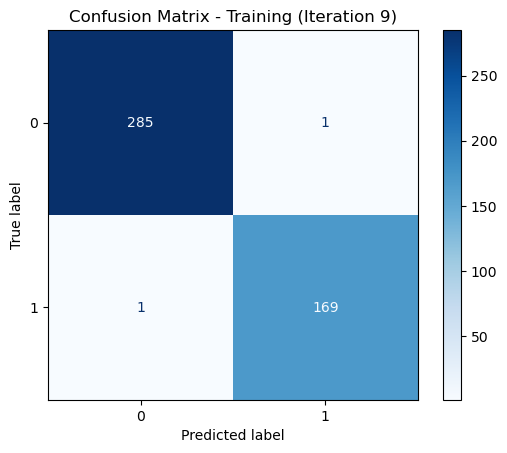

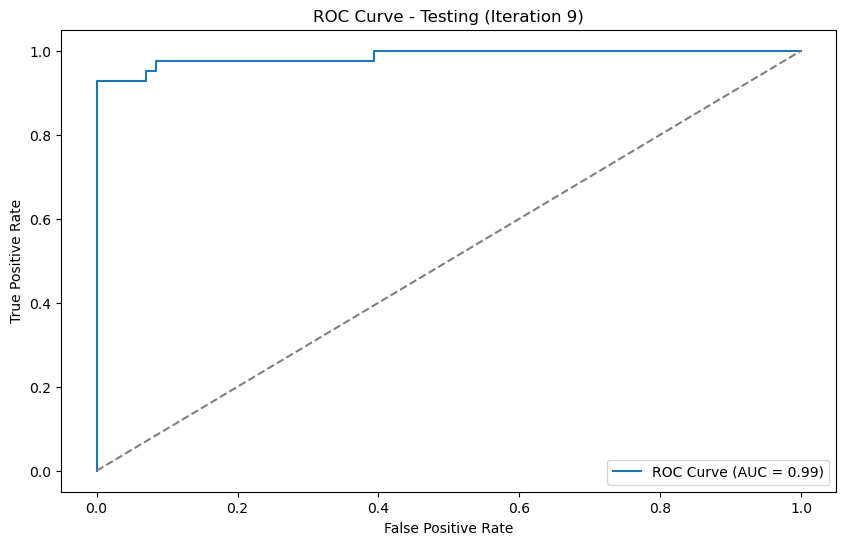

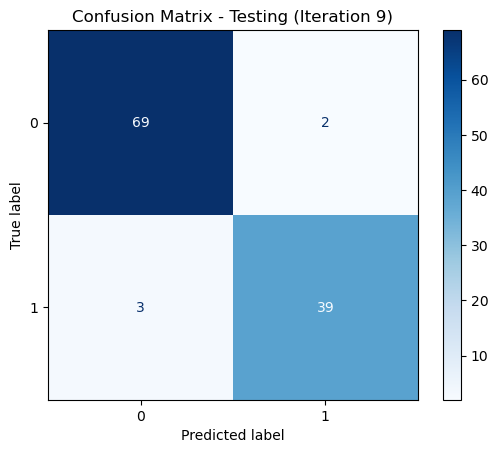

Iteration 9: Training Accuracy = 0.9956, Test Accuracy = 0.9558
Best Parameters: {'C': 1128837.8916846884}



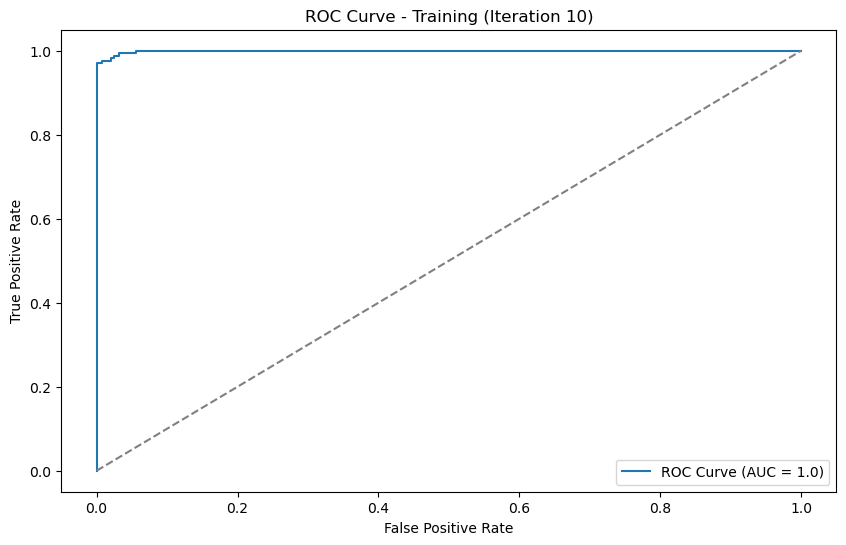

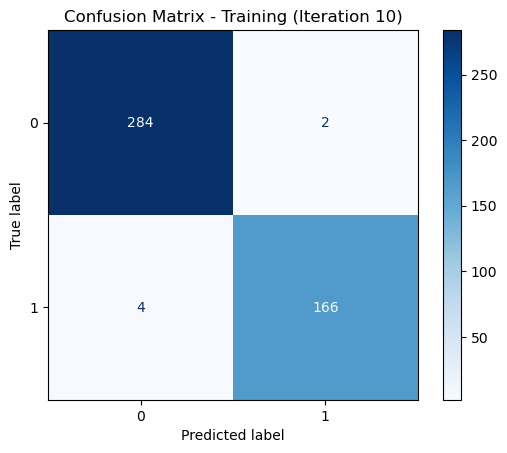

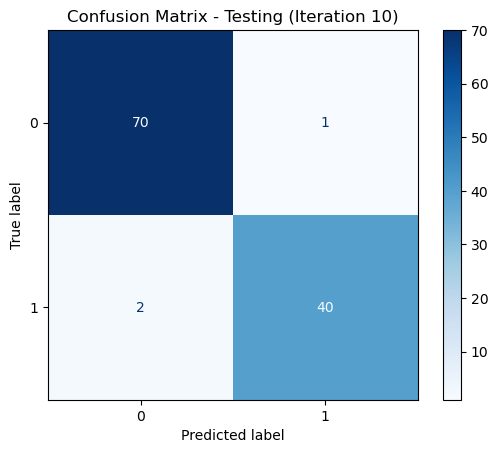

Iteration 10: Training Accuracy = 0.9868, Test Accuracy = 0.9735
Best Parameters: {'C': 379269.0190732246}



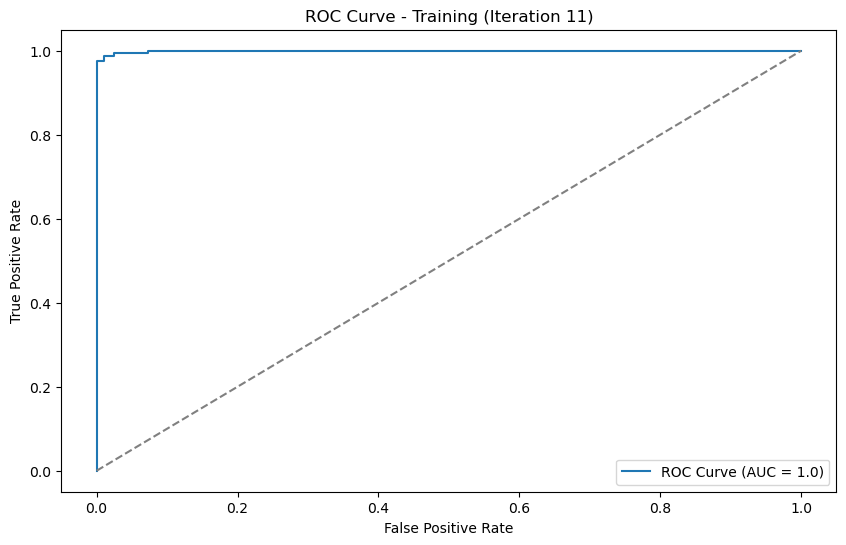

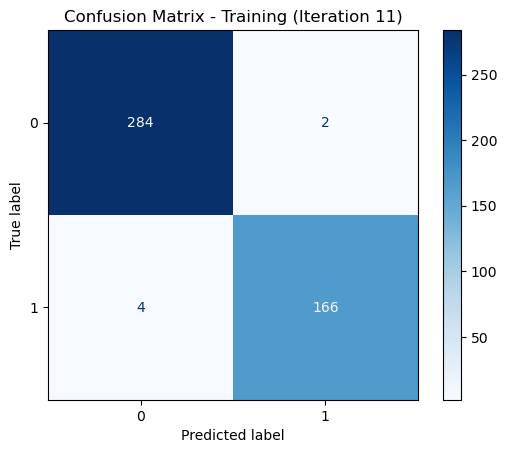

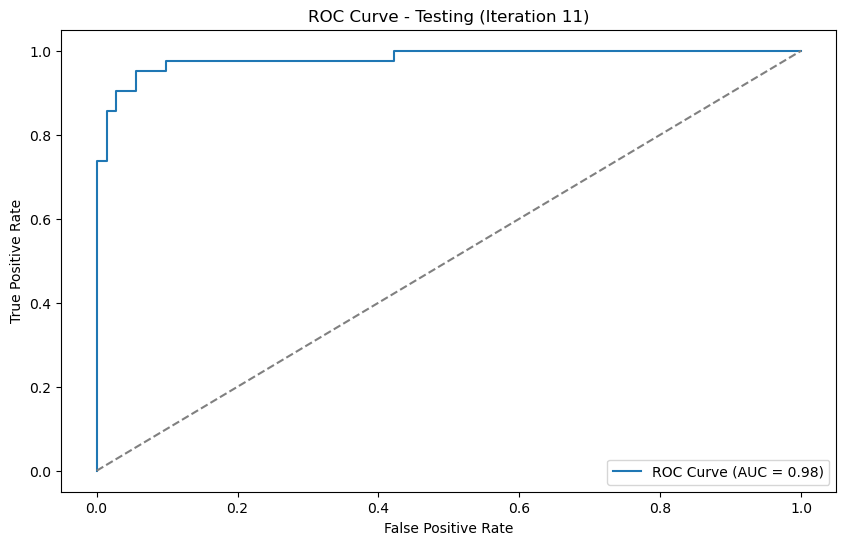

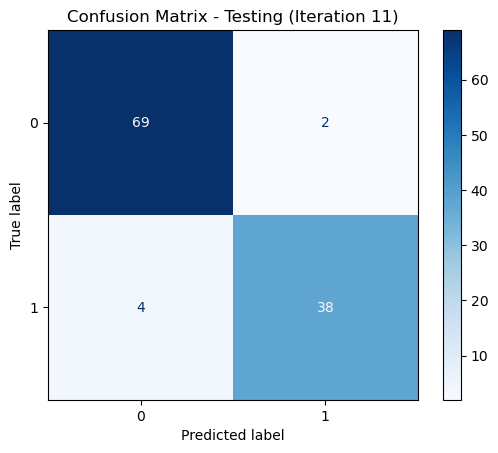

Iteration 11: Training Accuracy = 0.9868, Test Accuracy = 0.9469
Best Parameters: {'C': 42813.32398719387}



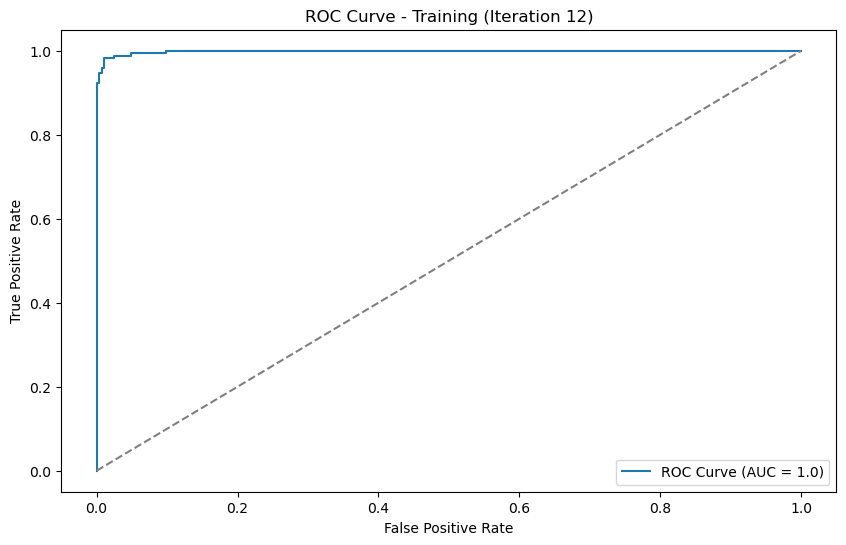

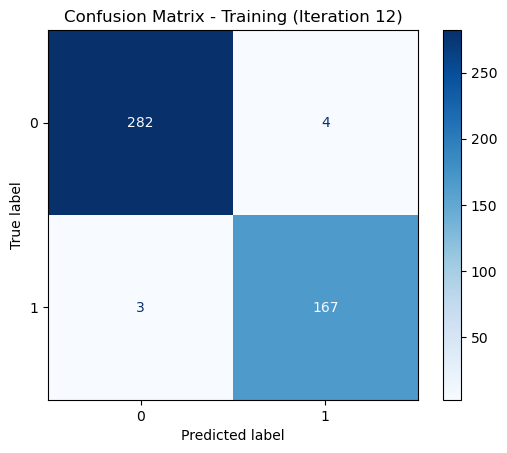

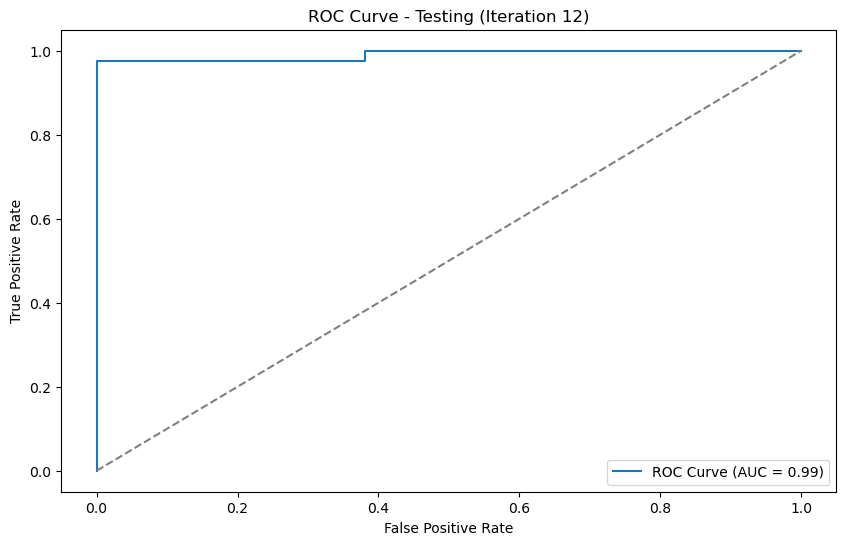

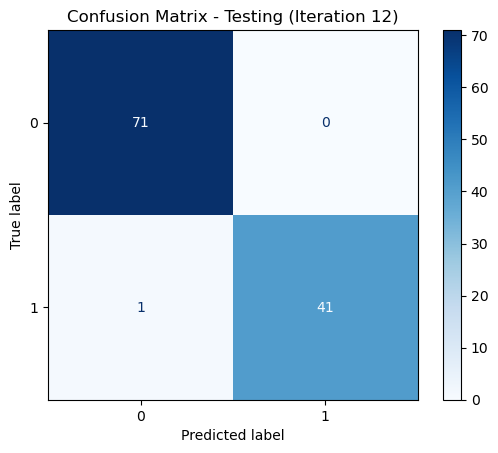

Iteration 12: Training Accuracy = 0.9846, Test Accuracy = 0.9912
Best Parameters: {'C': 4832.930238571752}



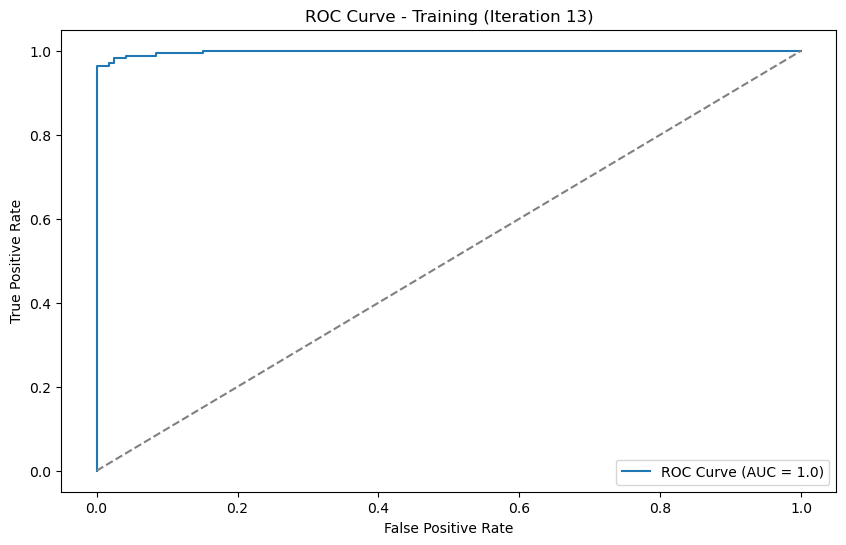

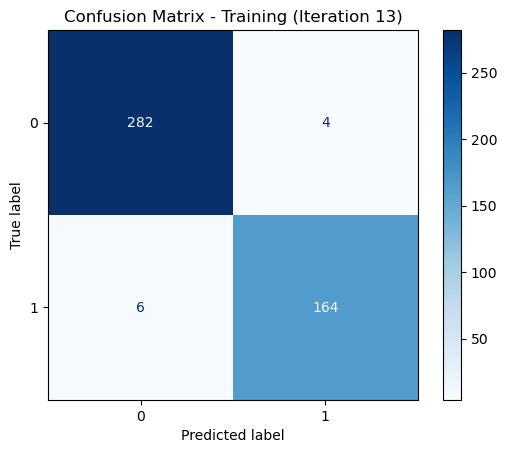

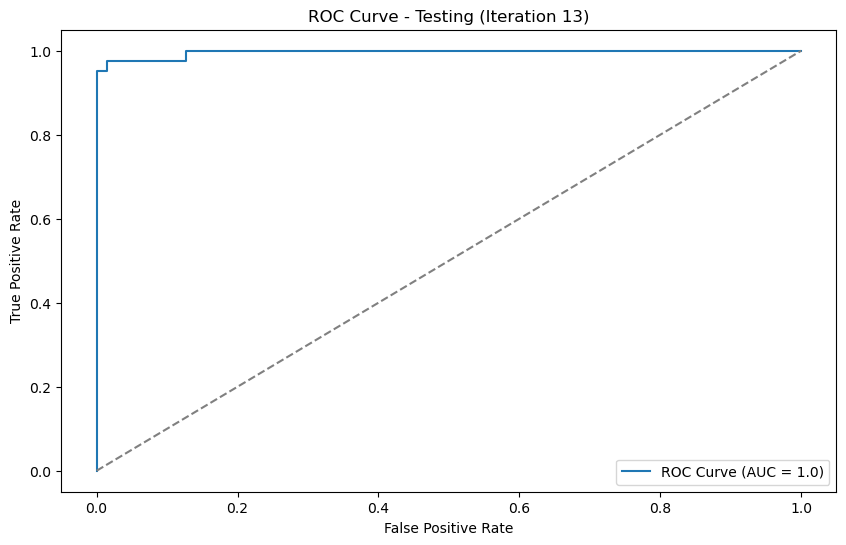

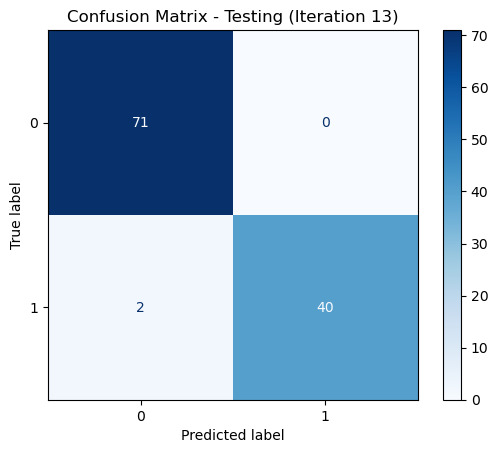

Iteration 13: Training Accuracy = 0.9781, Test Accuracy = 0.9823
Best Parameters: {'C': 14384.498882876629}



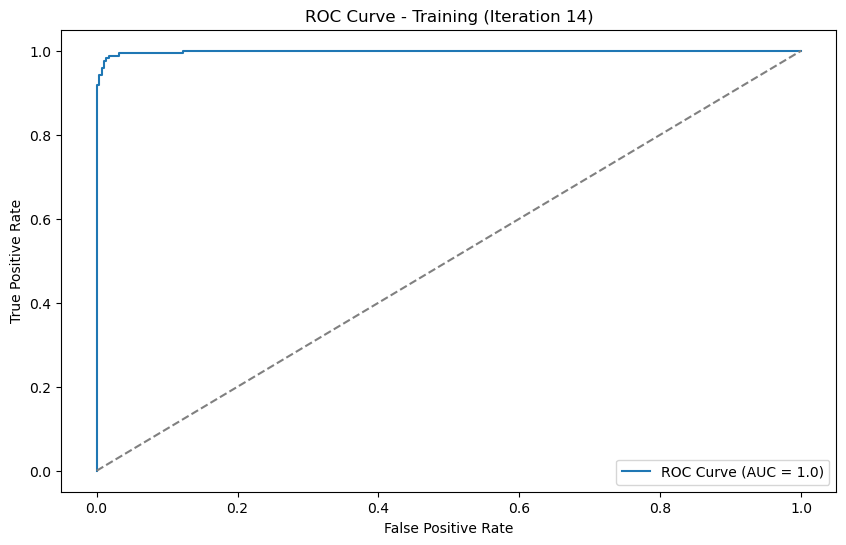

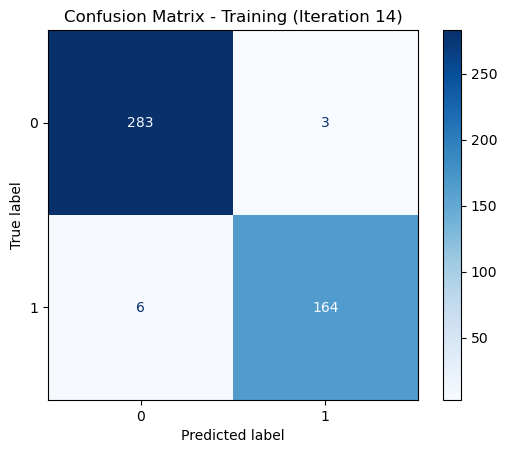

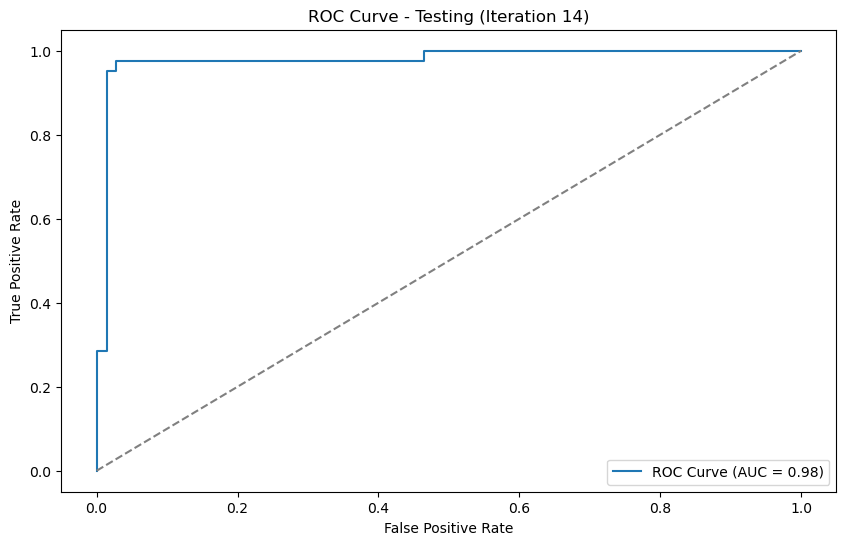

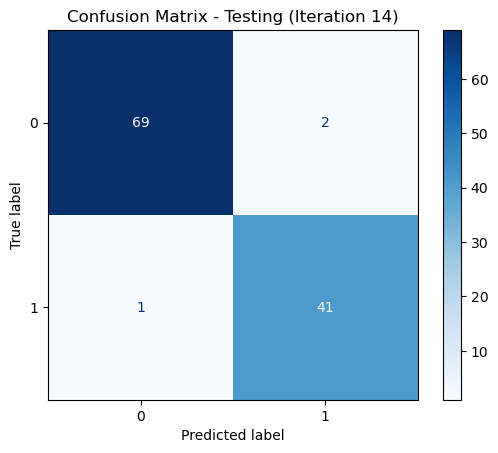

Iteration 14: Training Accuracy = 0.9803, Test Accuracy = 0.9735
Best Parameters: {'C': 4832.930238571752}



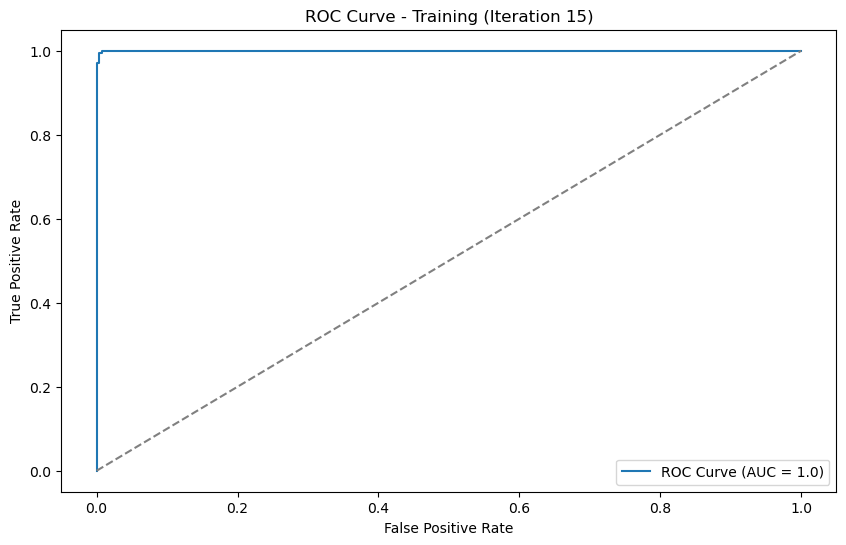

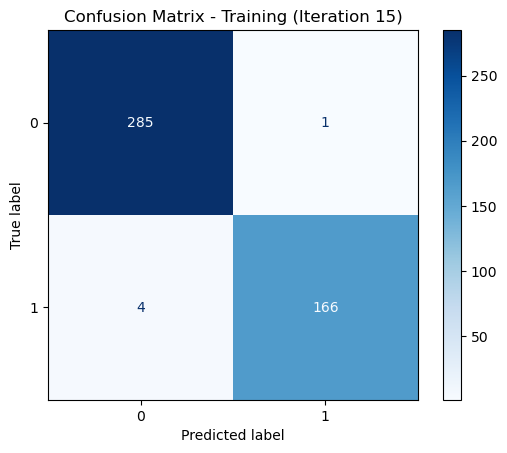

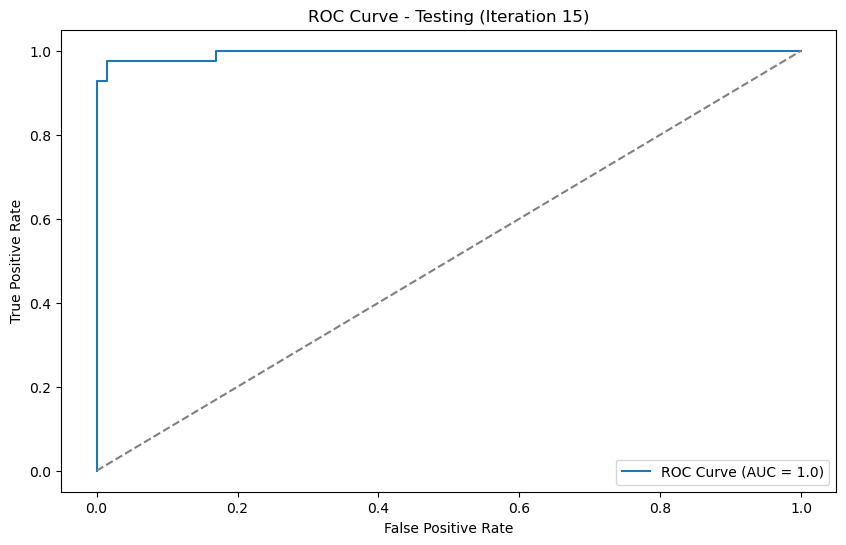

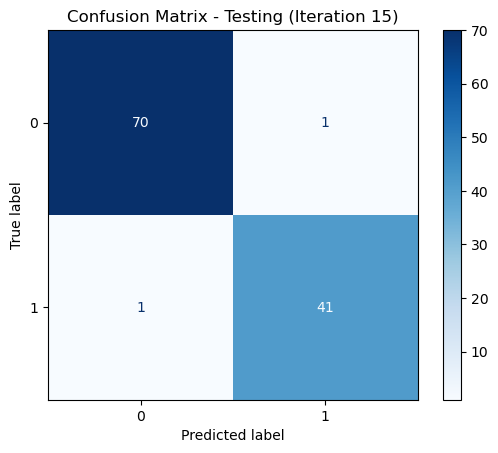

Iteration 15: Training Accuracy = 0.989, Test Accuracy = 0.9823
Best Parameters: {'C': 10000000.0}



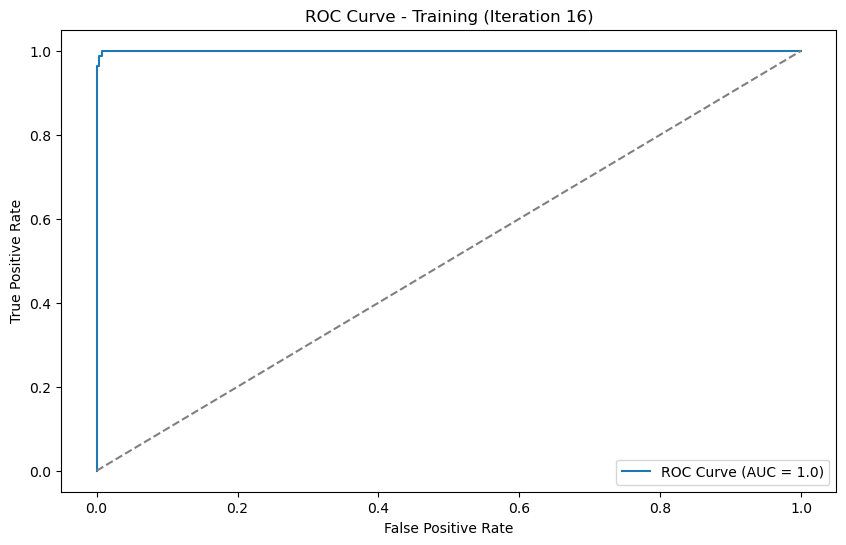

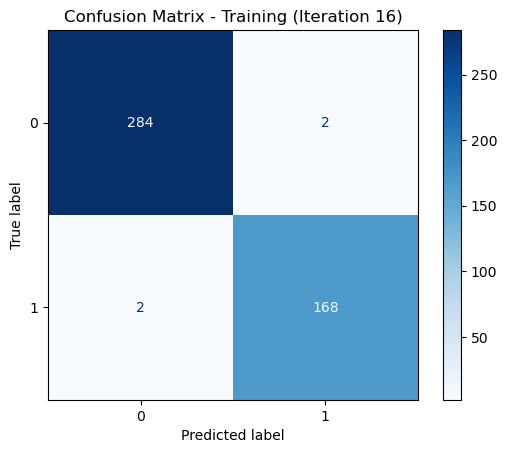

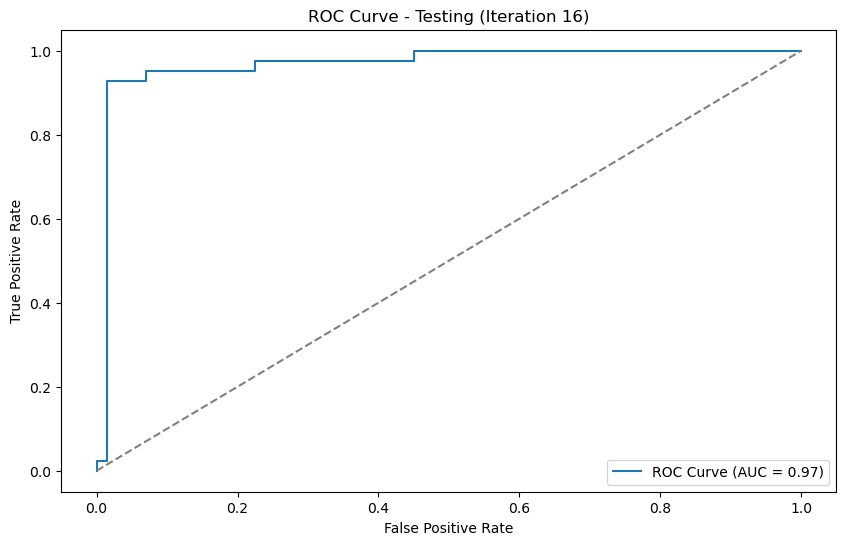

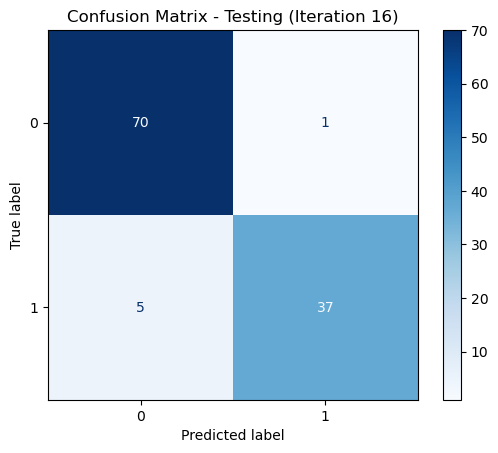

Iteration 16: Training Accuracy = 0.9912, Test Accuracy = 0.9469
Best Parameters: {'C': 14384.498882876629}



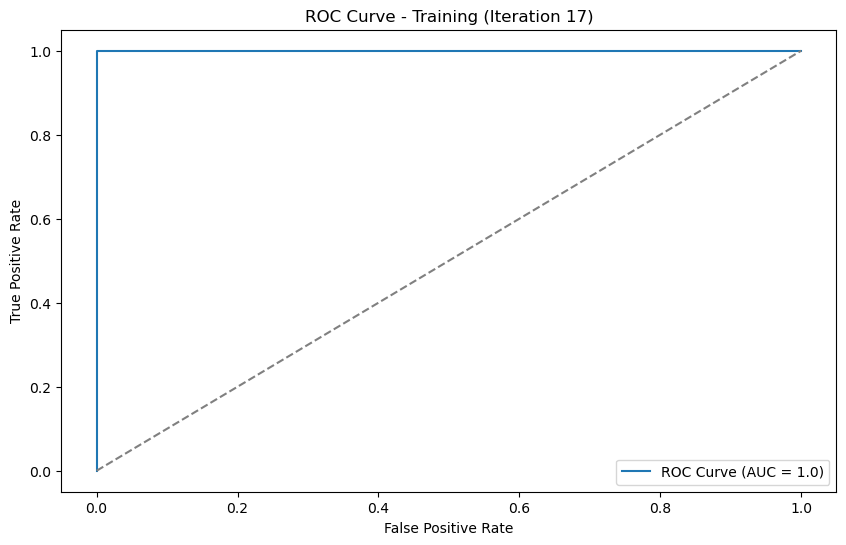

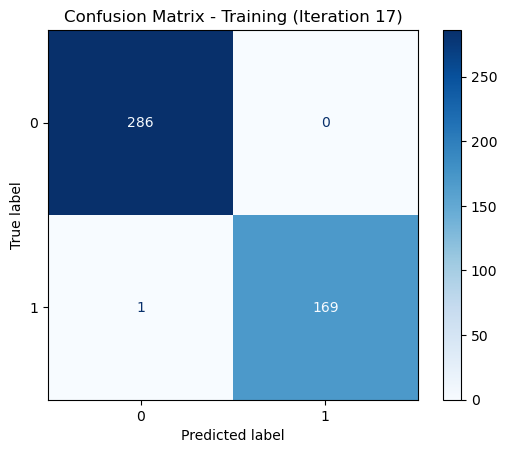

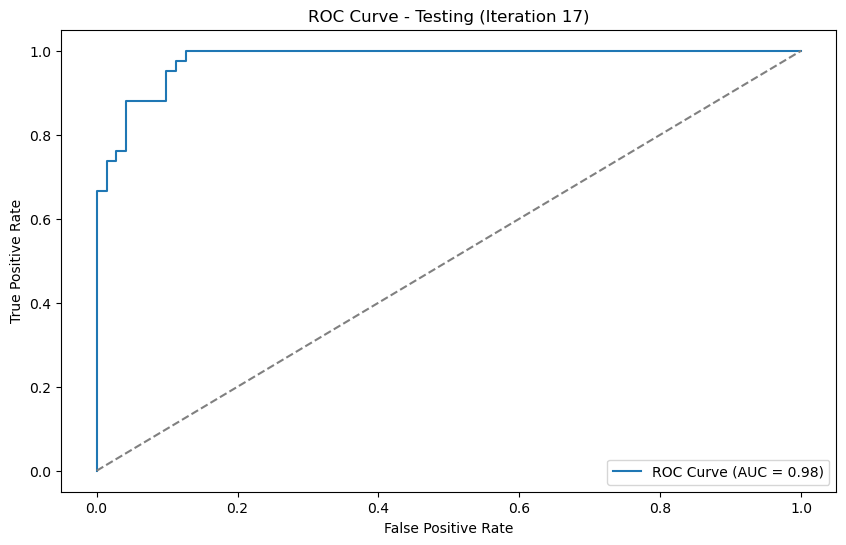

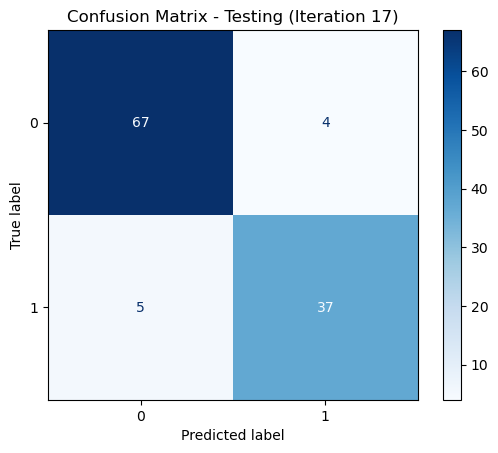

Iteration 17: Training Accuracy = 0.9978, Test Accuracy = 0.9204
Best Parameters: {'C': 3359818.2862837743}



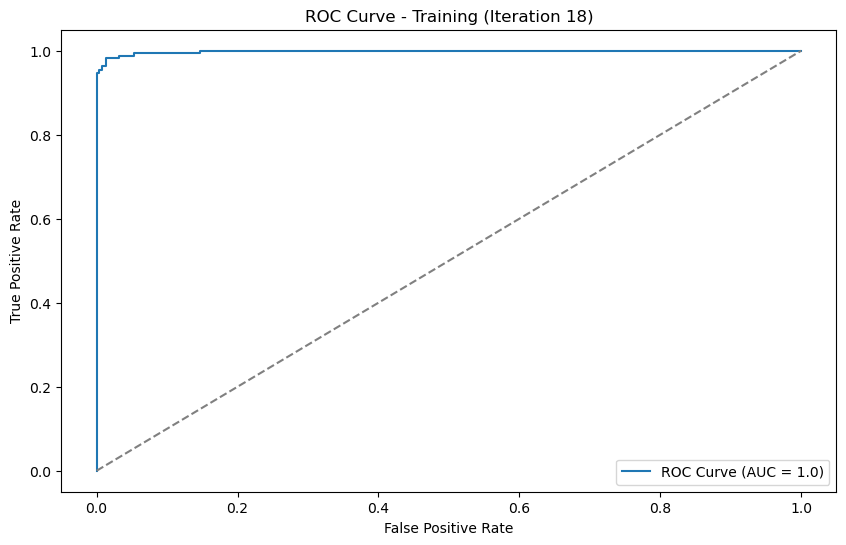

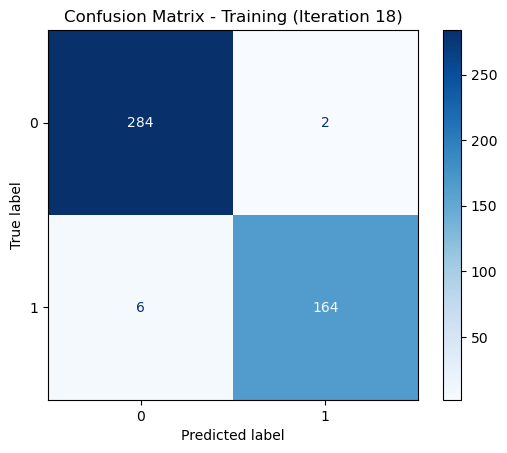

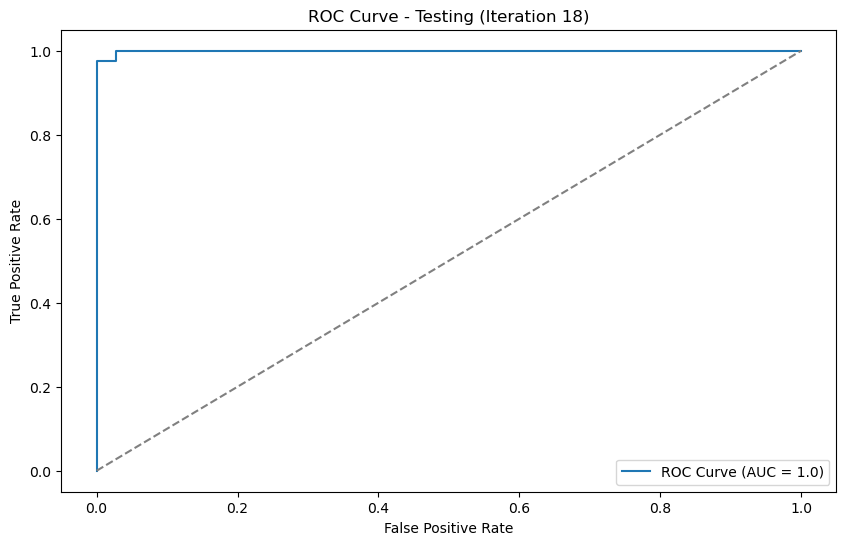

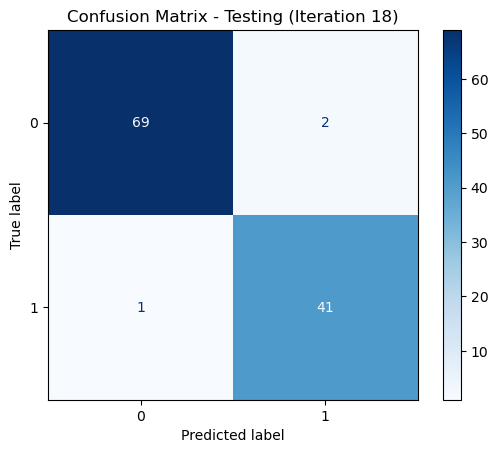

Iteration 18: Training Accuracy = 0.9825, Test Accuracy = 0.9735
Best Parameters: {'C': 14384.498882876629}



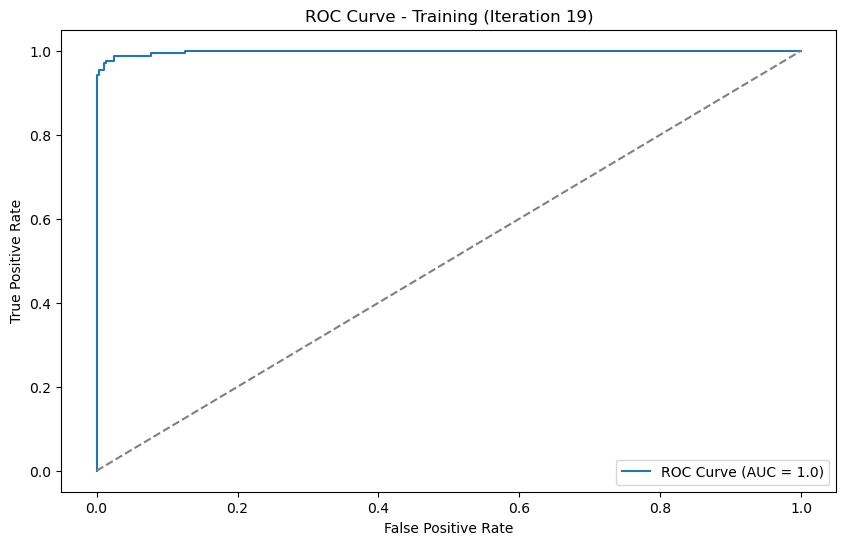

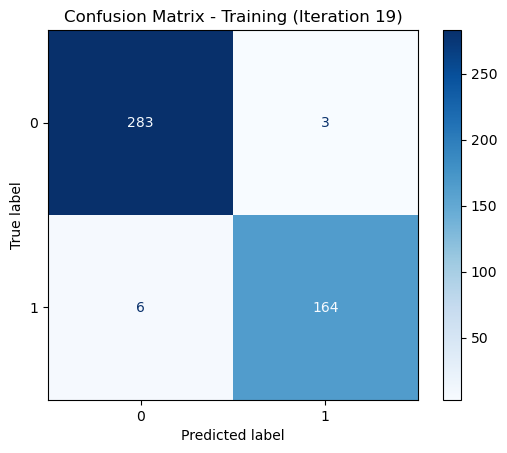

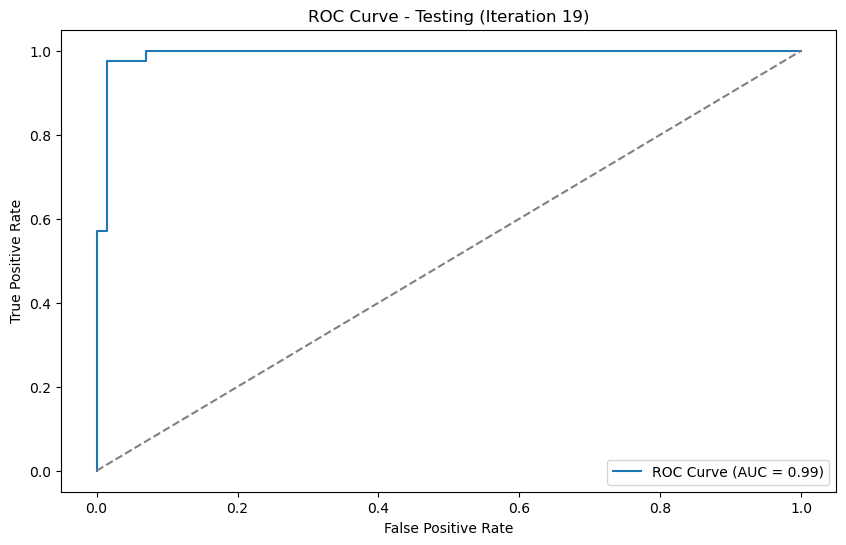

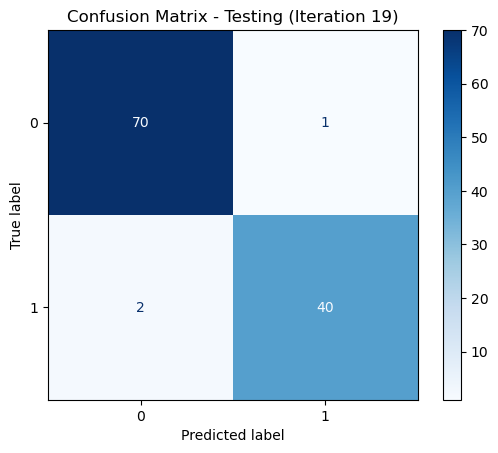

Iteration 19: Training Accuracy = 0.9803, Test Accuracy = 0.9735
Best Parameters: {'C': 14384.498882876629}



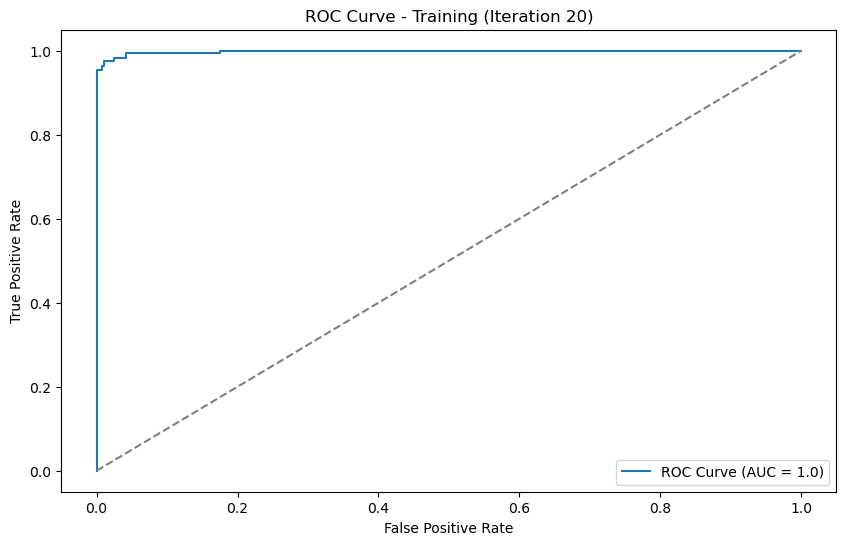

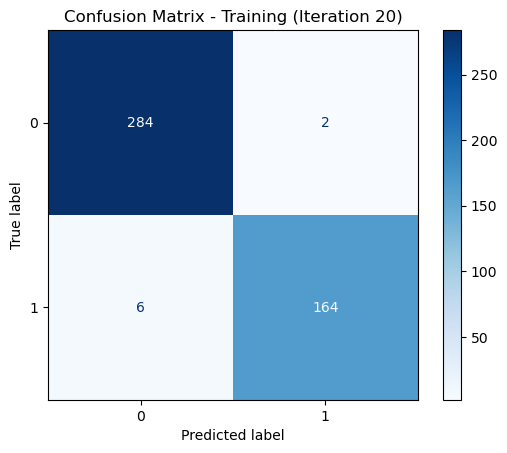

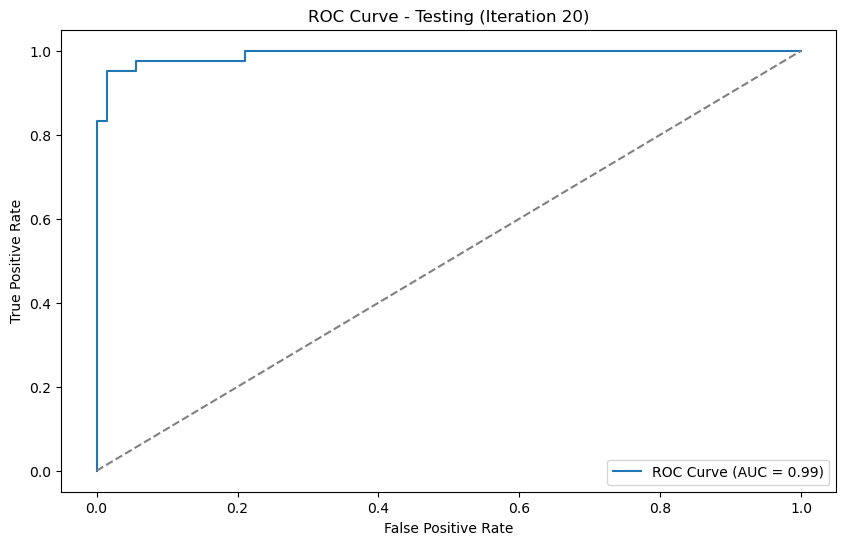

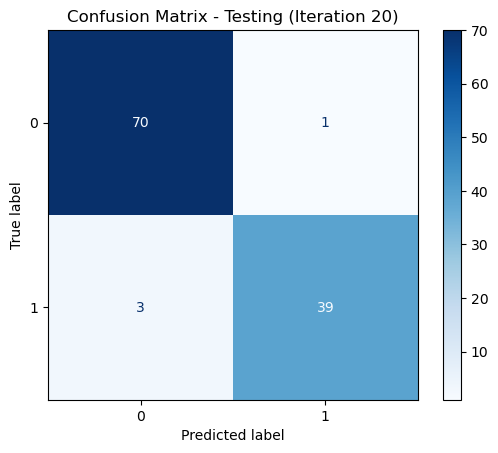

Iteration 20: Training Accuracy = 0.9825, Test Accuracy = 0.9646
Best Parameters: {'C': 14384.498882876629}



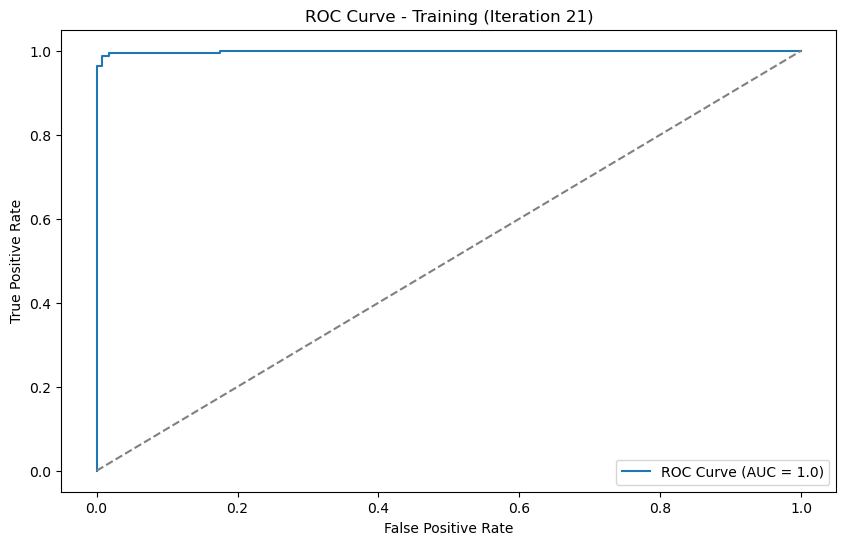

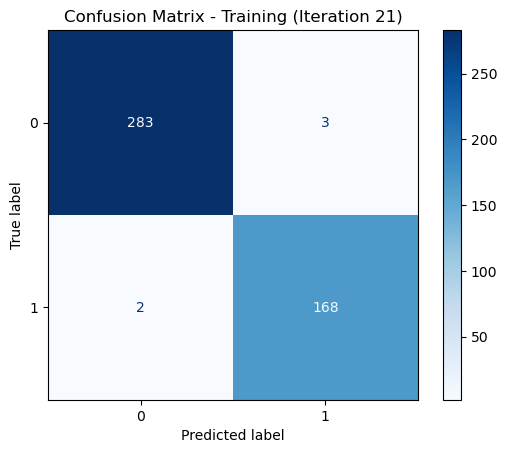

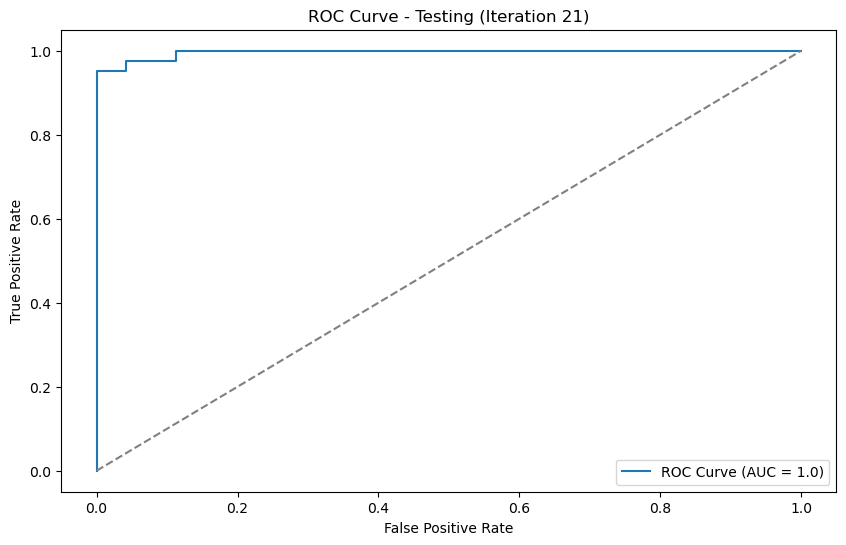

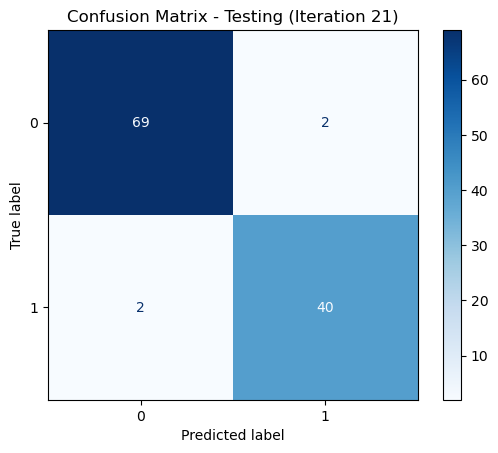

Iteration 21: Training Accuracy = 0.989, Test Accuracy = 0.9646
Best Parameters: {'C': 14384.498882876629}



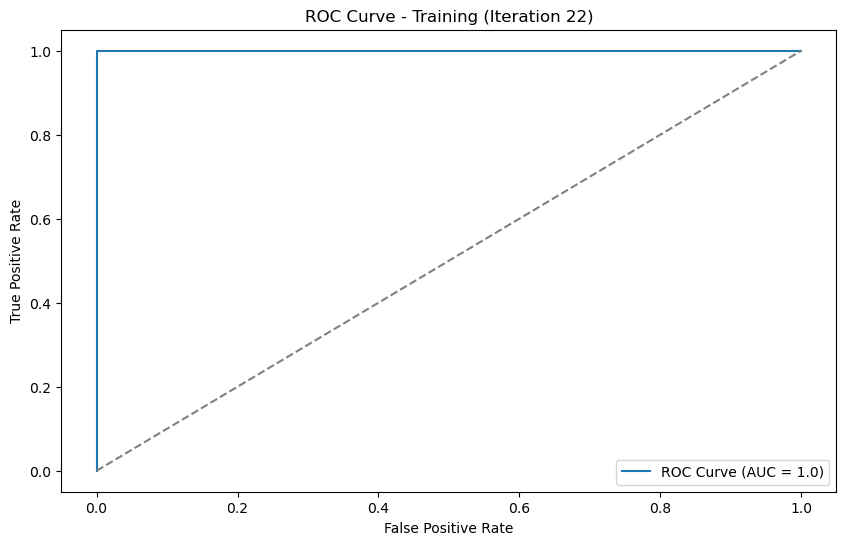

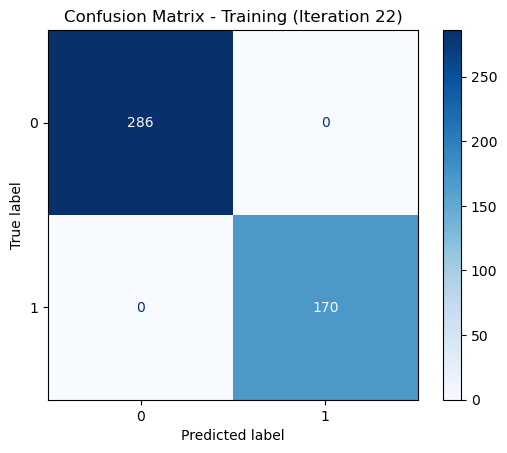

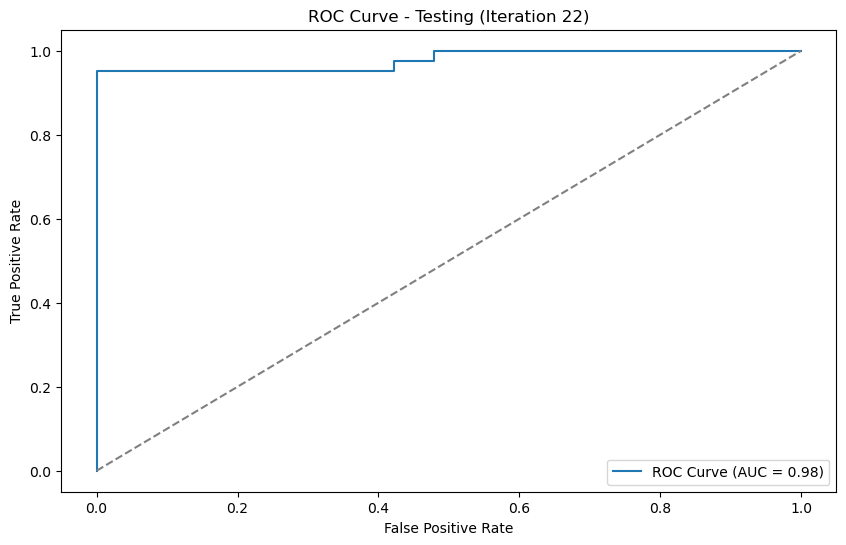

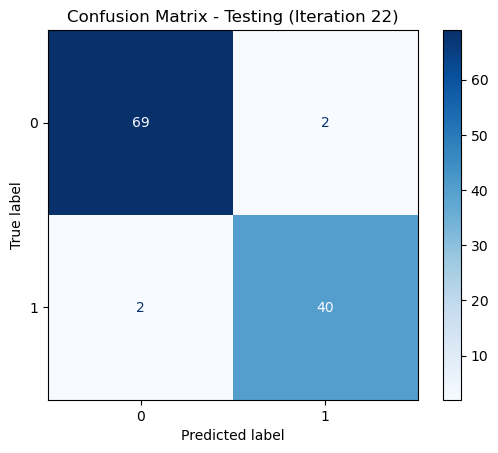

Iteration 22: Training Accuracy = 1.0, Test Accuracy = 0.9646
Best Parameters: {'C': 1128837.8916846884}



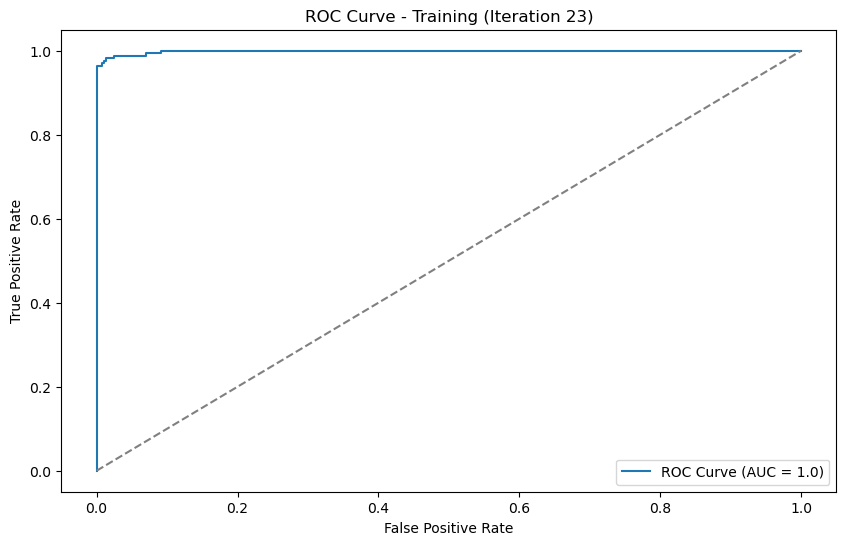

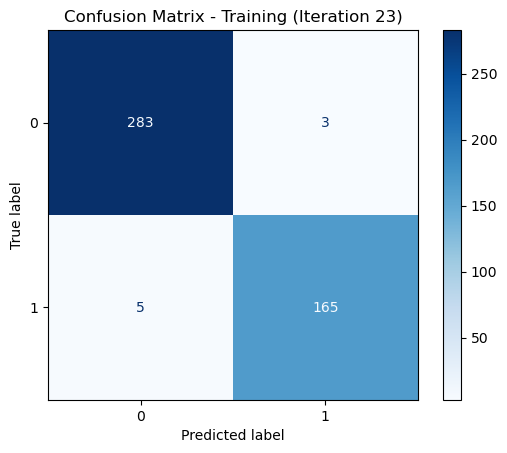

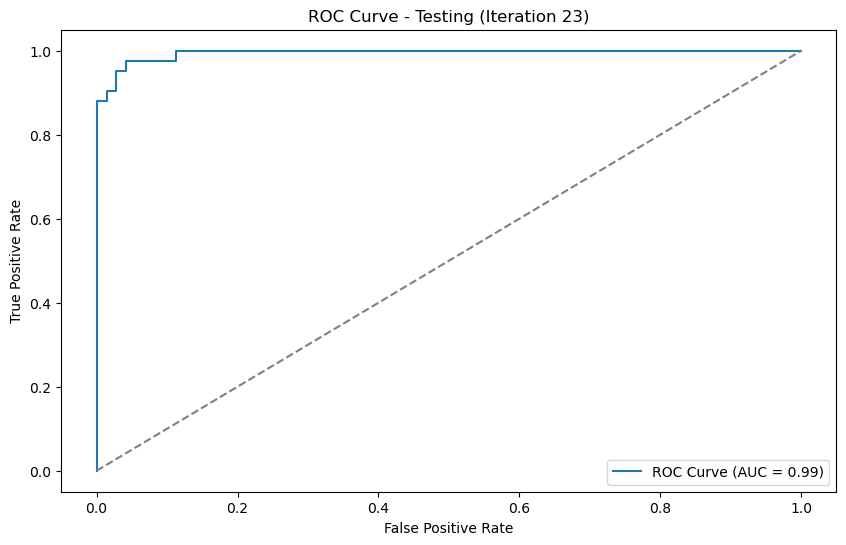

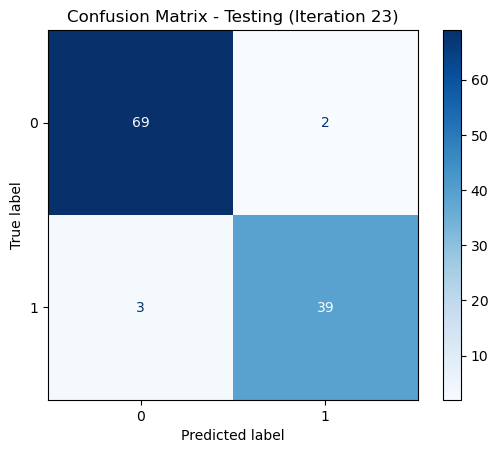

Iteration 23: Training Accuracy = 0.9825, Test Accuracy = 0.9558
Best Parameters: {'C': 14384.498882876629}



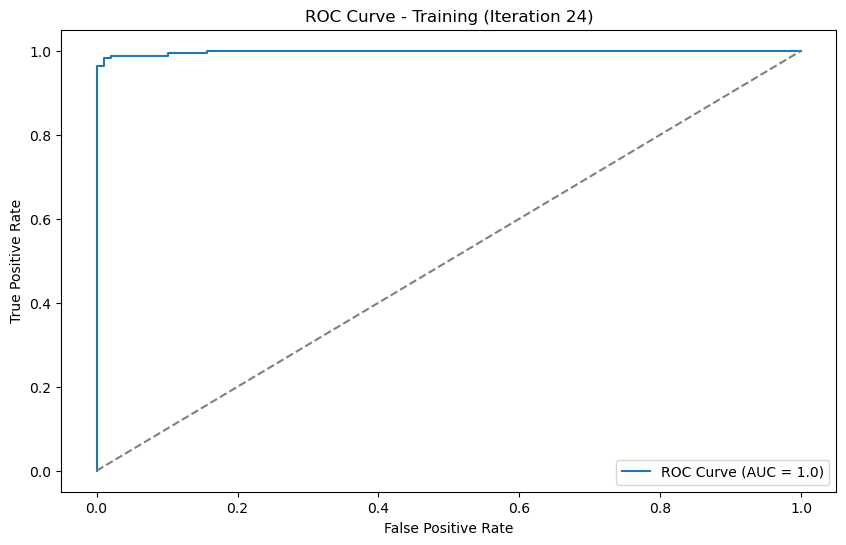

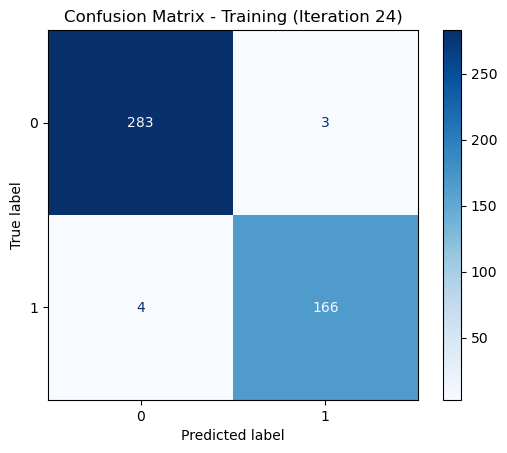

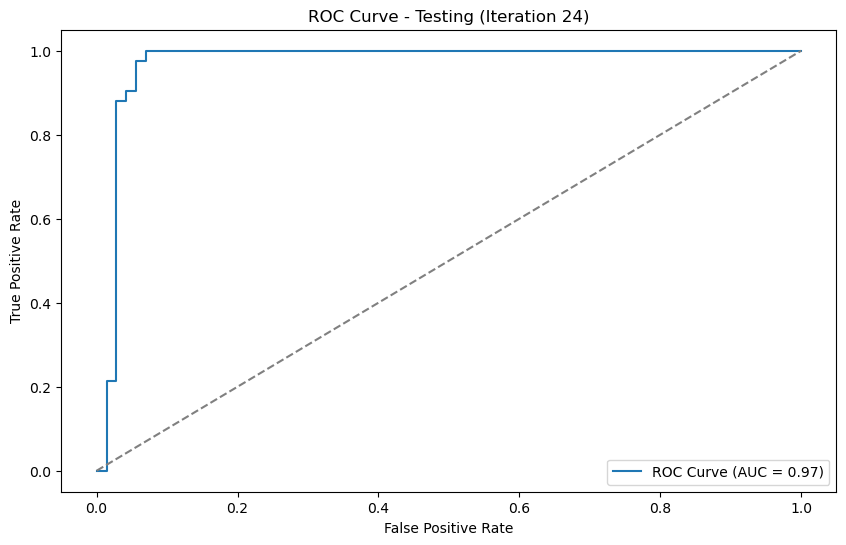

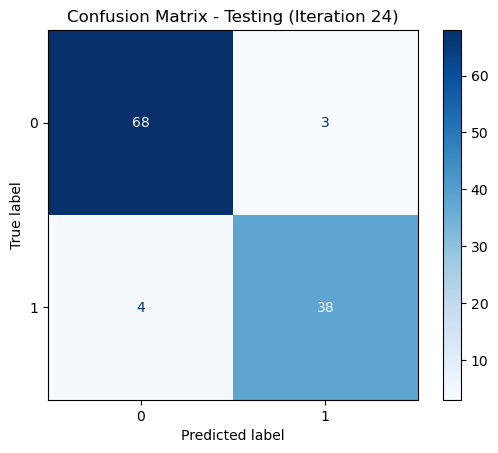

Iteration 24: Training Accuracy = 0.9846, Test Accuracy = 0.9381
Best Parameters: {'C': 4832.930238571752}



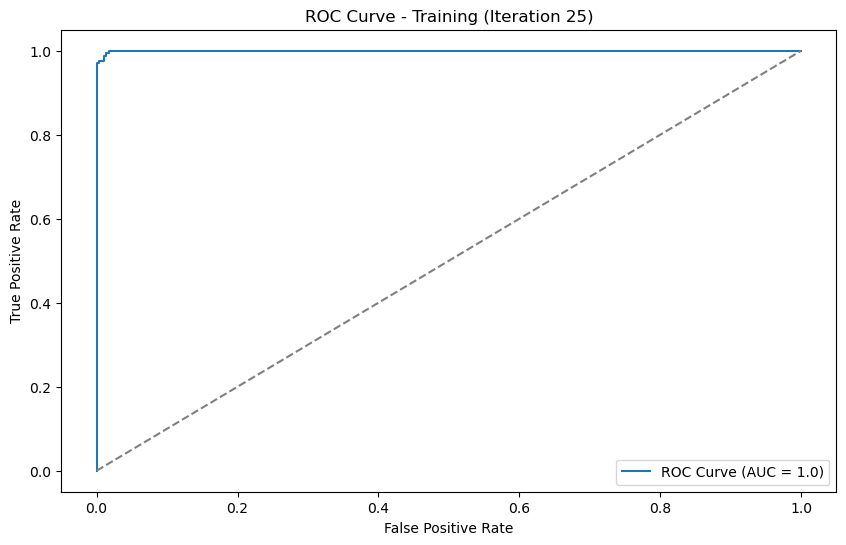

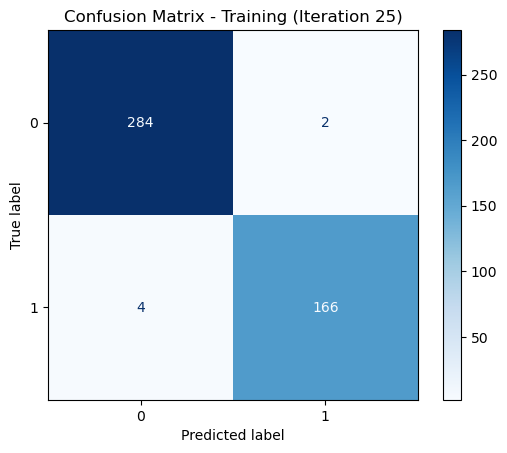

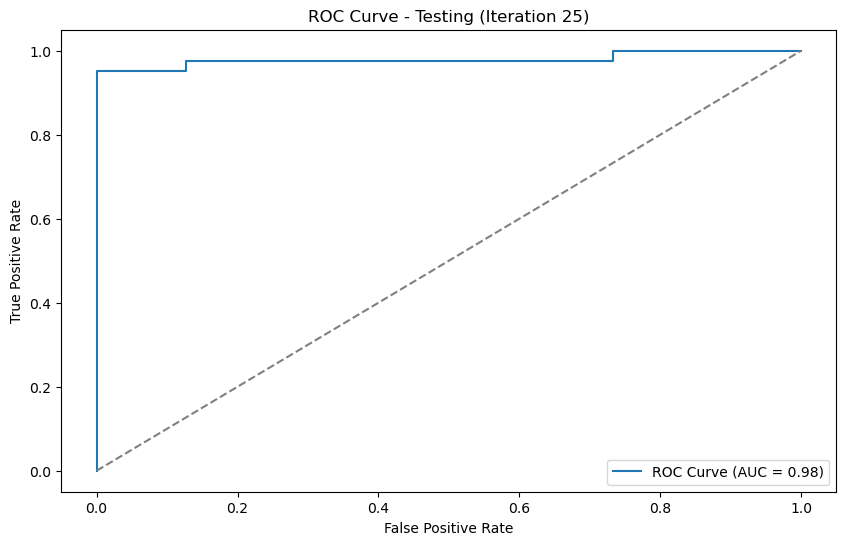

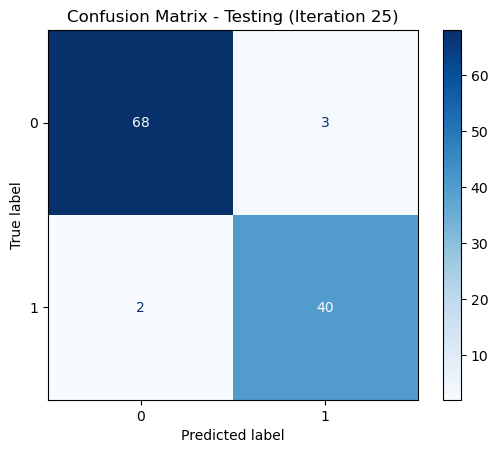

Iteration 25: Training Accuracy = 0.9868, Test Accuracy = 0.9558
Best Parameters: {'C': 3359818.2862837743}



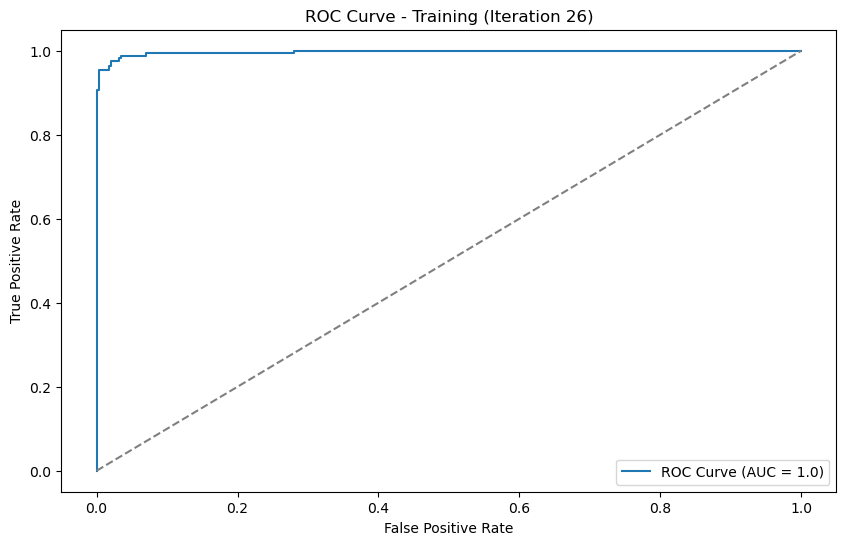

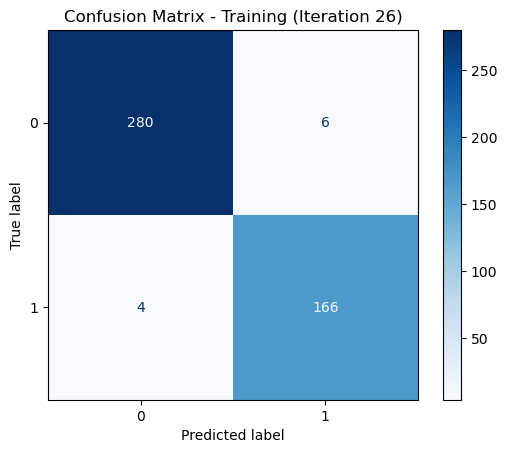

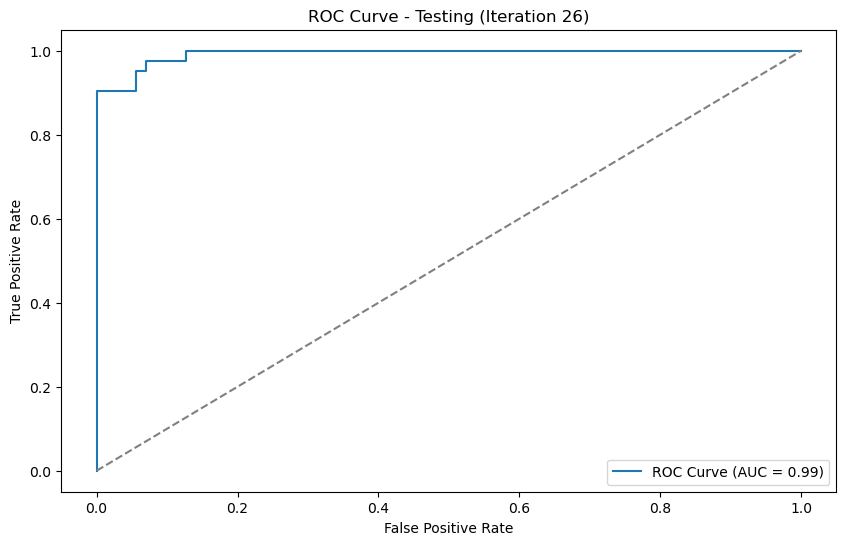

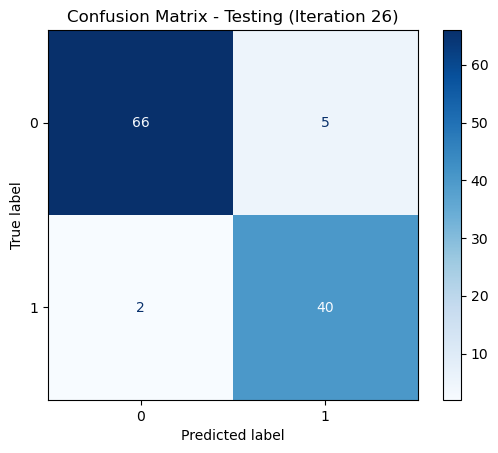

Iteration 26: Training Accuracy = 0.9781, Test Accuracy = 0.9381
Best Parameters: {'C': 1623.776739188721}



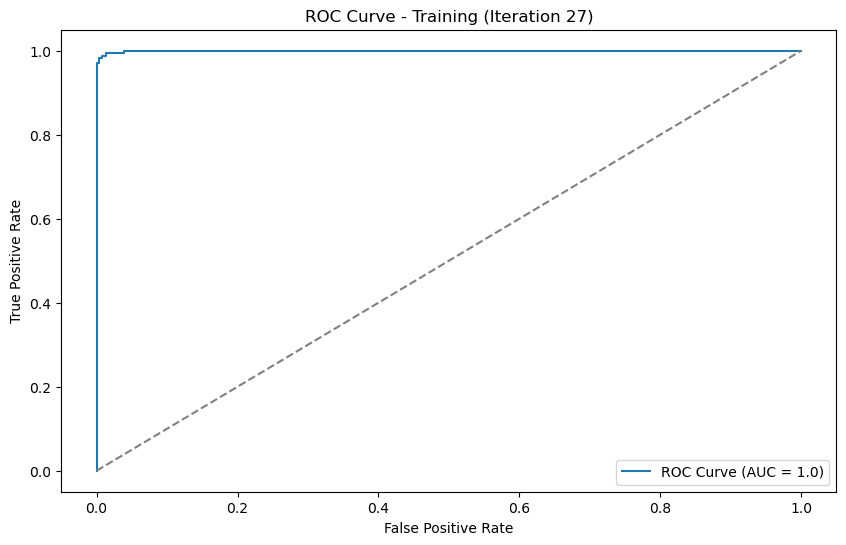

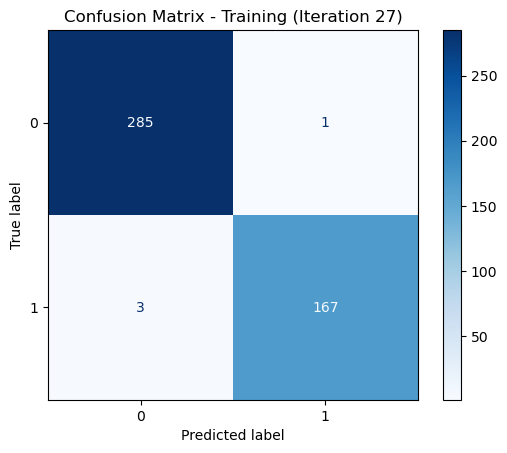

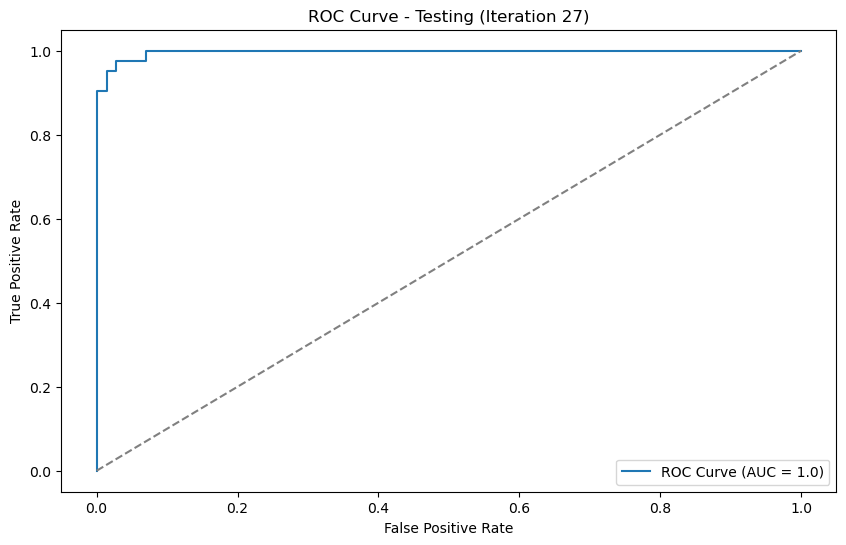

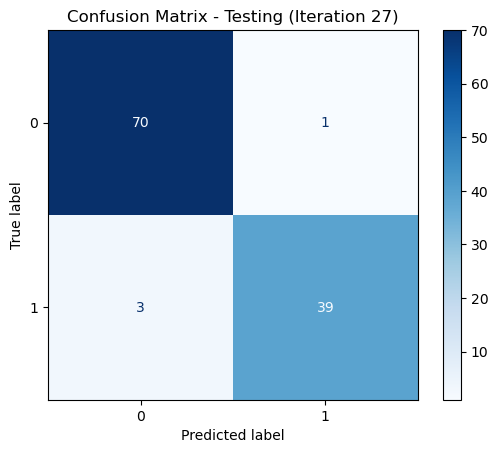

Iteration 27: Training Accuracy = 0.9912, Test Accuracy = 0.9646
Best Parameters: {'C': 379269.0190732246}



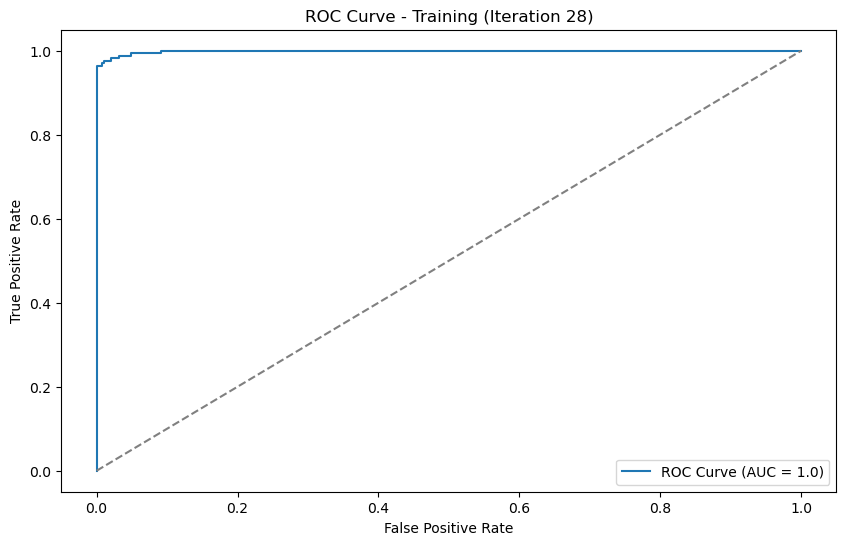

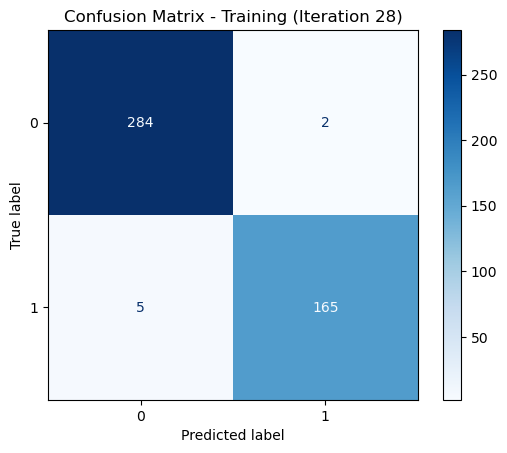

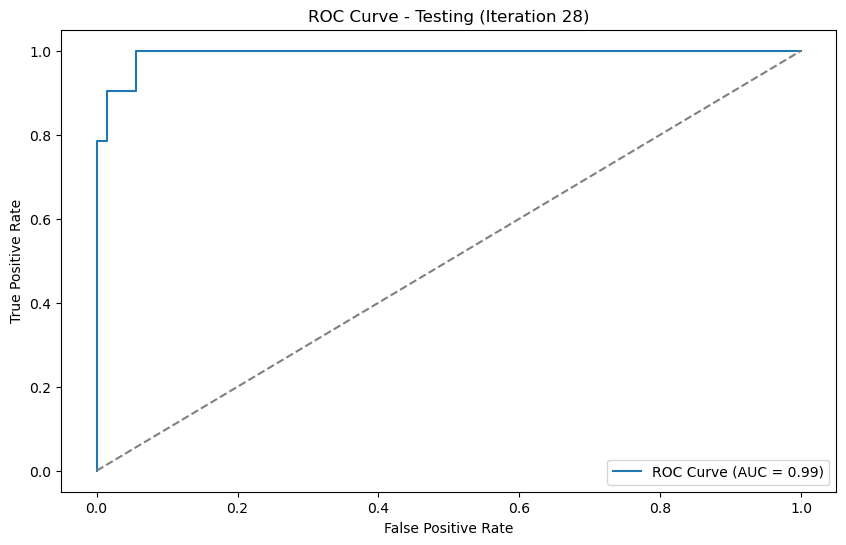

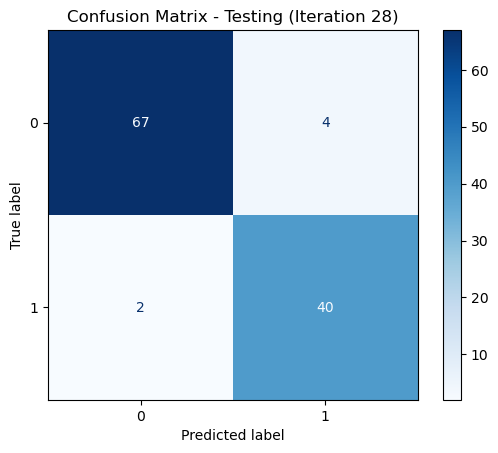

Iteration 28: Training Accuracy = 0.9846, Test Accuracy = 0.9469
Best Parameters: {'C': 42813.32398719387}



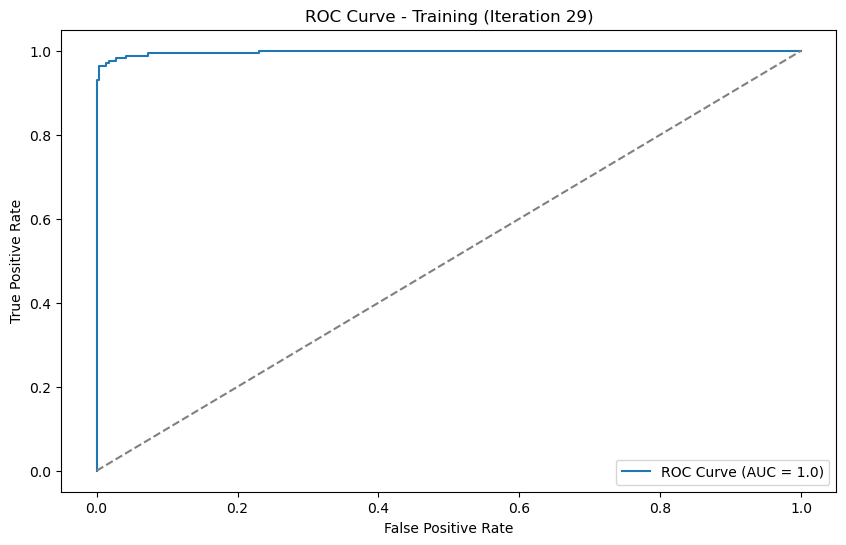

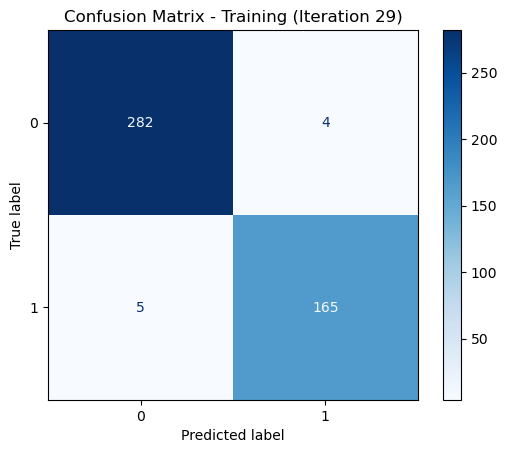

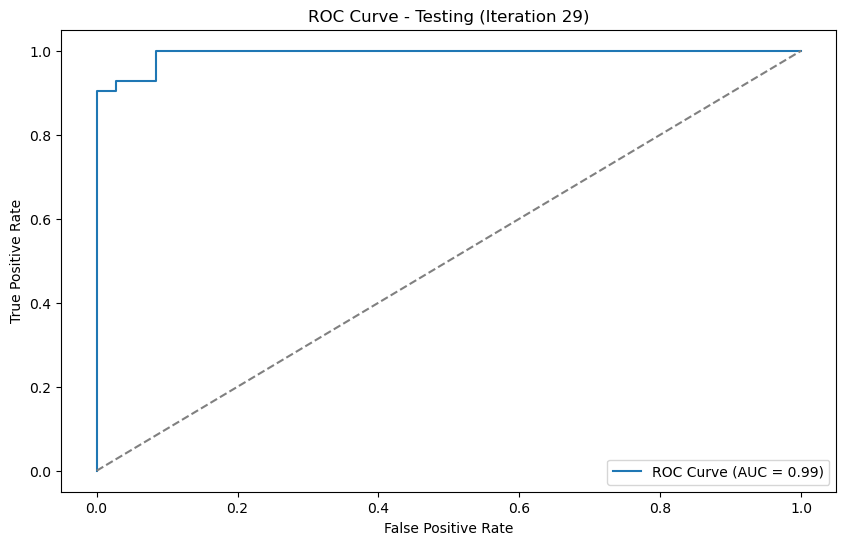

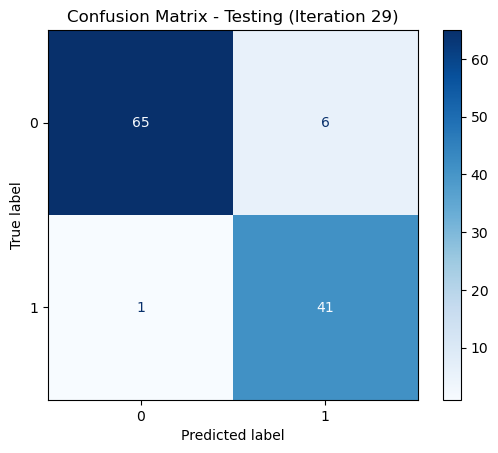

Iteration 29: Training Accuracy = 0.9803, Test Accuracy = 0.9381
Best Parameters: {'C': 1623.776739188721}



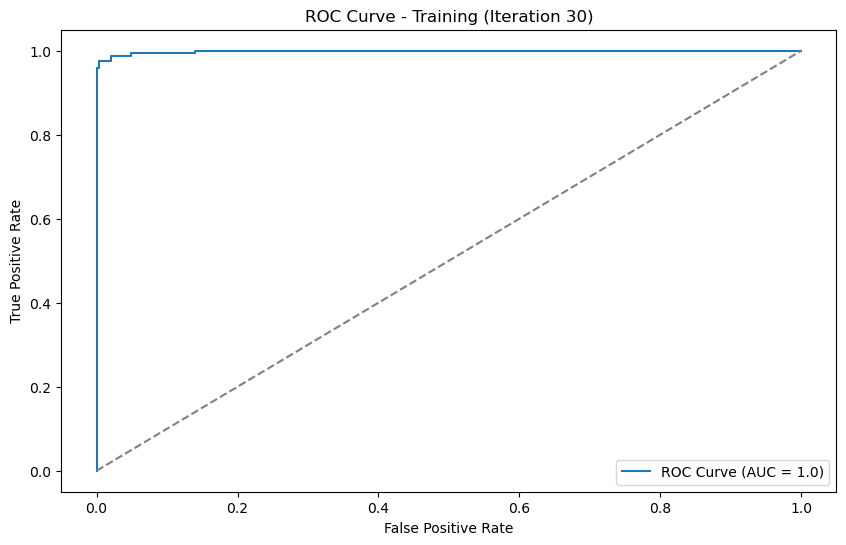

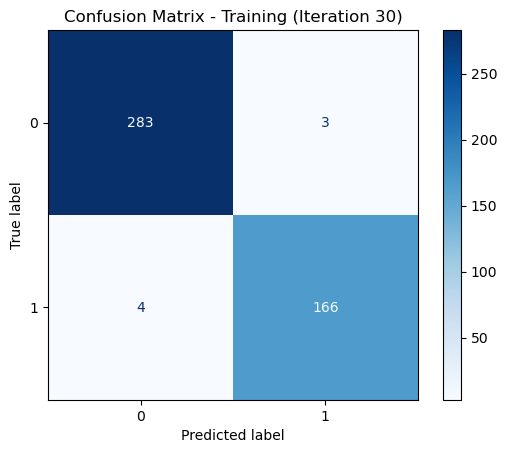

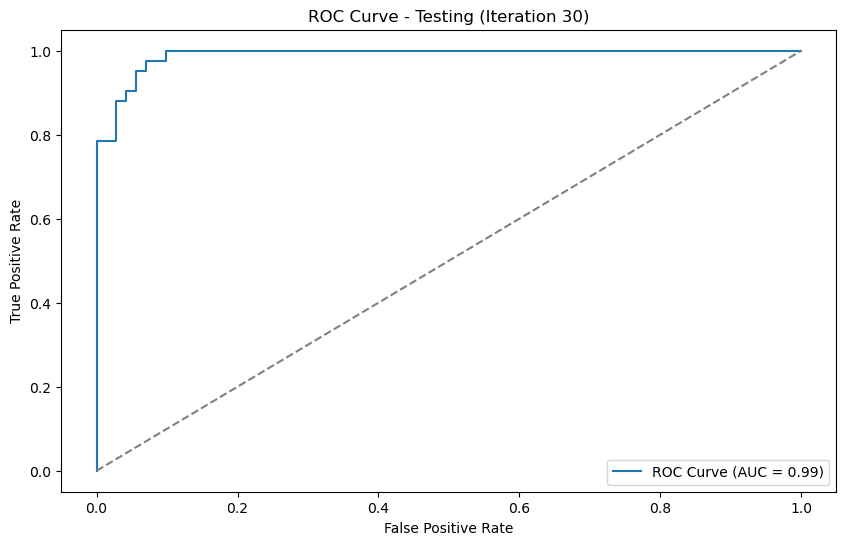

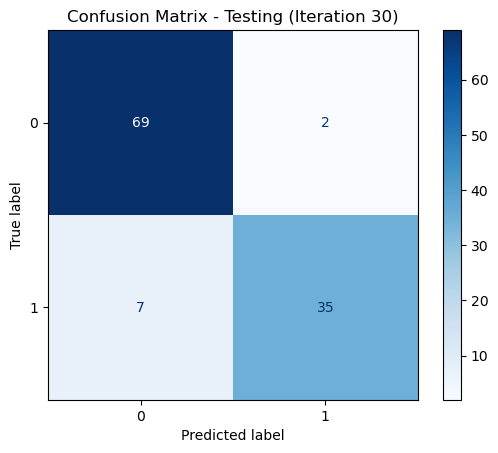

Iteration 30: Training Accuracy = 0.9846, Test Accuracy = 0.9204
Best Parameters: {'C': 4832.930238571752}


--- Summary of Metrics ---
               accuracy  precision    recall  f1-score       auc
Train Average  0.986323   0.986363  0.986323  0.986307  0.998793
Test Average   0.954897   0.955650  0.954897  0.954820  0.986663


In [16]:
train_results, test_results = monte_carlo_svm(df, 30, 'supervised-svm')

### ii. Semi-Supervised Learning / Self-training:

select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.  
#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [20]:
def semi_supervised_svm(train_x, train_y, settings):
    labeled_idx = []
    unlabeled_idx = []
    
    for c in [0, 1]:
        c_idx, = np.where(train_y == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        labeled_idx.extend(select_idx)
    
    for i in range(len(train_x)):
        if i not in labeled_idx:
            unlabeled_idx.append(i)

    labeled_x = train_x[labeled_idx].tolist()
    labeled_y = train_y.iloc[labeled_idx].to_numpy().tolist()
    unlabeled_x = train_x[unlabeled_idx].tolist()
    unlabeled_y = train_y.iloc[unlabeled_idx].to_numpy().tolist()
    
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(labeled_x, labeled_y)
    
    while len(unlabeled_x) > 0:
        scores = clf.decision_function(unlabeled_x)
        sorted_idx = sorted([i for i in range(len(unlabeled_x))], 
                            key=lambda x : abs(scores[x]))
        unlabeled_x = [unlabeled_x[i] for i in sorted_idx]
        unlabeled_y = [unlabeled_y[i] for i in sorted_idx]
        
        labeled_x.append(unlabeled_x.pop())
        labeled_y.append(unlabeled_y.pop())
        clf.best_estimator_.fit(labeled_x, labeled_y)
    
    return clf


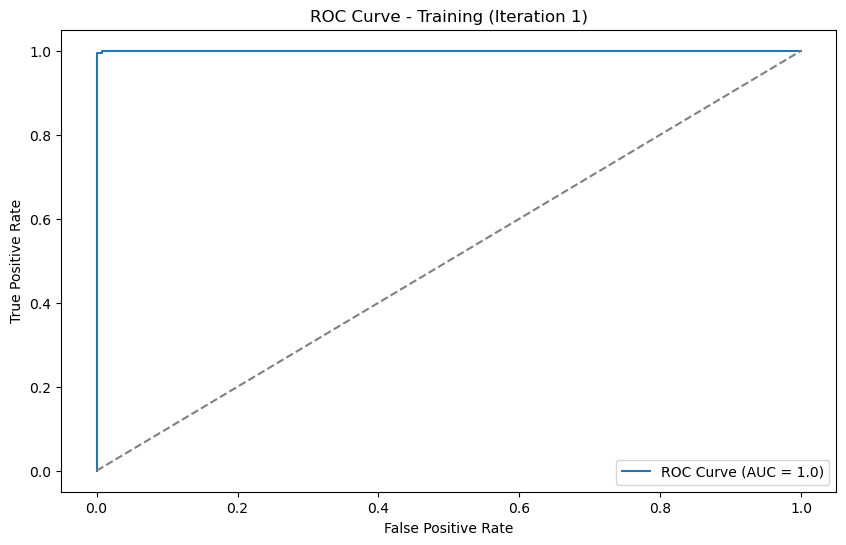

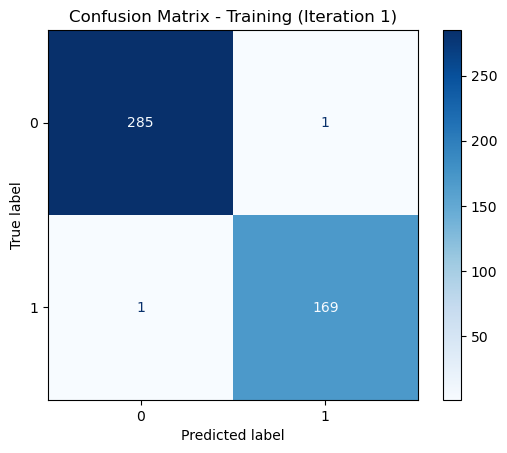

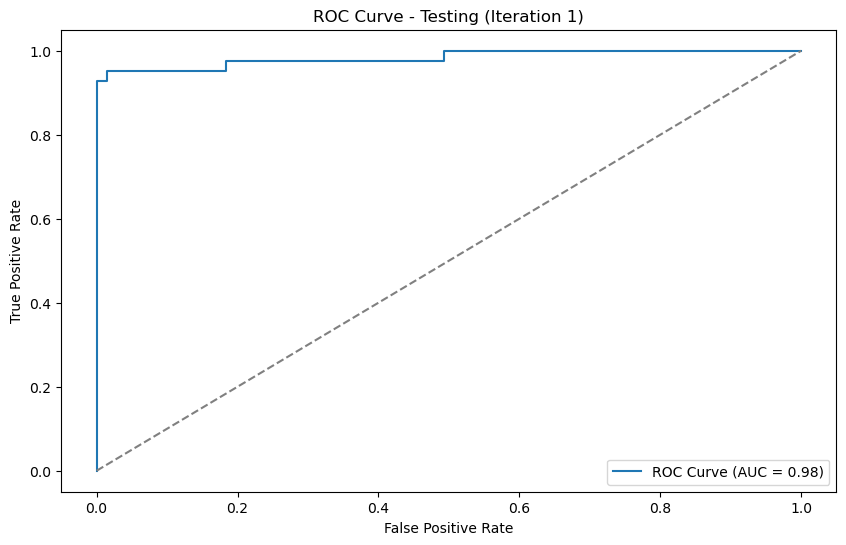

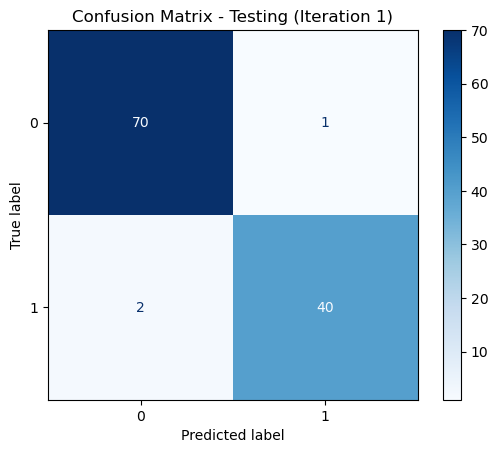

Iteration 1: Training Accuracy = 0.9956, Test Accuracy = 0.9735
Best Parameters: {'C': 10000000.0}



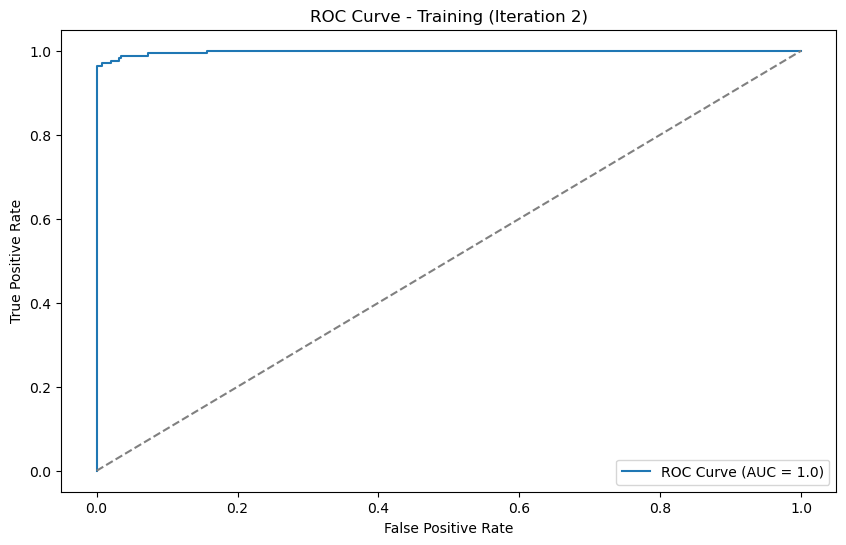

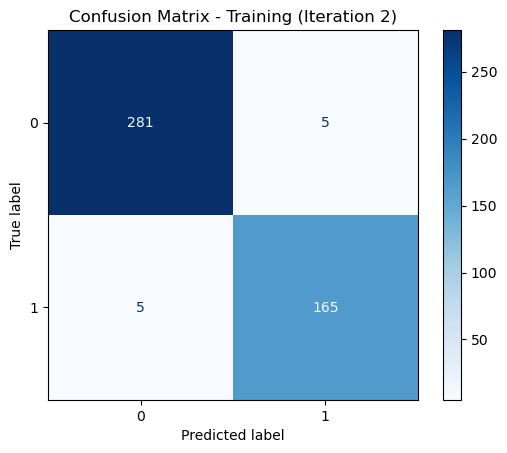

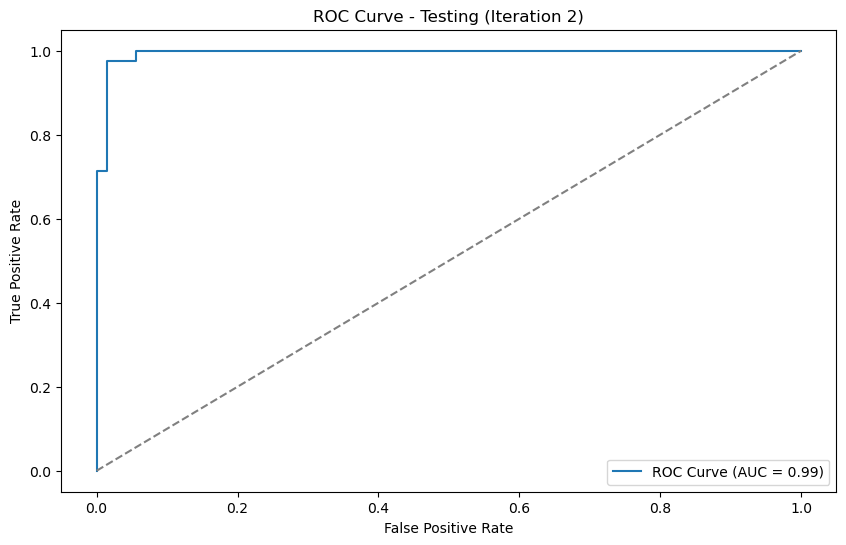

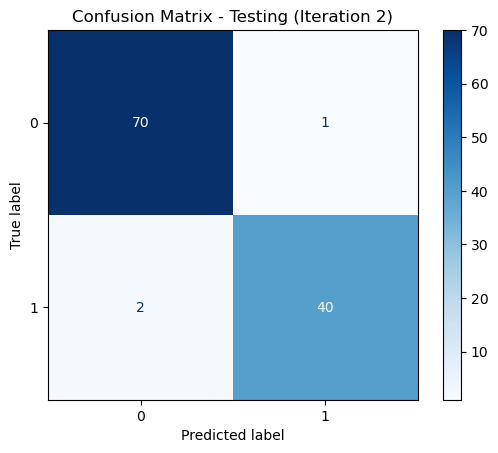

Iteration 2: Training Accuracy = 0.9781, Test Accuracy = 0.9735
Best Parameters: {'C': 10000.0}



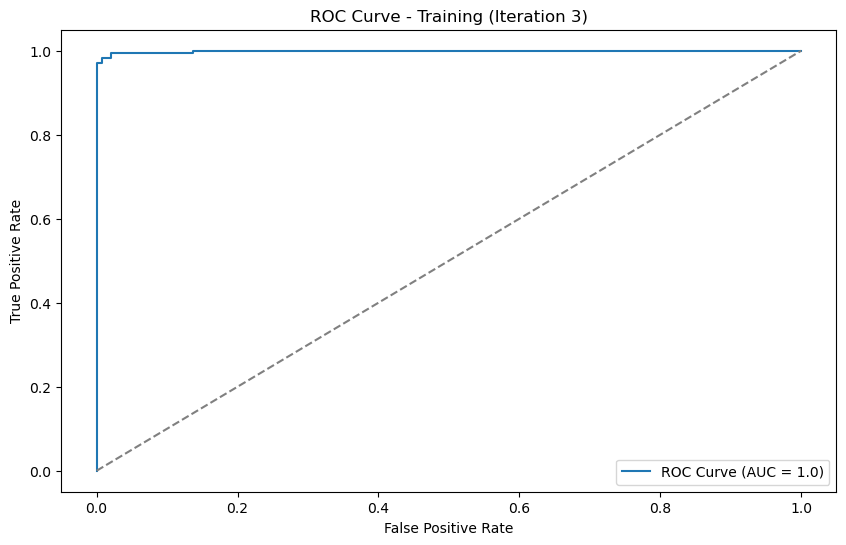

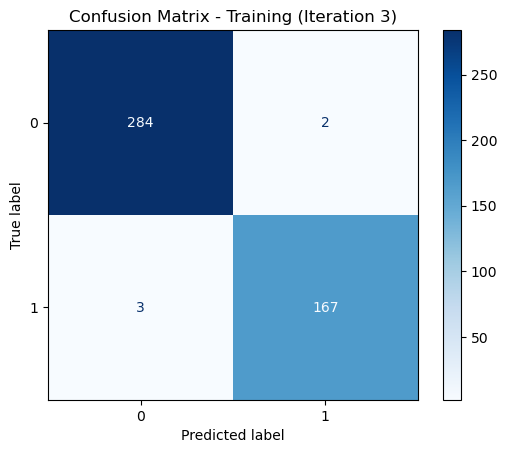

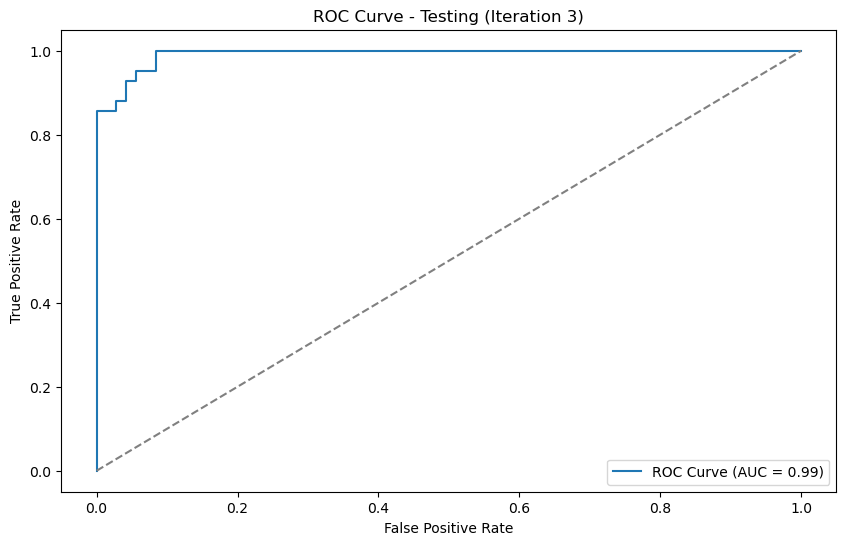

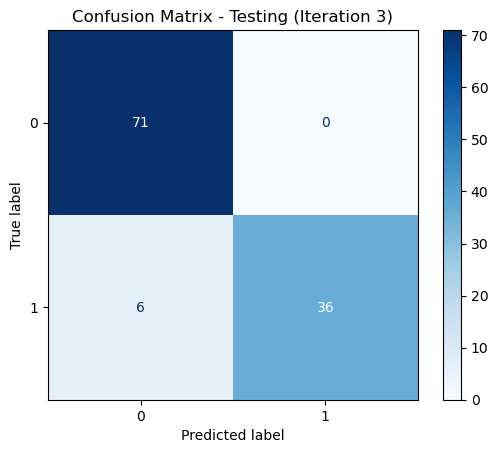

Iteration 3: Training Accuracy = 0.989, Test Accuracy = 0.9469
Best Parameters: {'C': 10000.0}



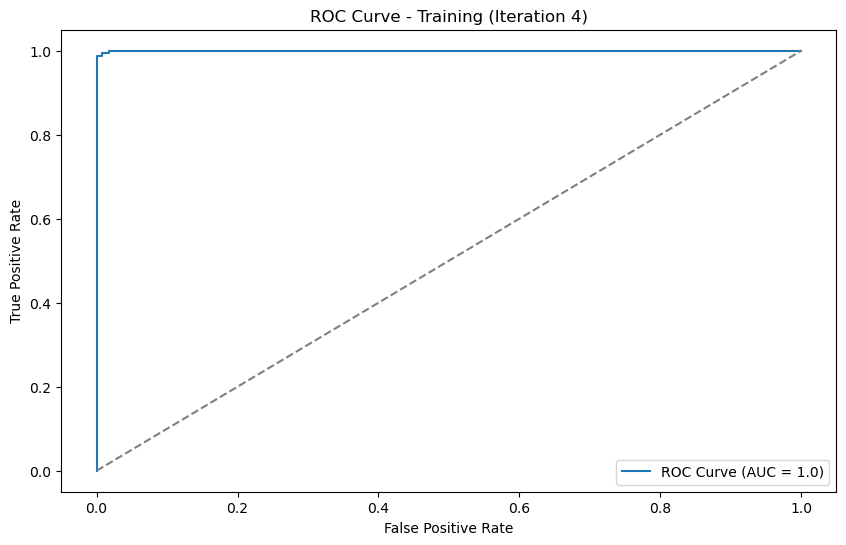

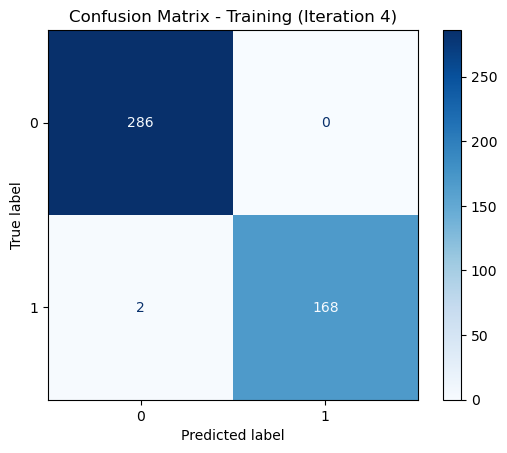

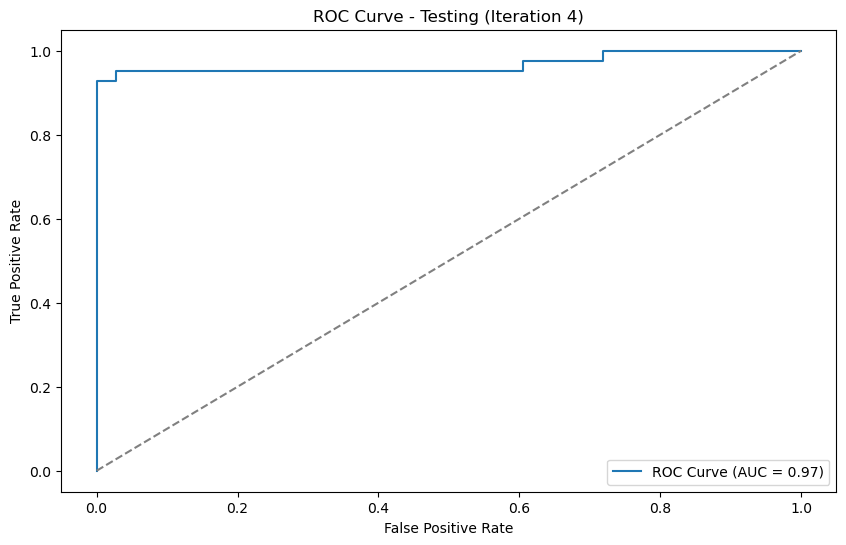

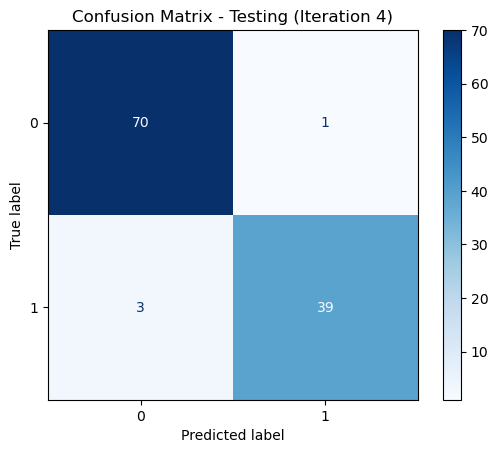

Iteration 4: Training Accuracy = 0.9956, Test Accuracy = 0.9646
Best Parameters: {'C': 100000.0}



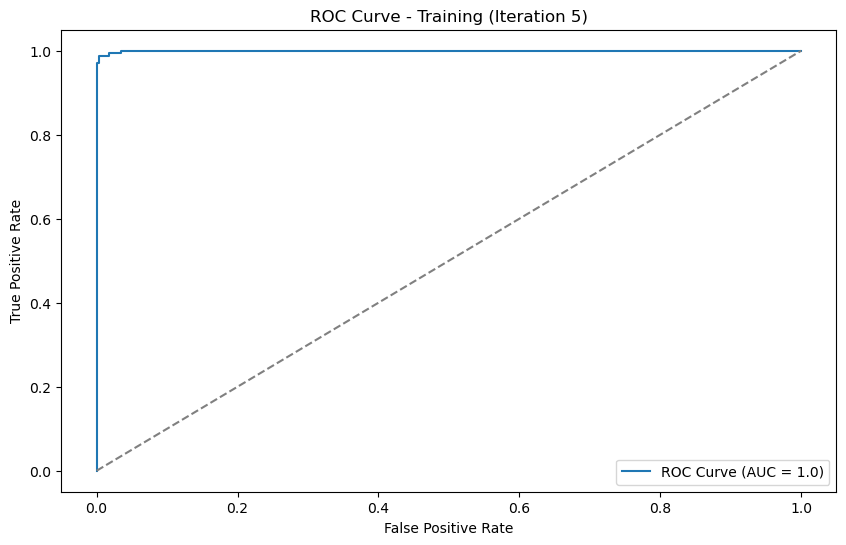

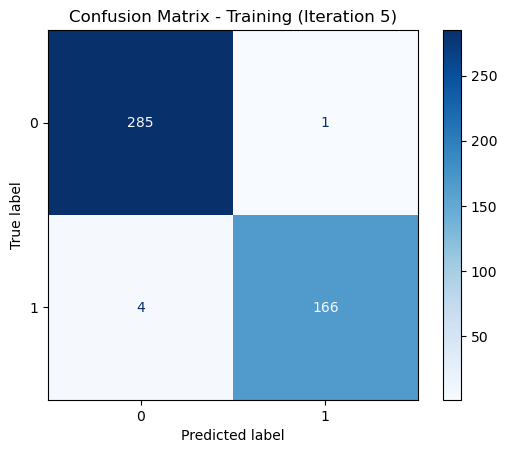

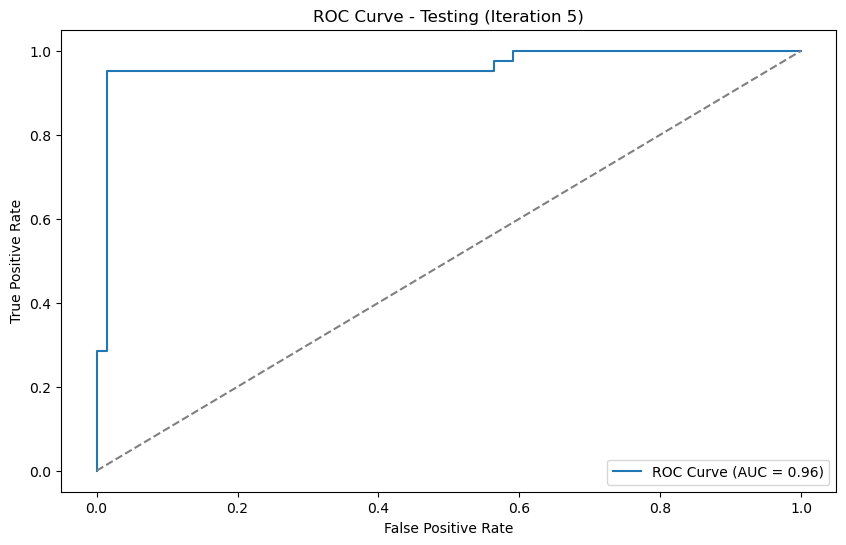

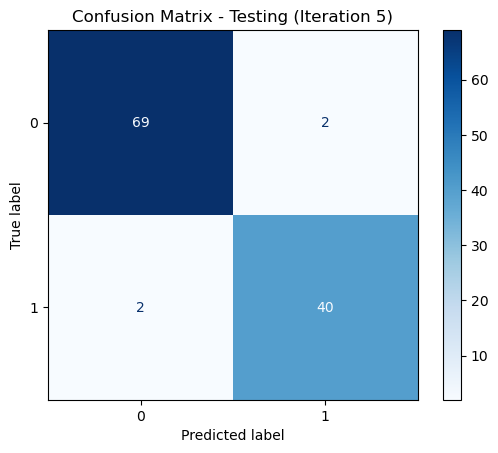

Iteration 5: Training Accuracy = 0.989, Test Accuracy = 0.9646
Best Parameters: {'C': 10000.0}



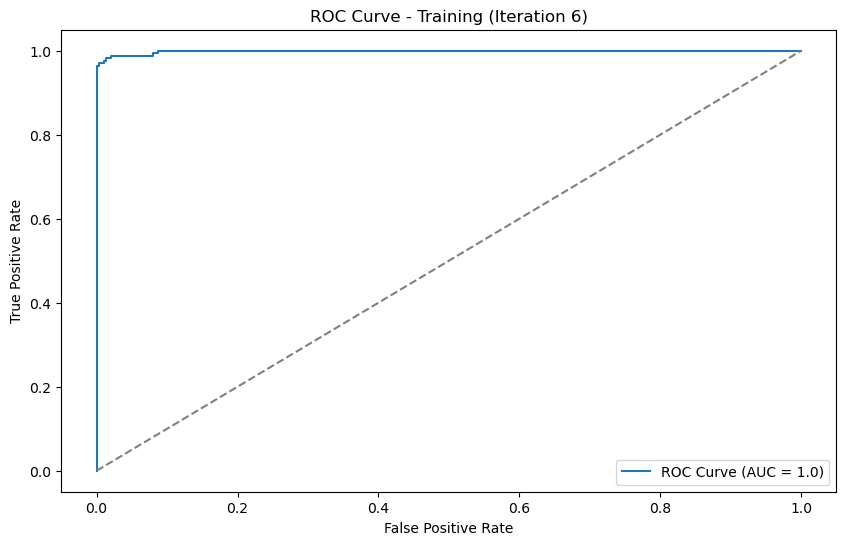

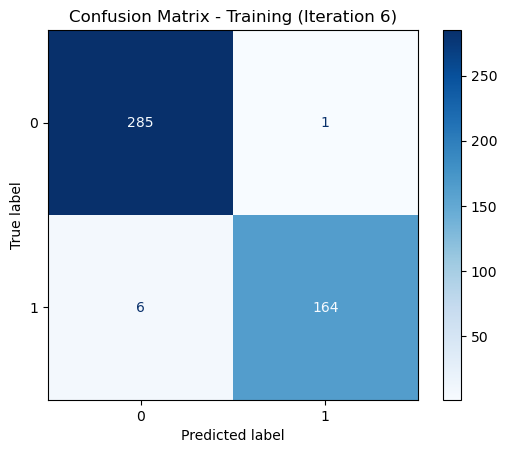

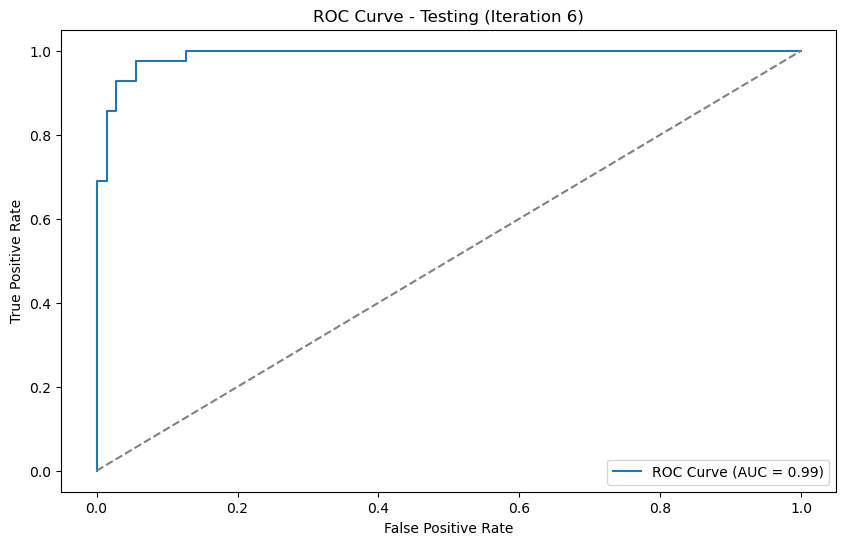

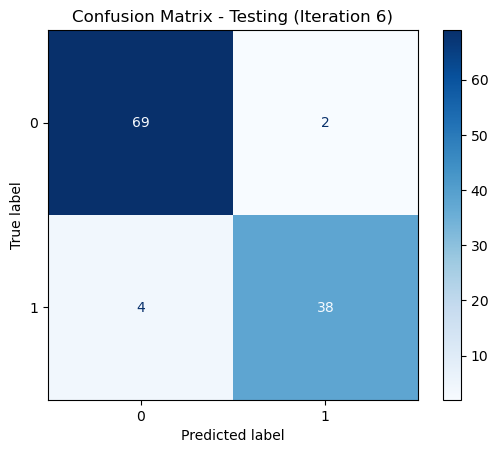

Iteration 6: Training Accuracy = 0.9846, Test Accuracy = 0.9469
Best Parameters: {'C': 10000.0}



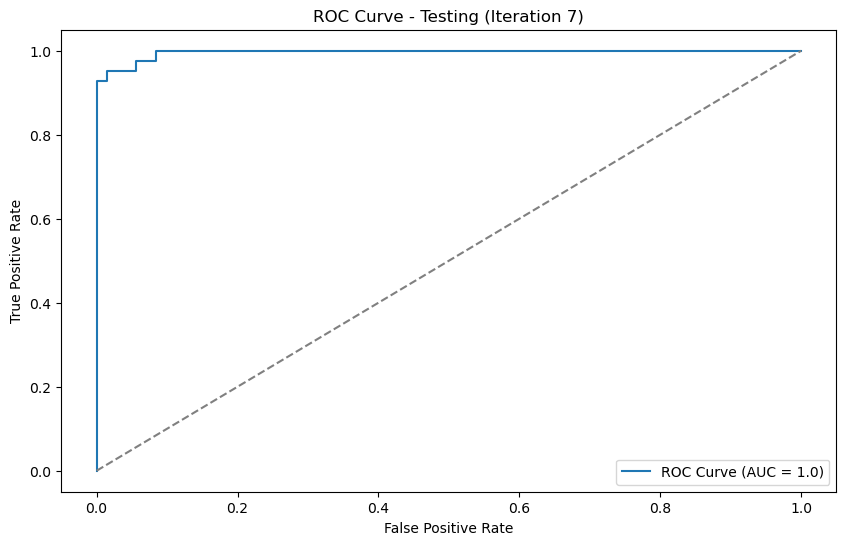

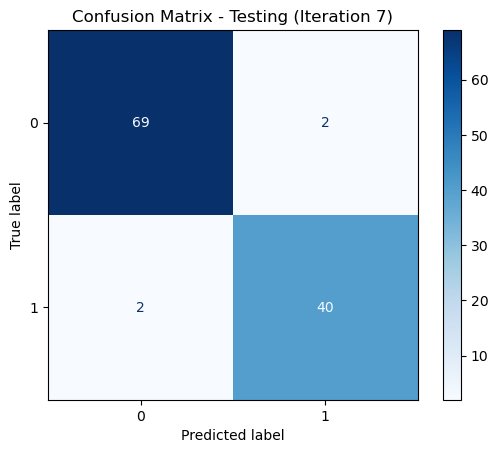

Iteration 7: Training Accuracy = 0.9781, Test Accuracy = 0.9646
Best Parameters: {'C': 100000.0}



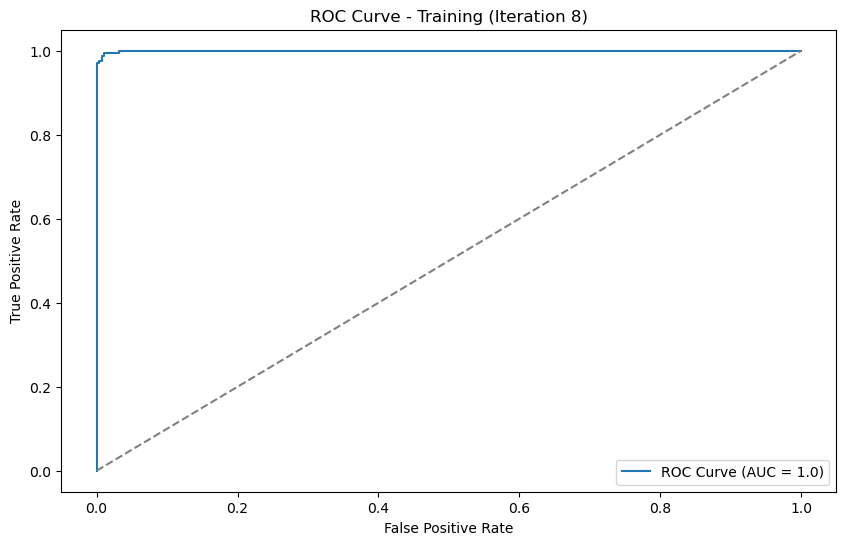

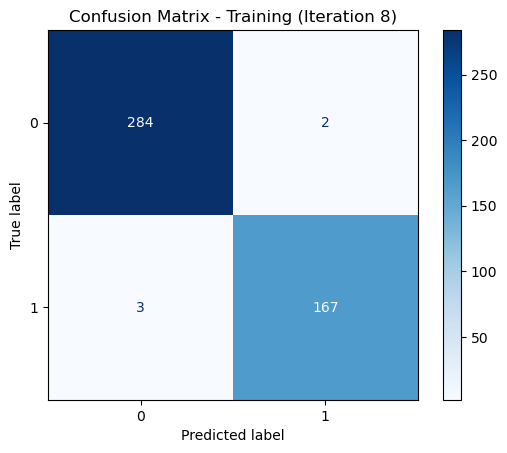

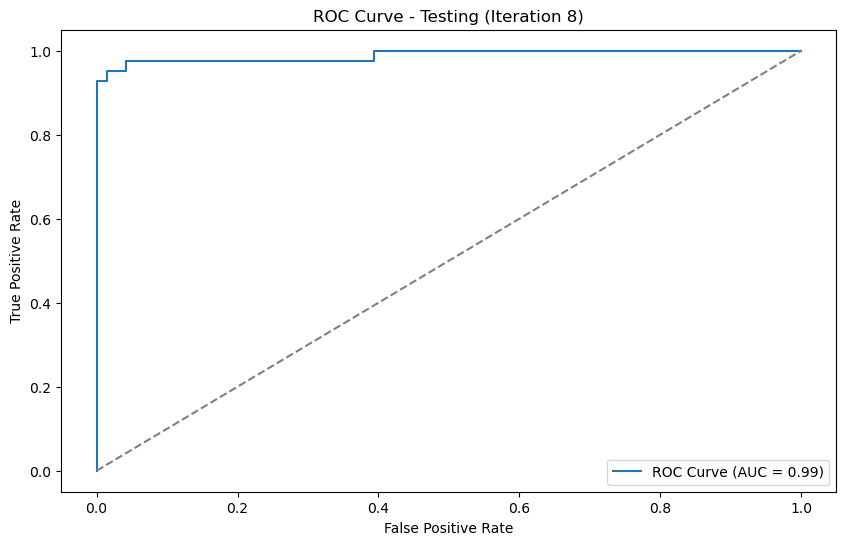

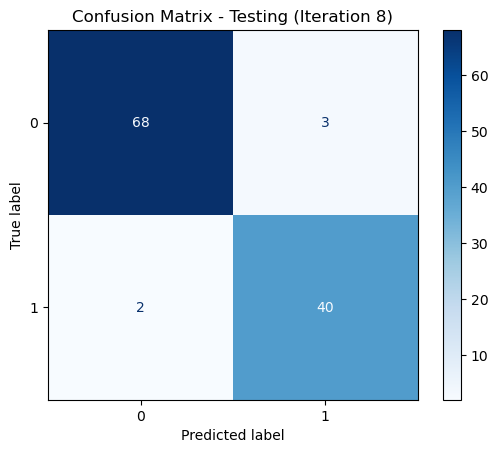

Iteration 8: Training Accuracy = 0.989, Test Accuracy = 0.9558
Best Parameters: {'C': 1000000.0}



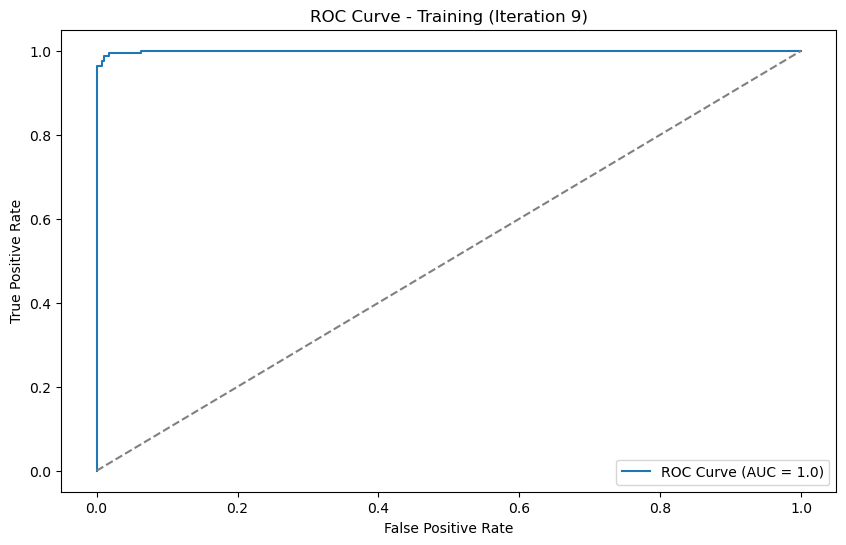

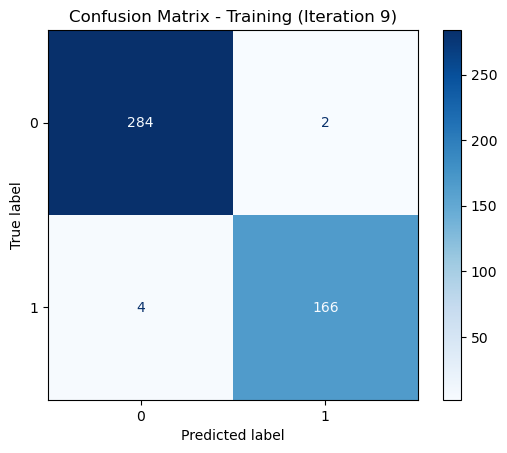

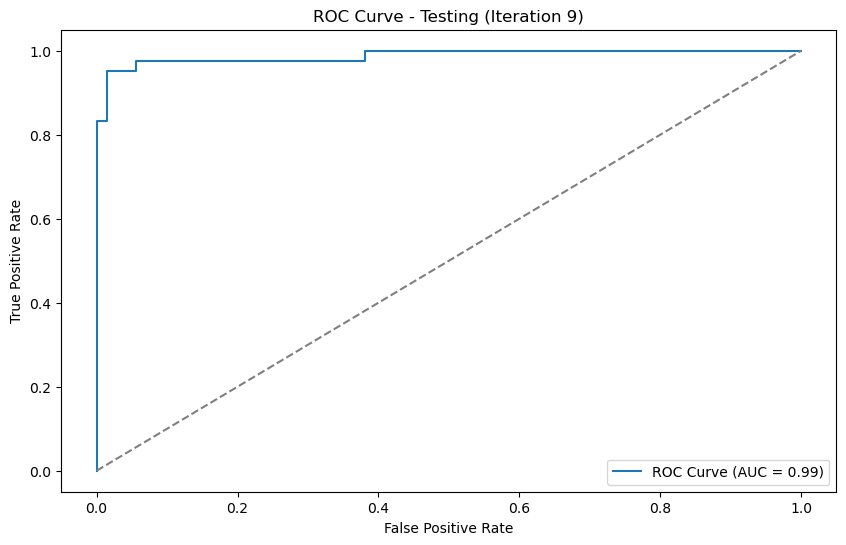

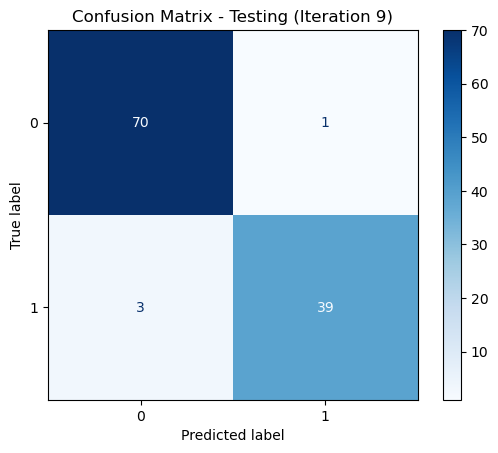

Iteration 9: Training Accuracy = 0.9868, Test Accuracy = 0.9646
Best Parameters: {'C': 10000.0}



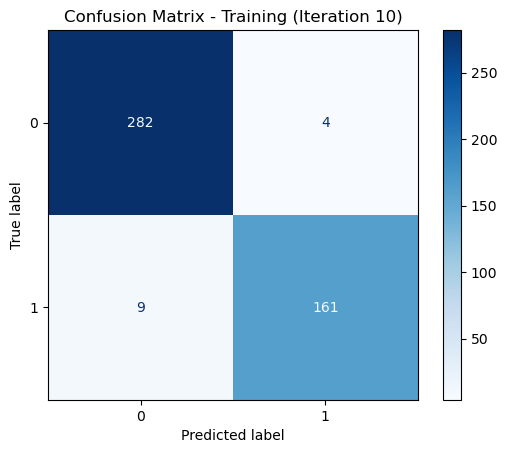

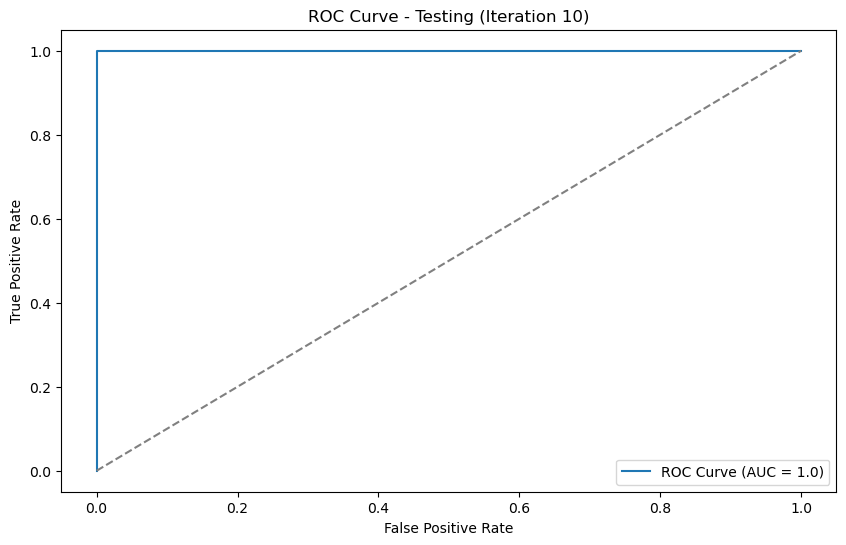

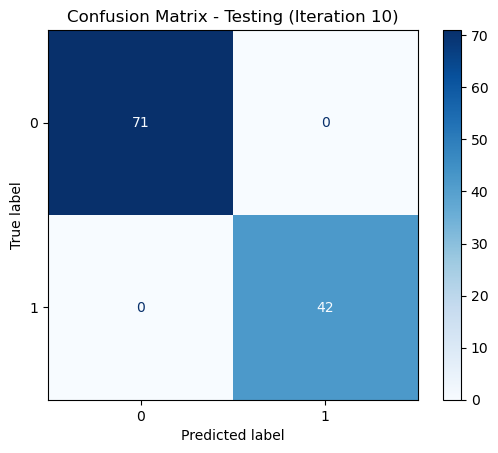

Iteration 10: Training Accuracy = 0.9715, Test Accuracy = 1.0
Best Parameters: {'C': 10000.0}



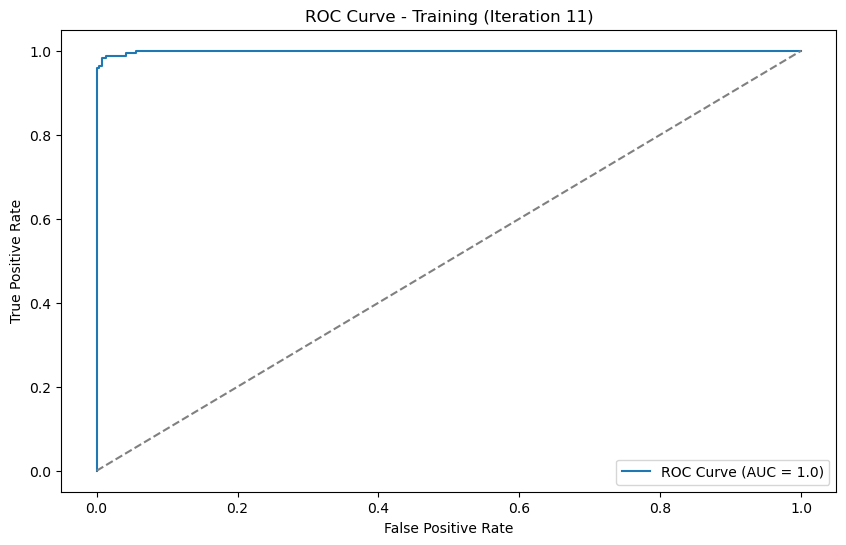

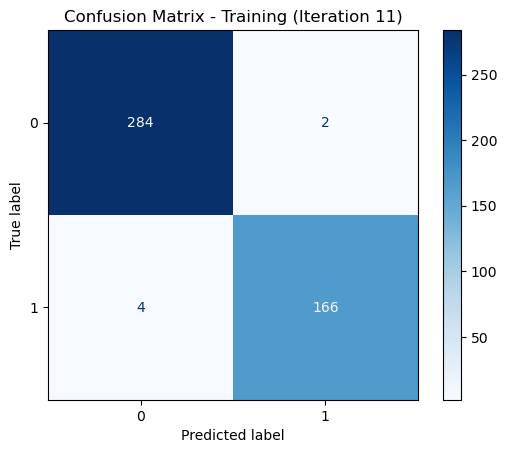

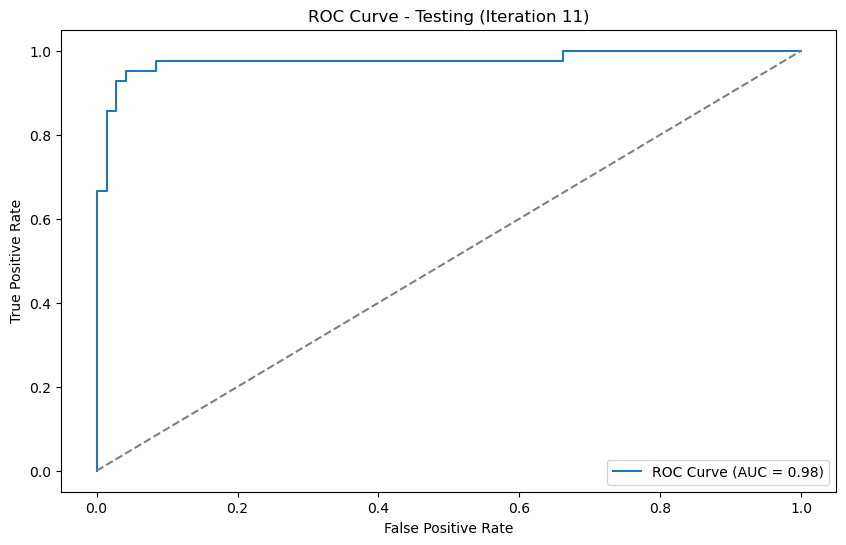

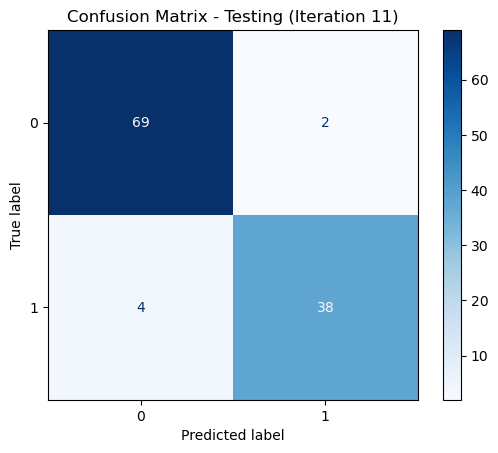

Iteration 11: Training Accuracy = 0.9868, Test Accuracy = 0.9469
Best Parameters: {'C': 100000.0}



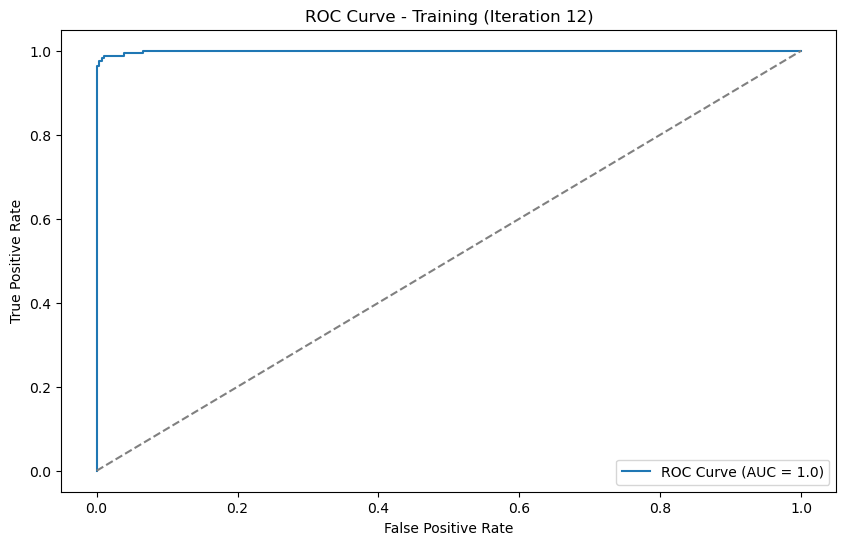

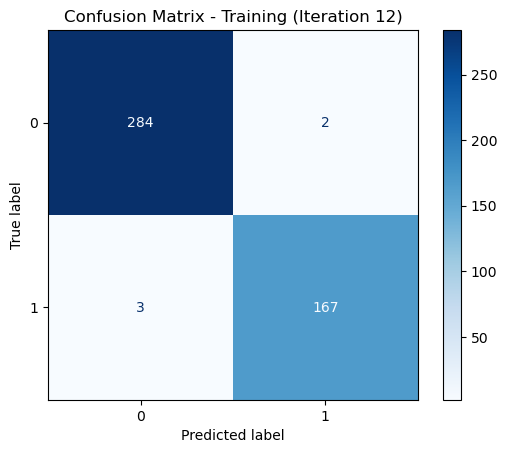

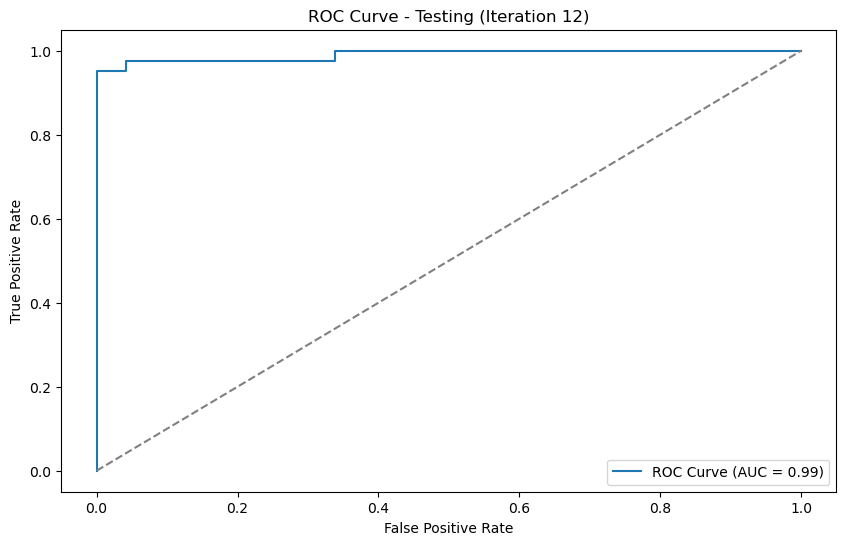

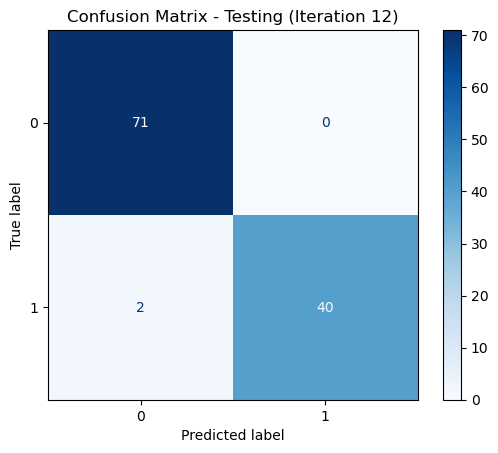

Iteration 12: Training Accuracy = 0.989, Test Accuracy = 0.9823
Best Parameters: {'C': 100000.0}



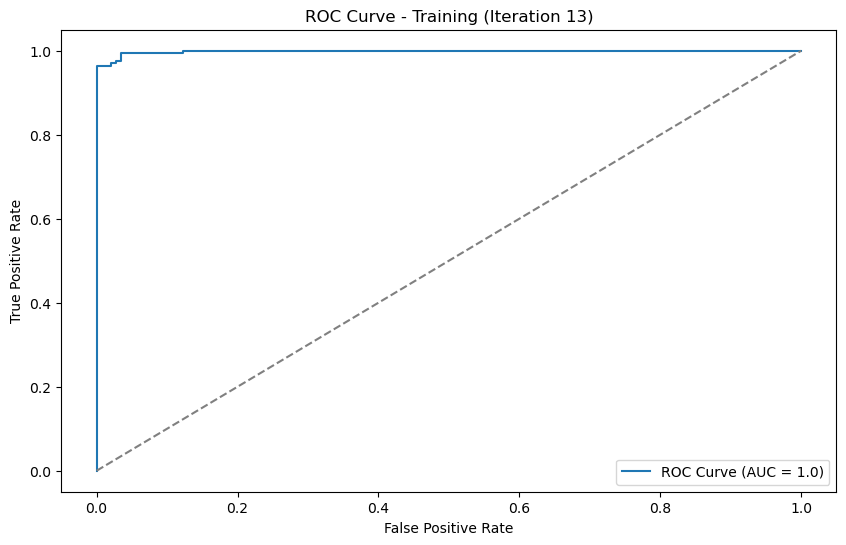

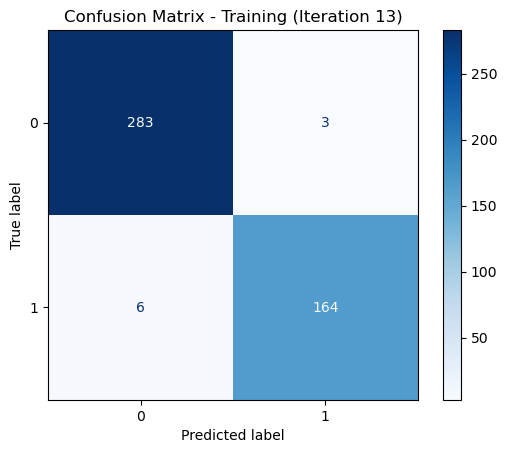

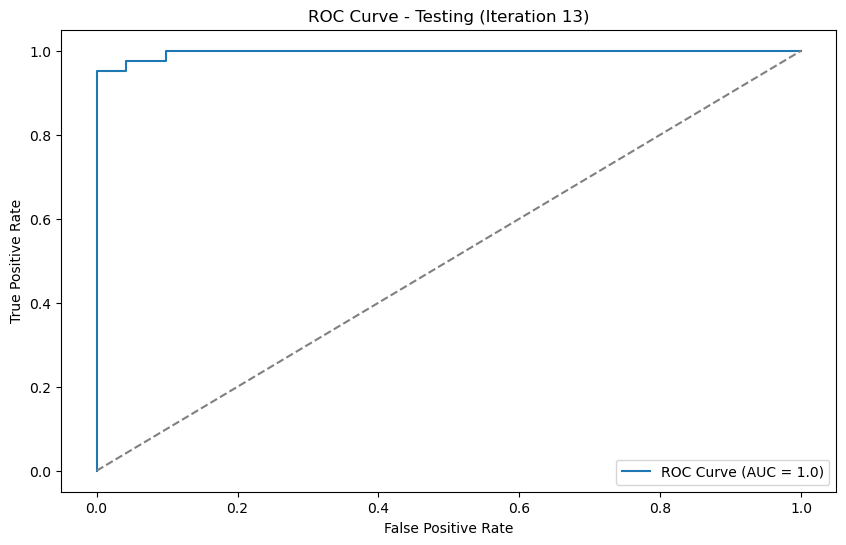

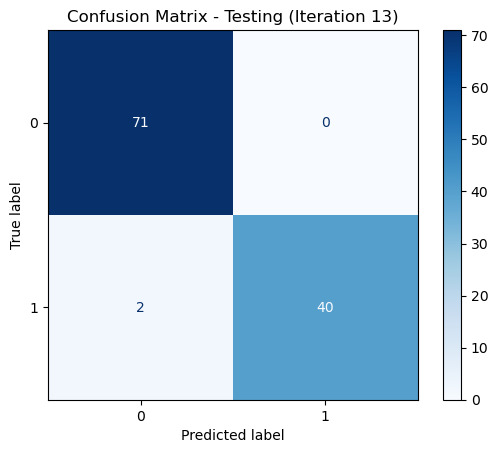

Iteration 13: Training Accuracy = 0.9803, Test Accuracy = 0.9823
Best Parameters: {'C': 100000.0}



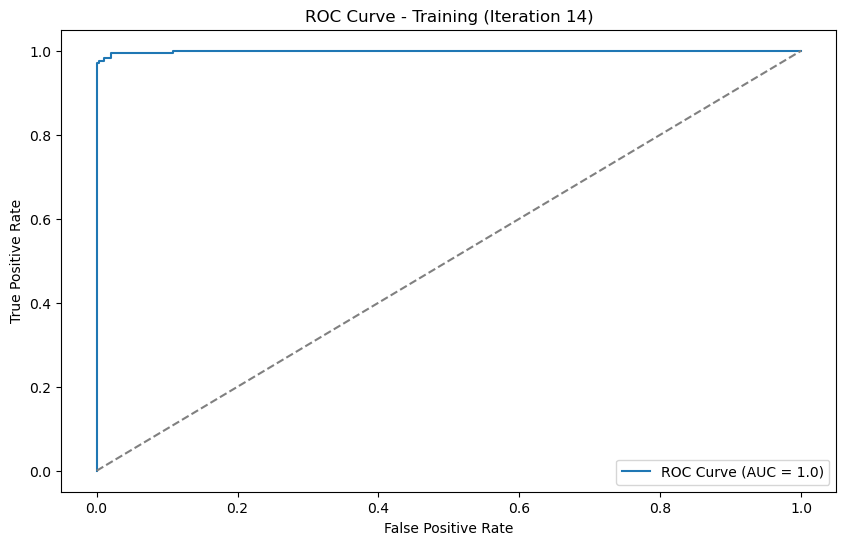

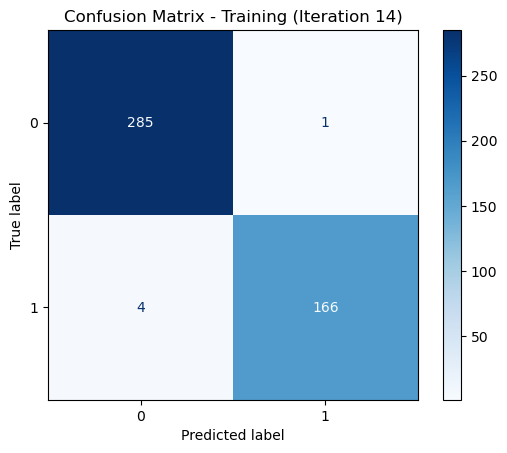

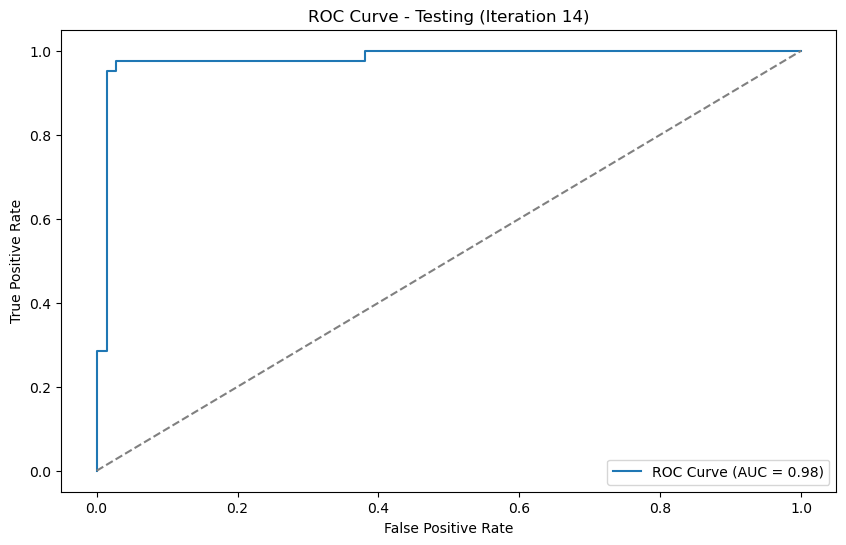

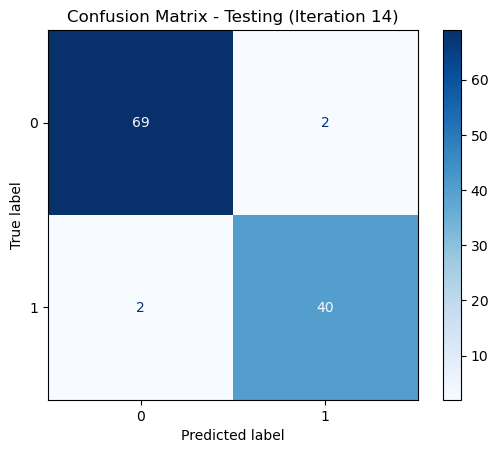

Iteration 14: Training Accuracy = 0.989, Test Accuracy = 0.9646
Best Parameters: {'C': 10000.0}



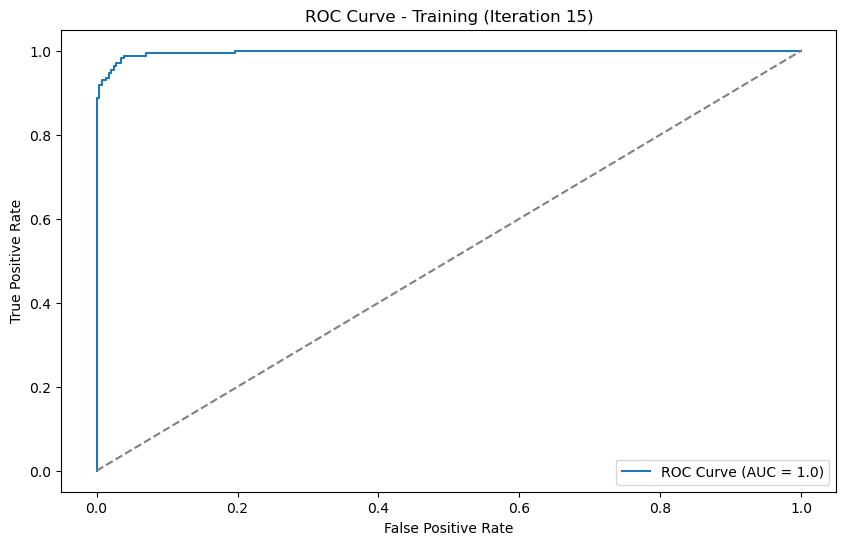

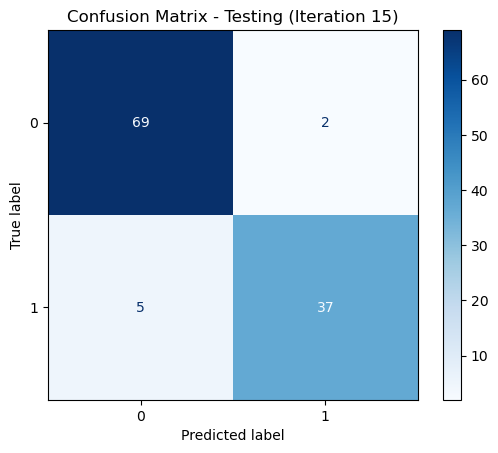

Iteration 15: Training Accuracy = 0.9671, Test Accuracy = 0.9381
Best Parameters: {'C': 1000.0}



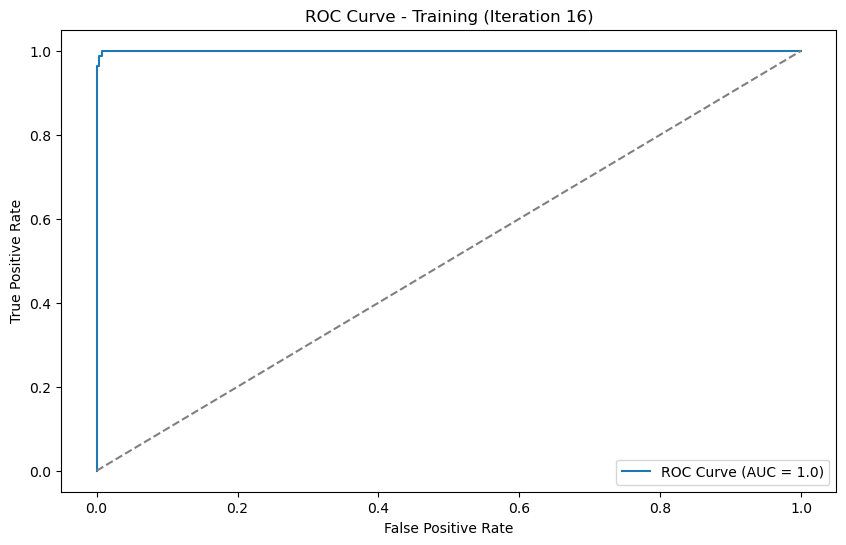

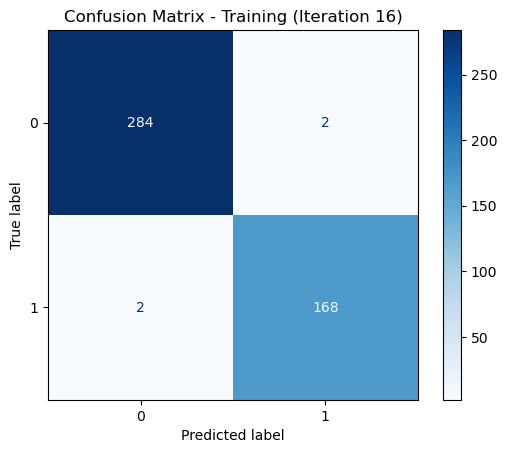

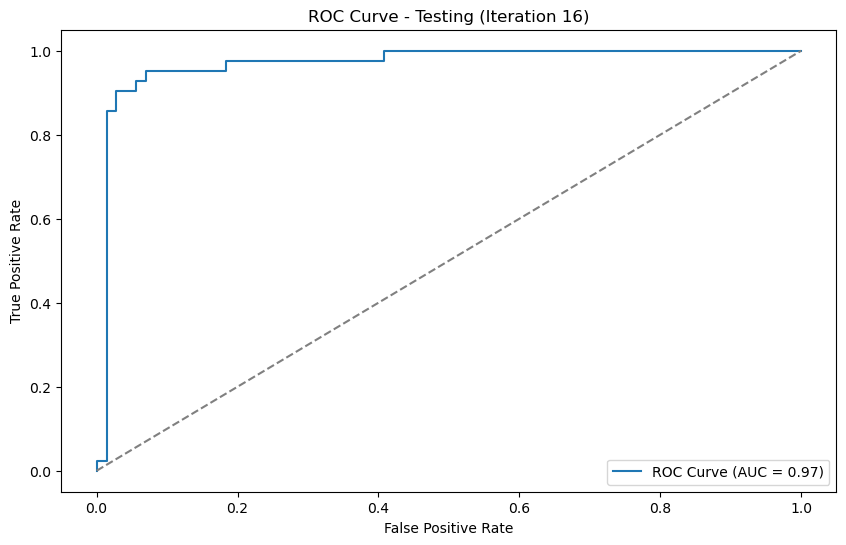

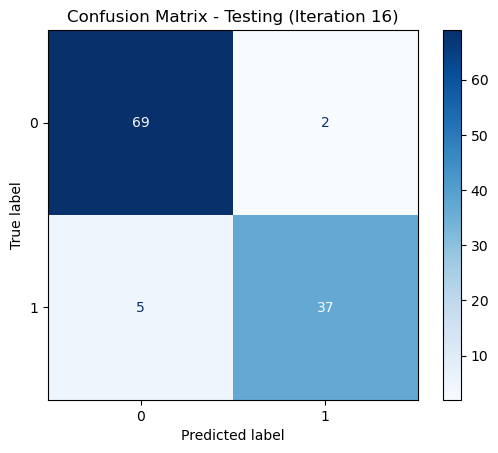

Iteration 16: Training Accuracy = 0.9912, Test Accuracy = 0.9381
Best Parameters: {'C': 10000.0}



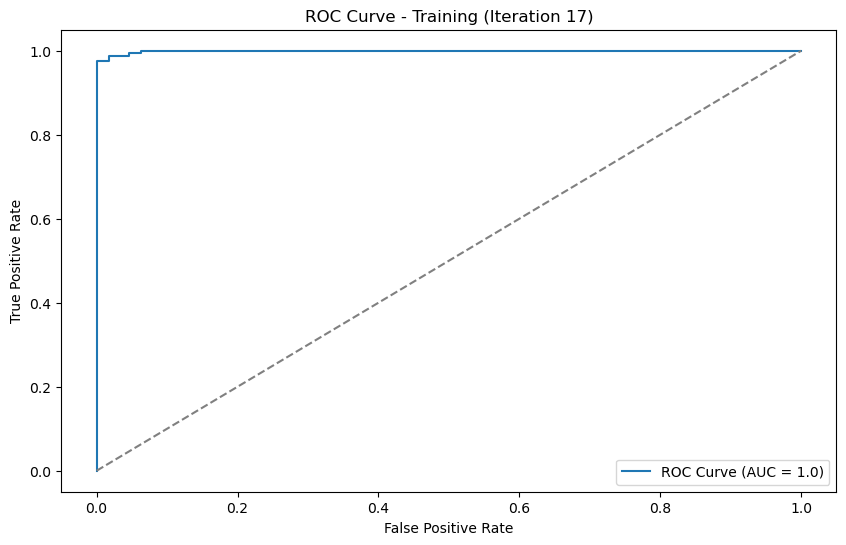

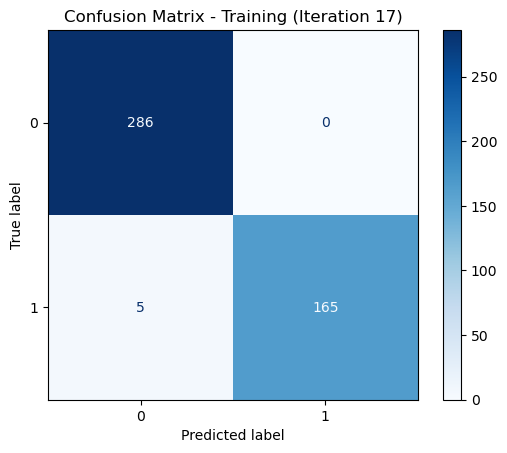

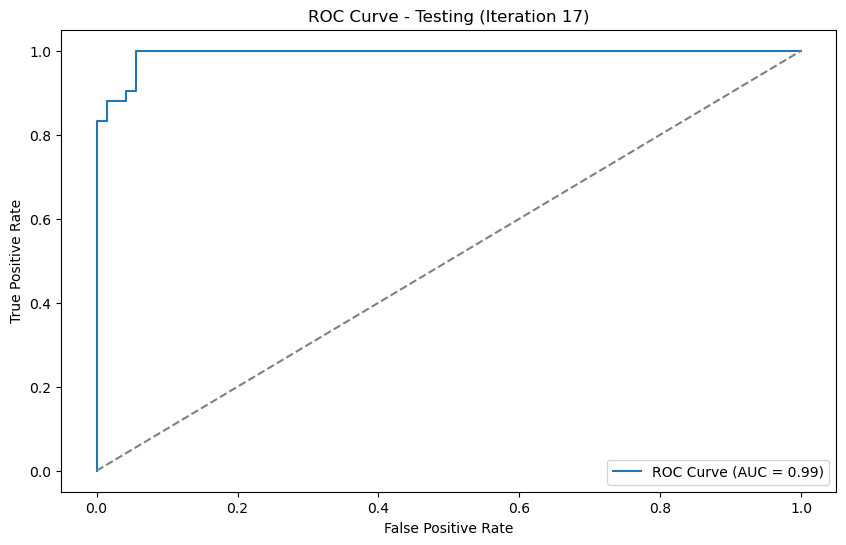

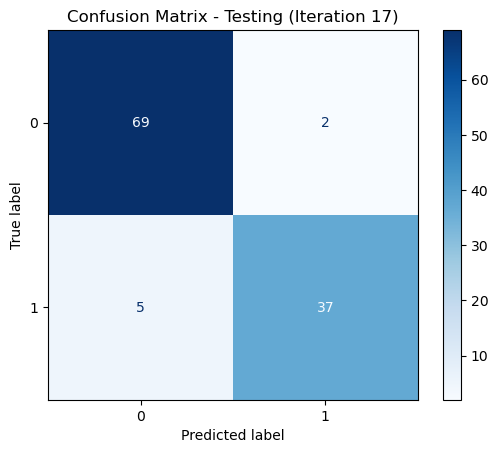

Iteration 17: Training Accuracy = 0.989, Test Accuracy = 0.9381
Best Parameters: {'C': 10000.0}



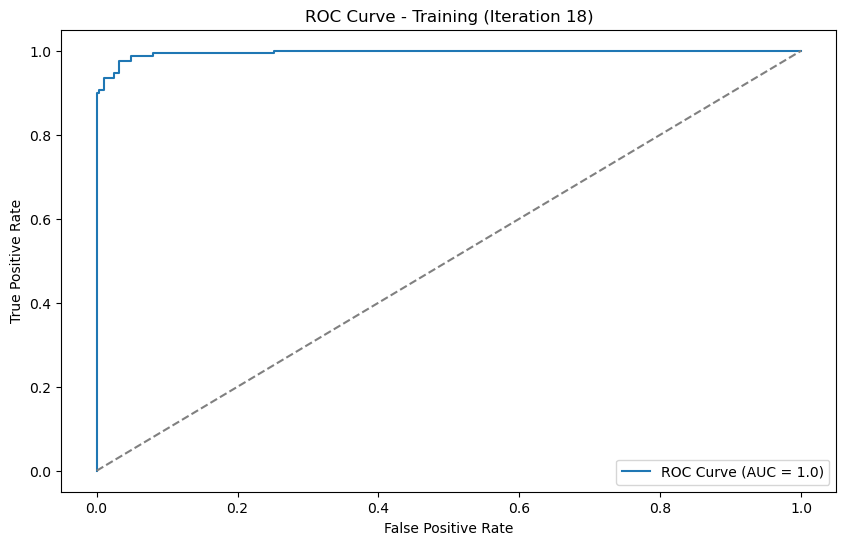

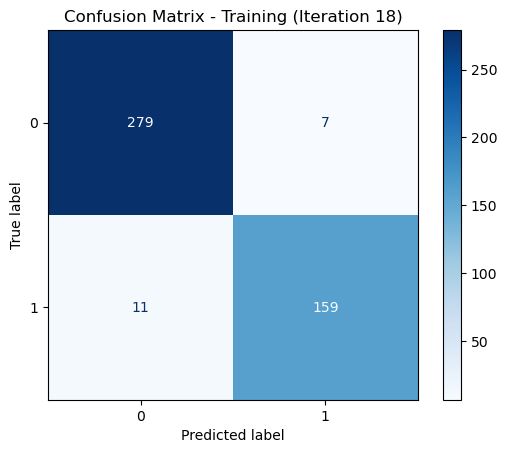

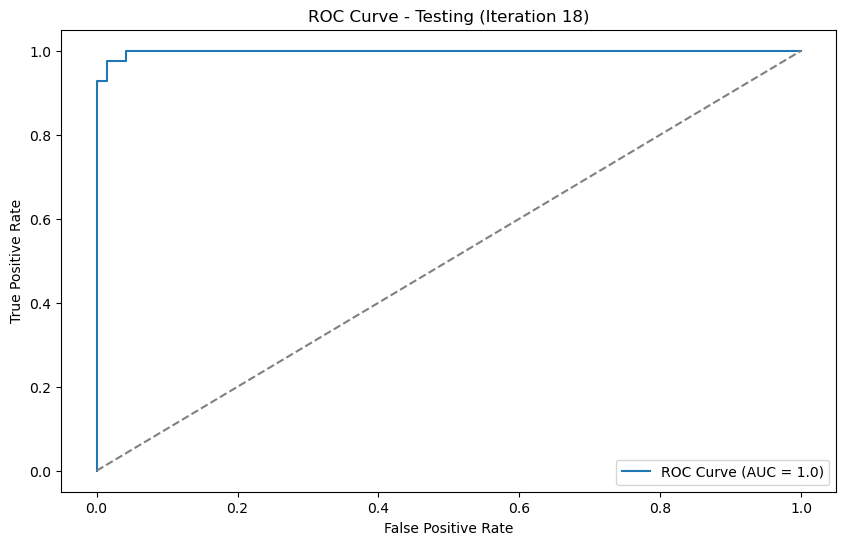

Iteration 18: Training Accuracy = 0.9605, Test Accuracy = 0.9735
Best Parameters: {'C': 1000.0}



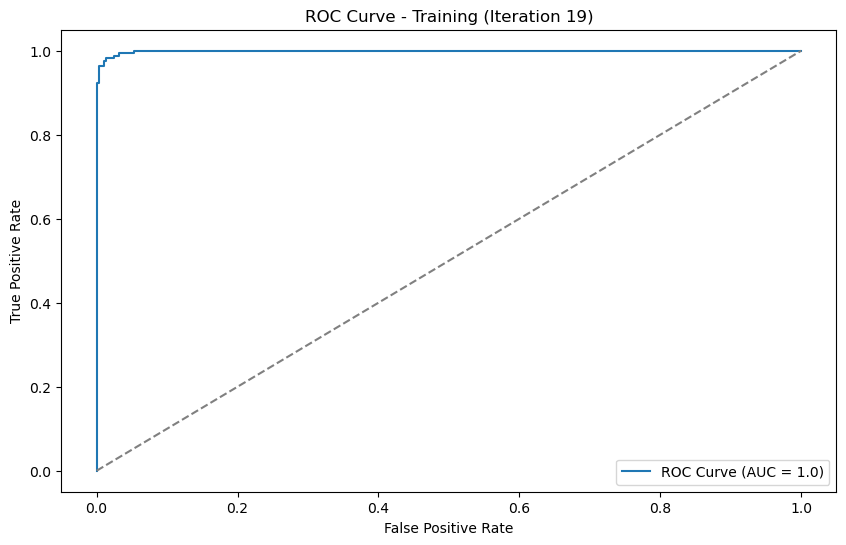

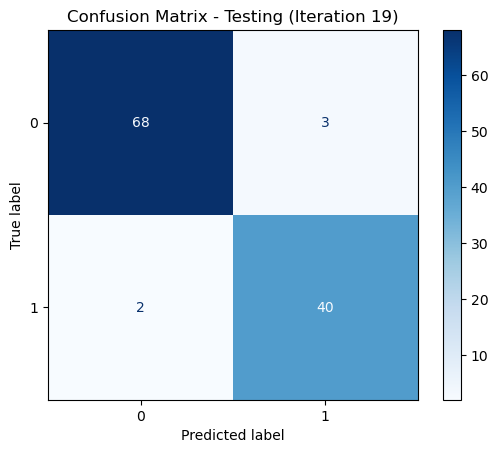

Iteration 19: Training Accuracy = 0.9846, Test Accuracy = 0.9558
Best Parameters: {'C': 1000000.0}



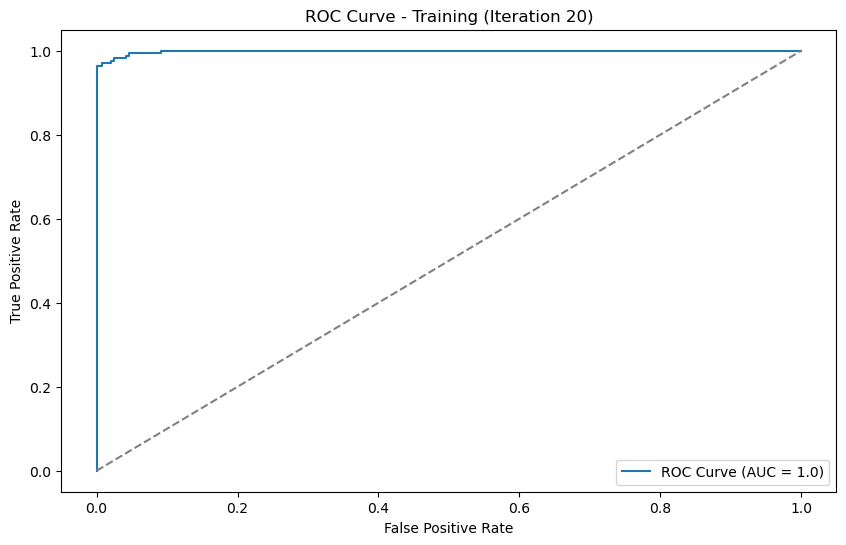

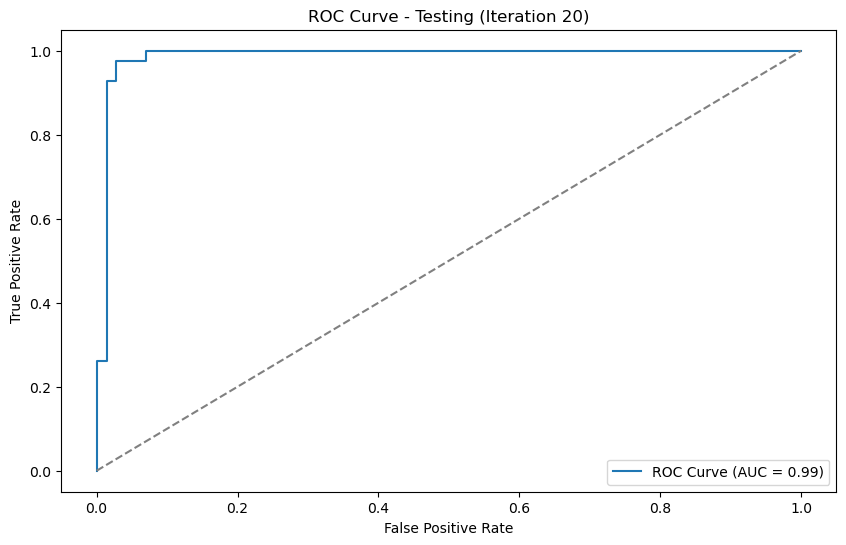

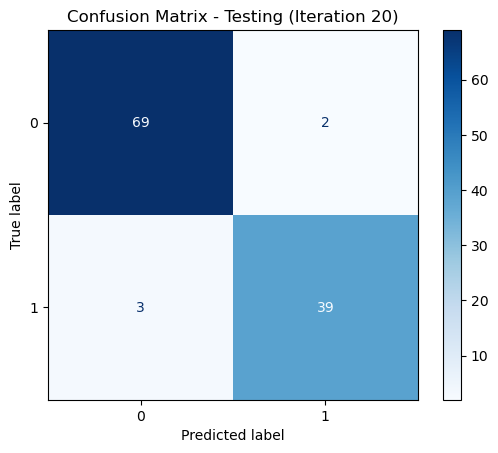

Iteration 20: Training Accuracy = 0.9803, Test Accuracy = 0.9558
Best Parameters: {'C': 10000000.0}



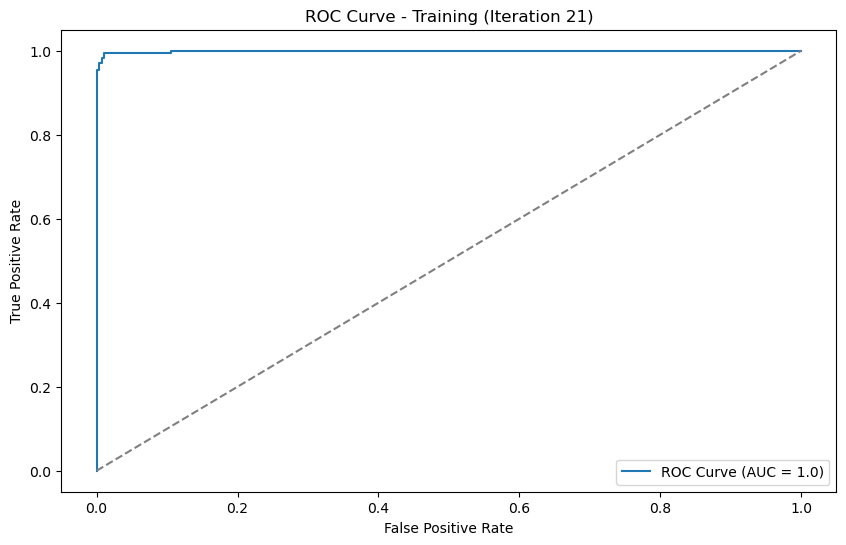

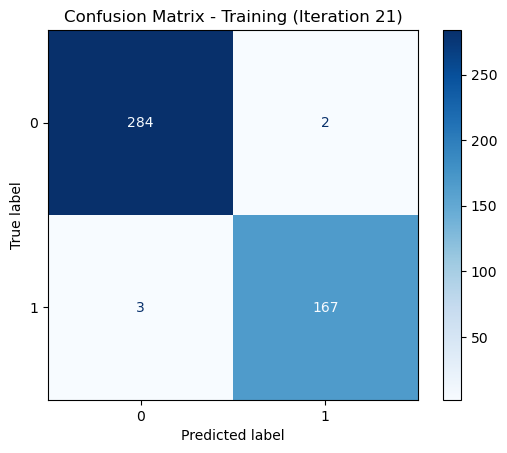

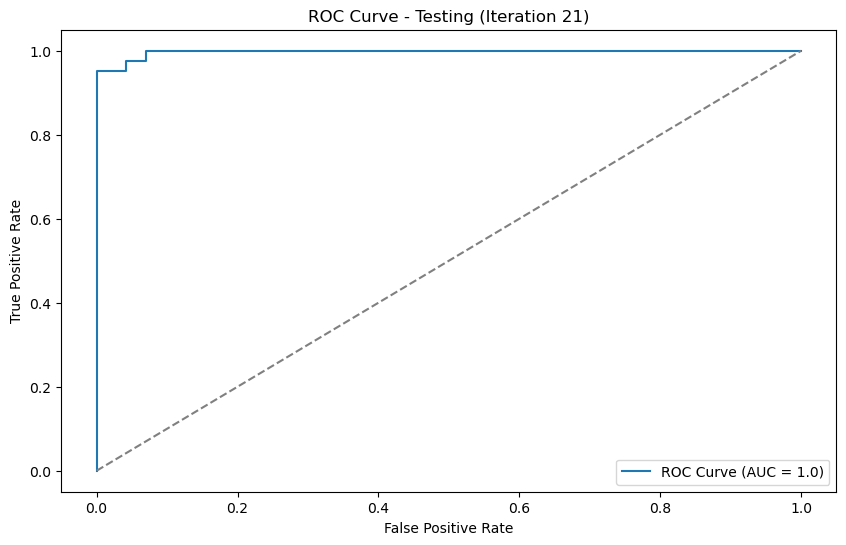

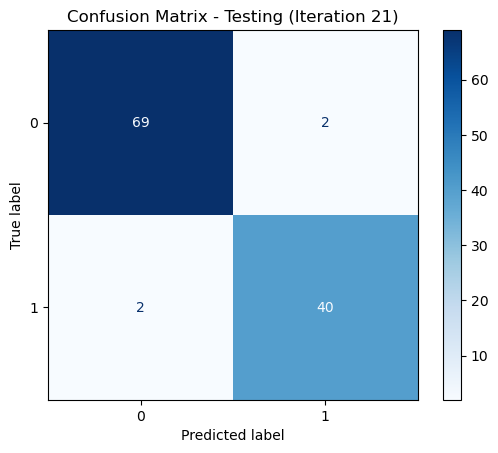

Iteration 21: Training Accuracy = 0.989, Test Accuracy = 0.9646
Best Parameters: {'C': 100000.0}



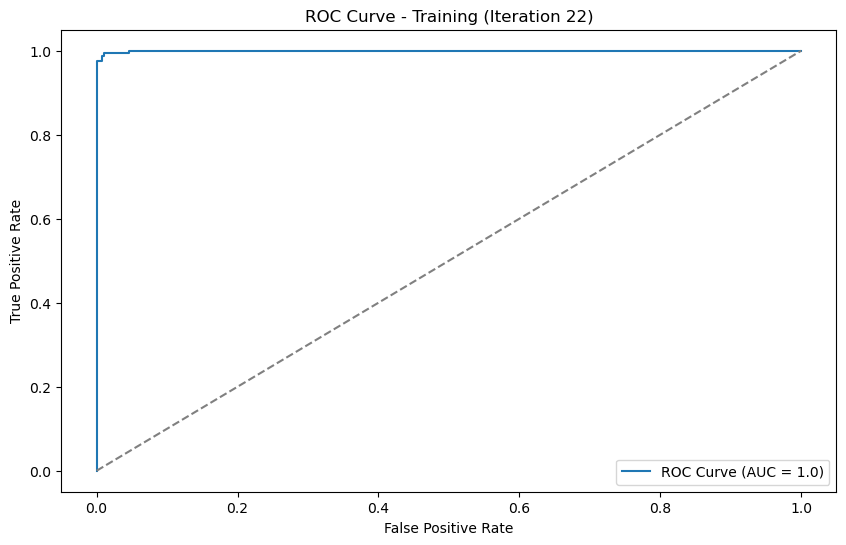

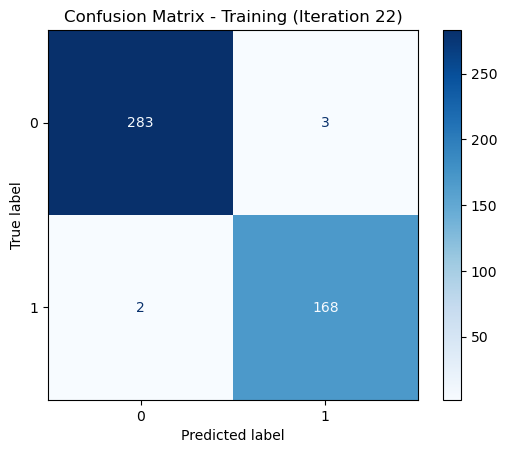

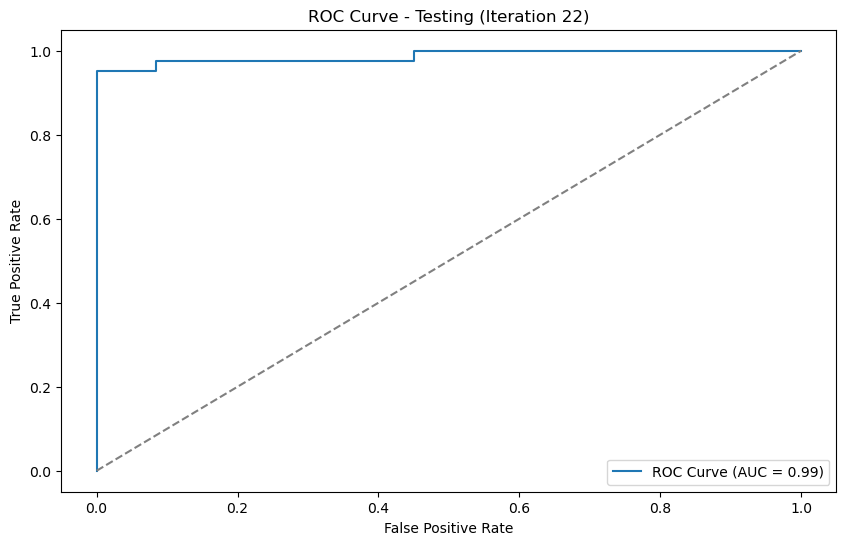

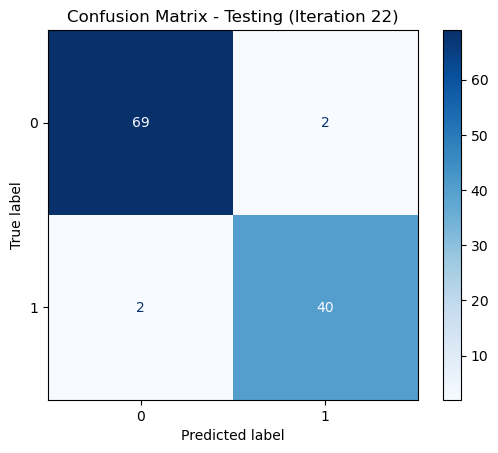

Iteration 22: Training Accuracy = 0.989, Test Accuracy = 0.9646
Best Parameters: {'C': 100000.0}



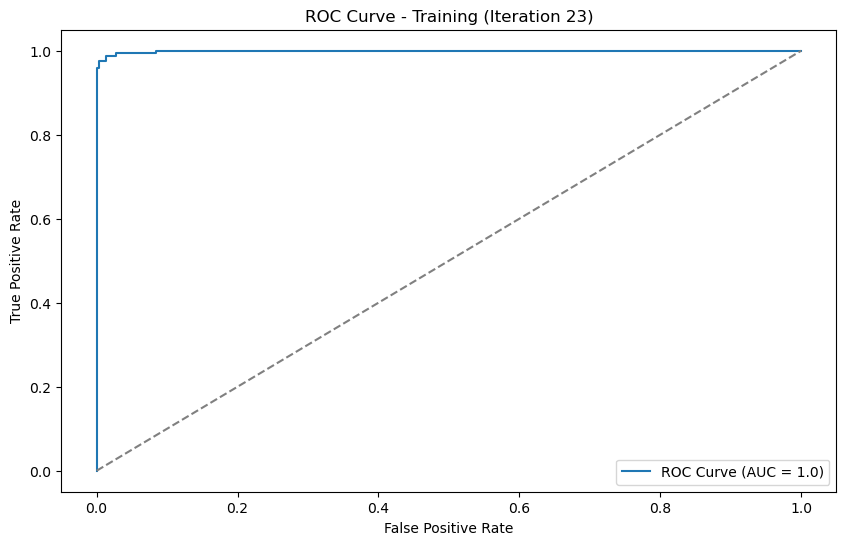

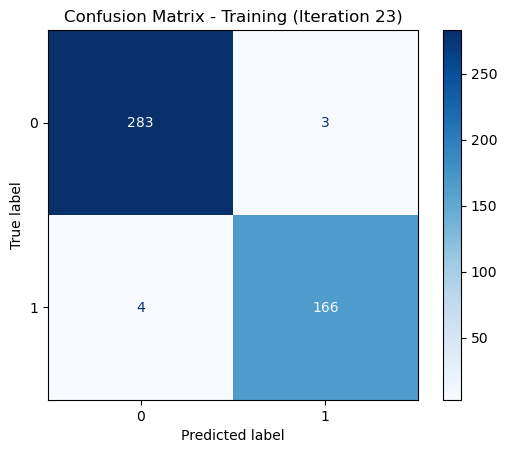

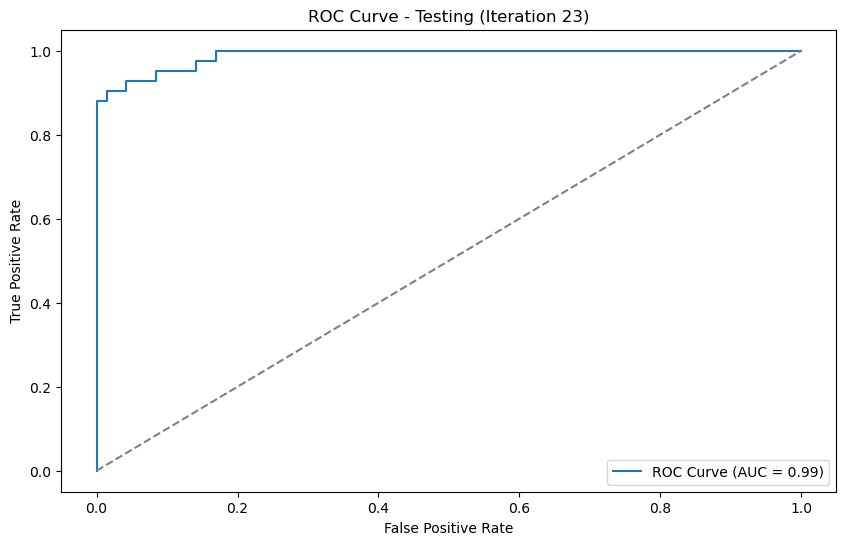

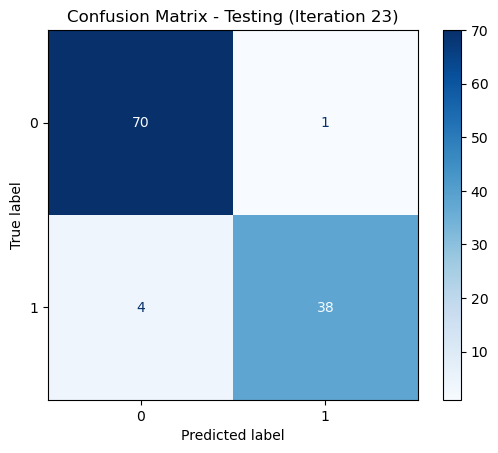

Iteration 23: Training Accuracy = 0.9846, Test Accuracy = 0.9558
Best Parameters: {'C': 10000000.0}



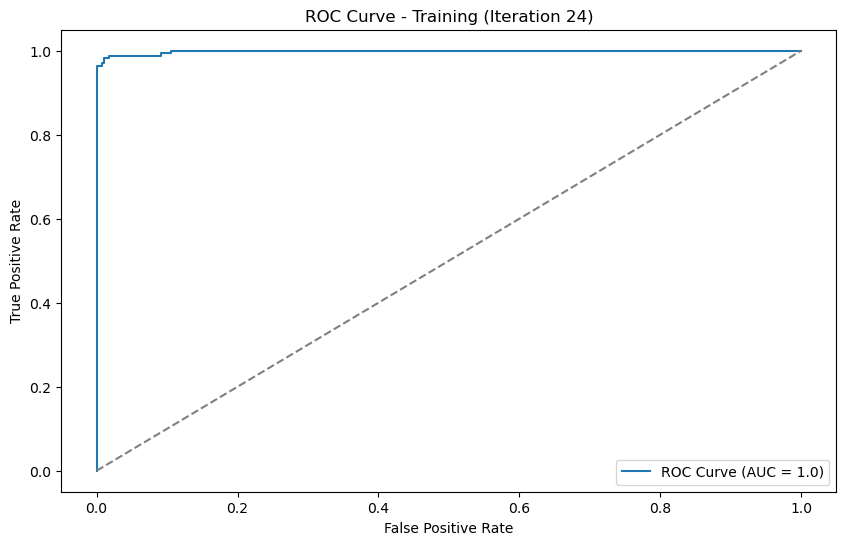

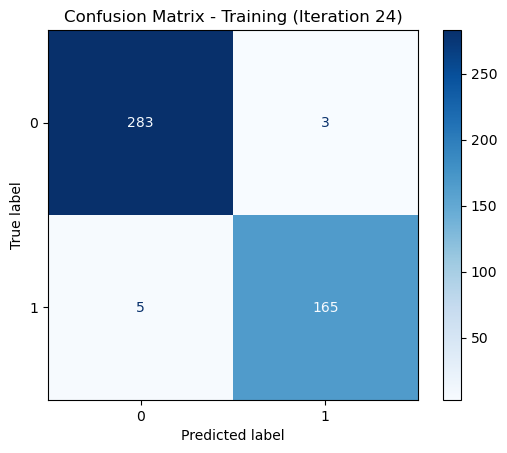

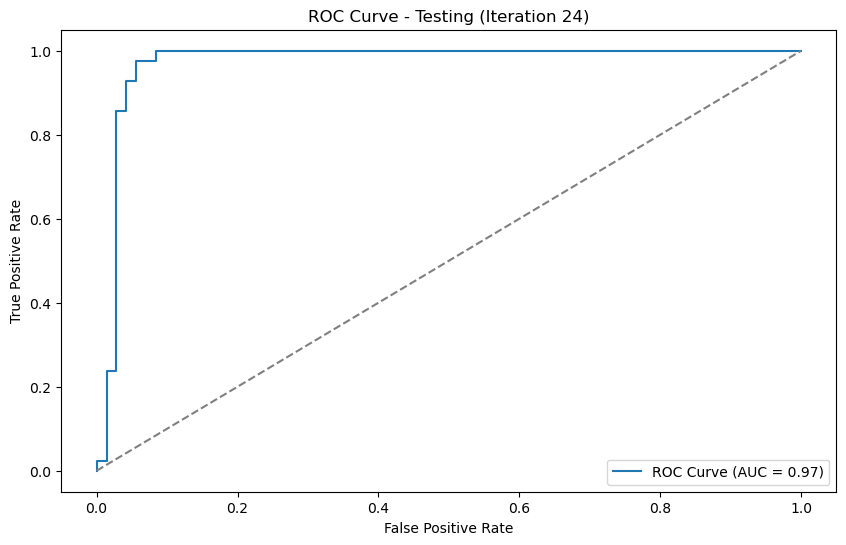

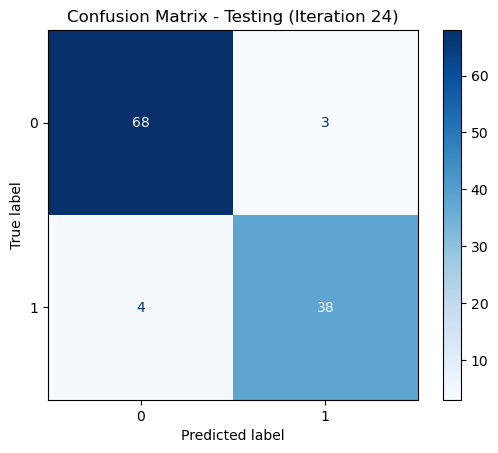

Iteration 24: Training Accuracy = 0.9825, Test Accuracy = 0.9381
Best Parameters: {'C': 10000.0}



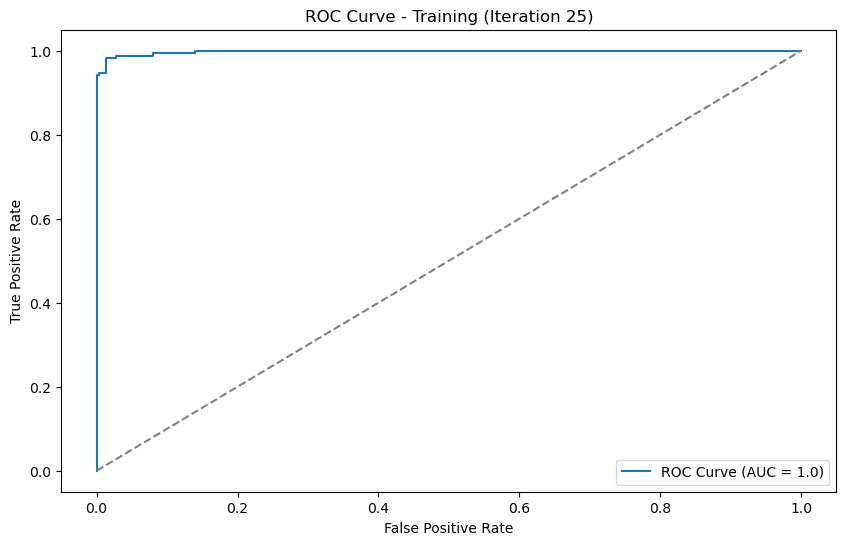

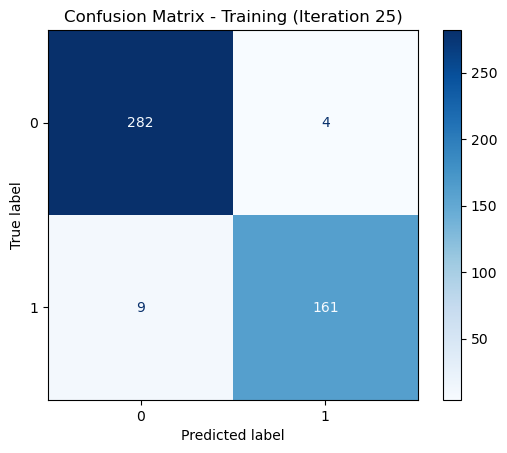

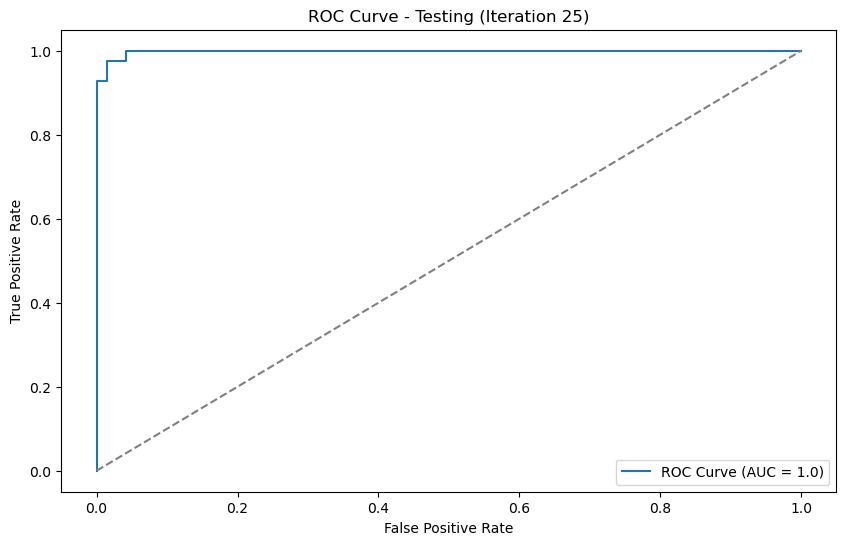

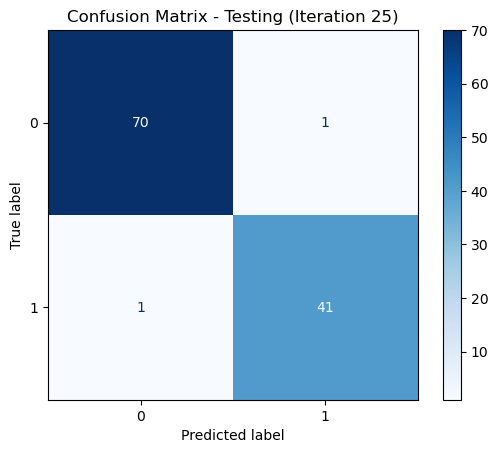

Iteration 25: Training Accuracy = 0.9715, Test Accuracy = 0.9823
Best Parameters: {'C': 10000.0}



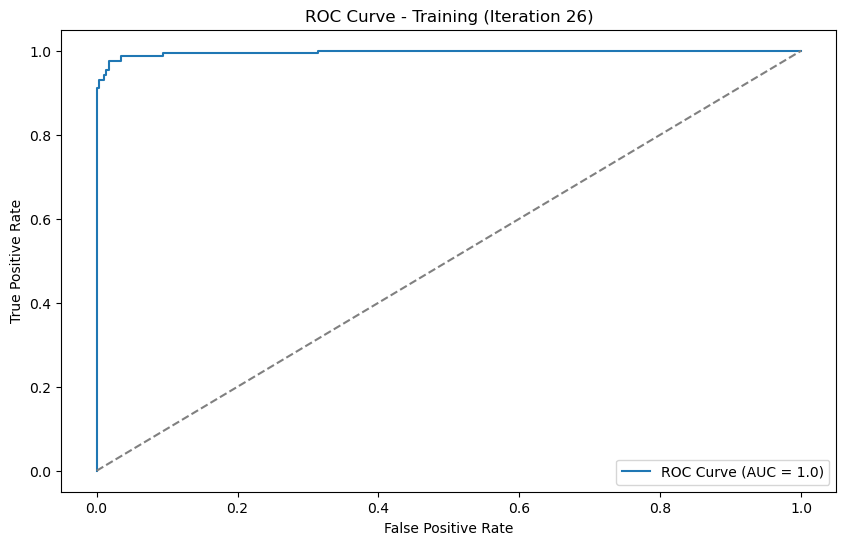

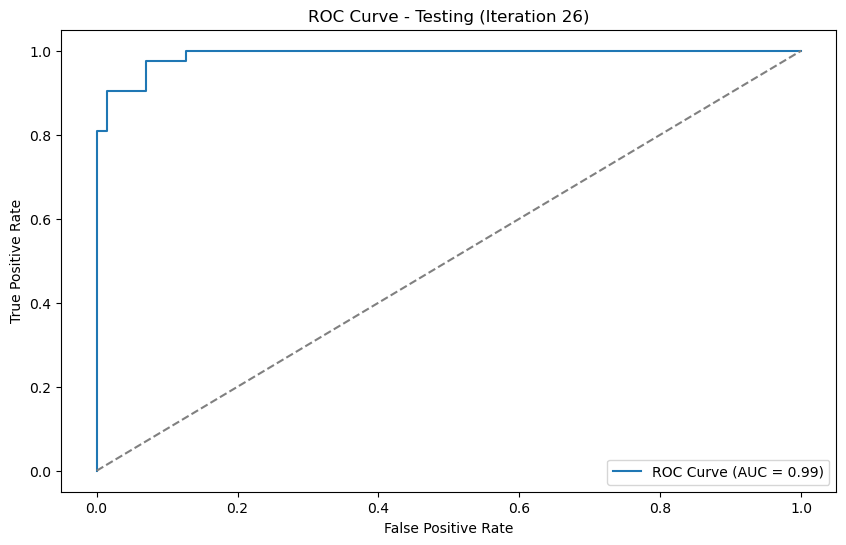

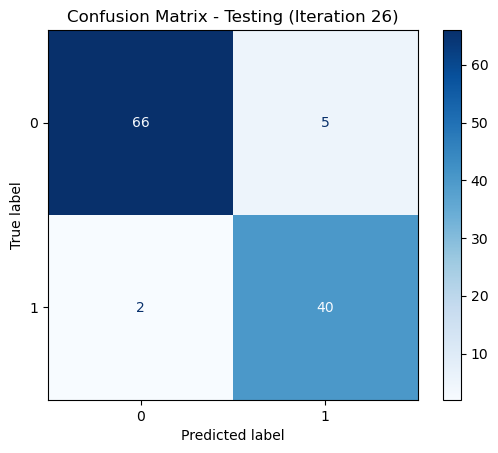

Iteration 26: Training Accuracy = 0.9781, Test Accuracy = 0.9381
Best Parameters: {'C': 1000.0}



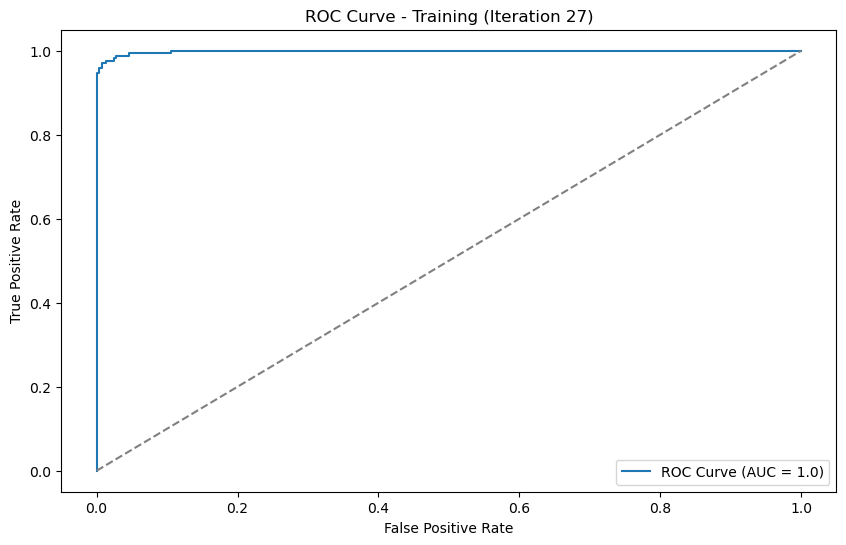

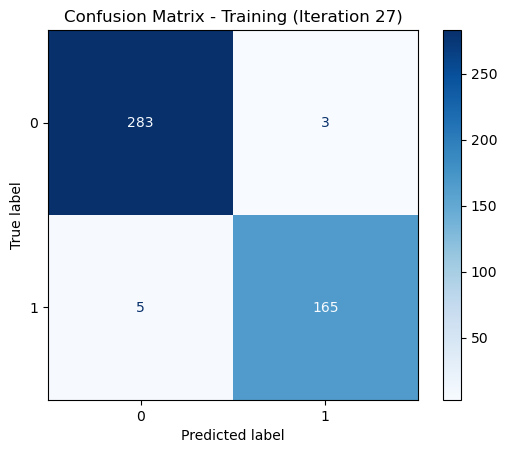

Iteration 27: Training Accuracy = 0.9825, Test Accuracy = 0.9558
Best Parameters: {'C': 10000.0}



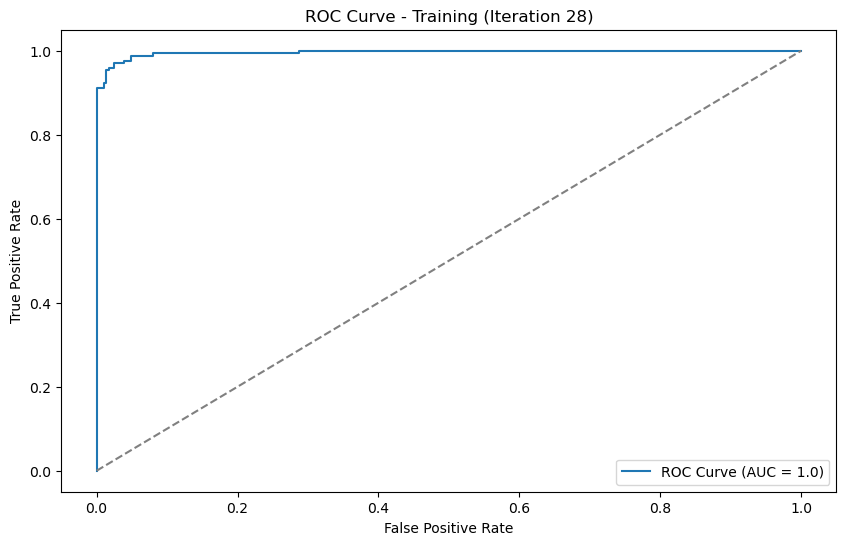

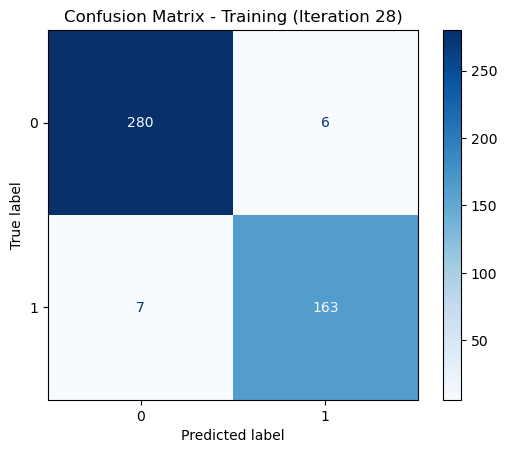

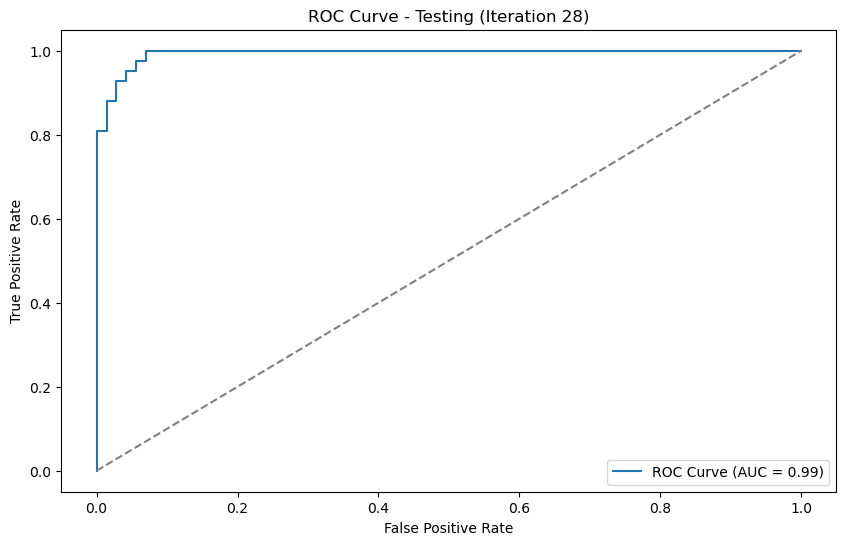

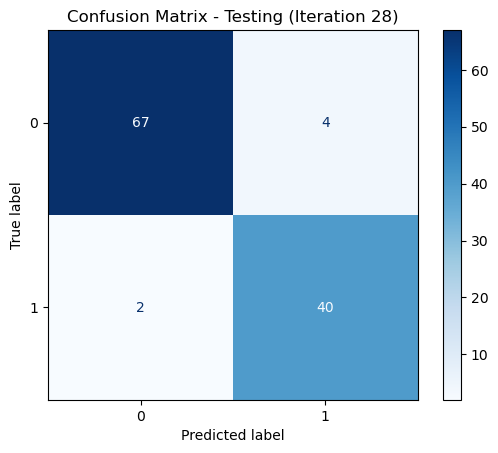

Iteration 28: Training Accuracy = 0.9715, Test Accuracy = 0.9469
Best Parameters: {'C': 1000.0}



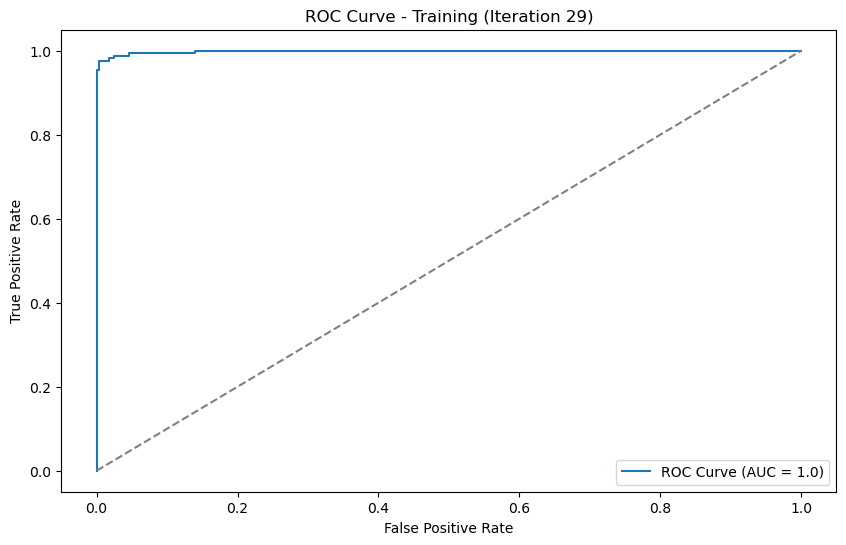

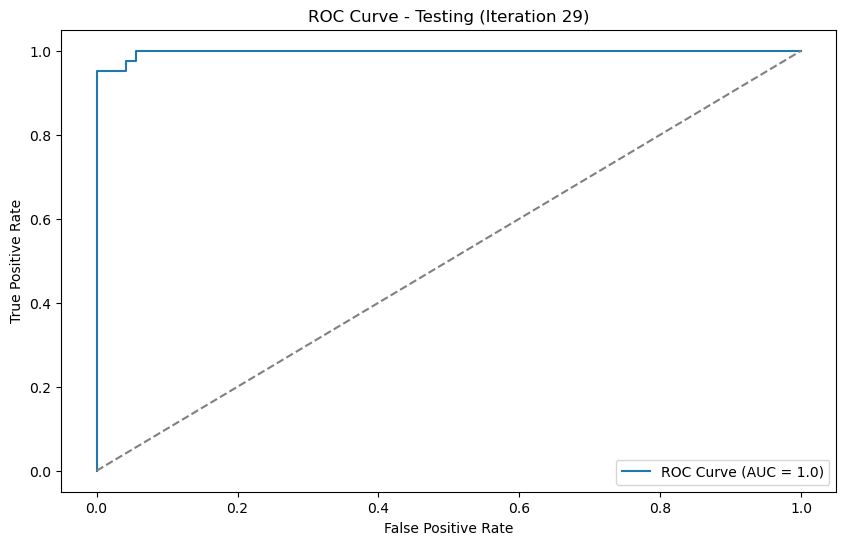

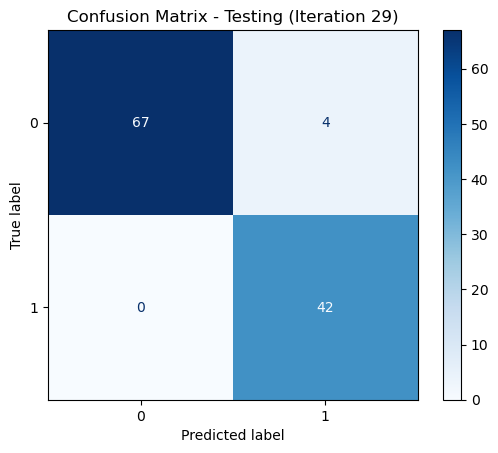

Iteration 29: Training Accuracy = 0.9868, Test Accuracy = 0.9646
Best Parameters: {'C': 10000.0}



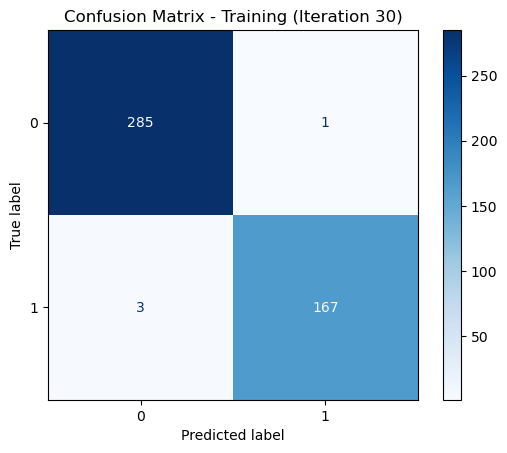

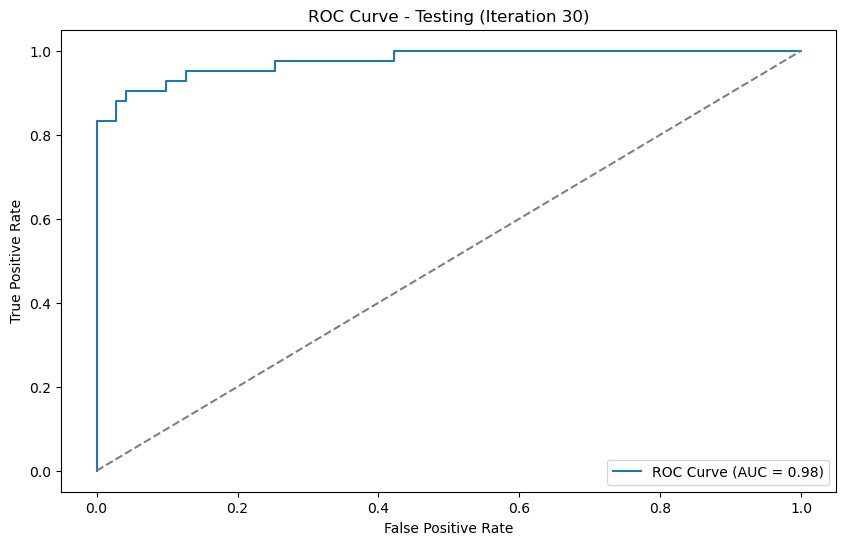

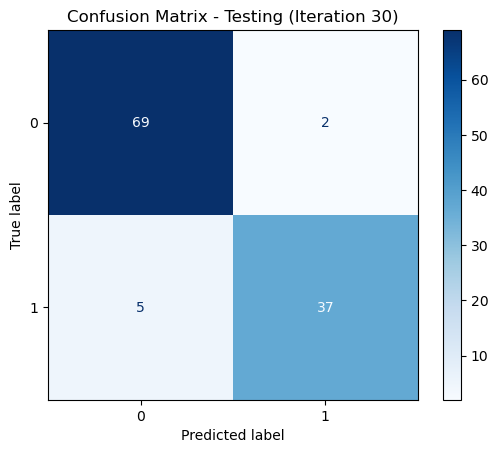

Iteration 30: Training Accuracy = 0.9912, Test Accuracy = 0.9381
Best Parameters: {'C': 100000.0}


--- Summary of Metrics ---
               accuracy  precision    recall  f1-score       auc
Train Average  0.983393    0.98343  0.983393  0.983367  0.998643
Test Average   0.959313    0.95983  0.959313  0.959147  0.987837


In [21]:
algo = 'semi-supervised-svm'
summary['Semi-Supervised SVM'] = monte_carlo_svm(df, 30, algo)

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the lables of the data, and assume k=2.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [24]:
def calculate_roc_metrics(actual, probability):
    fpr, tpr, _ = roc_curve(actual, probability, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return roc_auc

def calculate_results(actual, probability, report):
    roc_auc = calculate_roc_metrics(actual, probability)
    return {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'auc': roc_auc
    }

def compute_distances_and_probabilities(centers, X, cluster_label):
    """Compute distances and probabilities for k-means."""
    distances = np.linalg.norm(X[:, None] - centers[cluster_label], axis=2).diagonal()
    probabilities = softmax(
        np.array([np.linalg.norm(X - center, axis=1) for center in centers]).T,
        axis=1
    )
    return distances, probabilities

def determine_majority_labels(cluster_label, distances, Y):
    """Determine majority labels by finding the 30 nearest points to each center."""
    label_to_cluster = np.zeros(2, dtype=int)
    updated_labels = cluster_label.copy()
    
    for cluster in [0, 1]:
        cluster_indices = np.where(cluster_label == cluster)[0]
        if len(cluster_indices) == 0:
            continue
        # Select 30 nearest points
        top_indices = sorted(cluster_indices, key=lambda idx: distances[idx])[:30]
        majority_label = Y.iloc[top_indices].value_counts().idxmax()
        updated_labels[cluster_indices] = majority_label
        label_to_cluster[majority_label] = cluster
    
    return label_to_cluster, updated_labels

def plot_roc_and_confusion_matrix(y_true, probabilities, predicted, title):
    """Plot ROC curve and confusion matrix."""
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, probabilities, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {round(roc_auc, 2)})")
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, predicted)
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()
    
### Model Training Functions
def initialize_model(train_x, train_y, mode, seed):
    if mode == 'kmeans':
        model = KMeans(n_clusters=2, n_init=15, random_state=seed).fit(train_x)
        cluster_label = model.predict(train_x)
        cluster_centroids = model.cluster_centers_
    else:
        cluster_label = SpectralClustering(
            n_clusters=2, assign_labels='kmeans', affinity='rbf',
            eigen_tol=1e-2, eigen_solver='arpack', random_state=seed
        ).fit_predict(train_x)
        cluster_centroids = [
            np.mean(train_x[cluster_label == i], axis=0) for i in range(2)
        ]
        model = KNeighborsClassifier(n_neighbors=1).fit(train_x, cluster_label)
    
    return model, cluster_label, np.array(cluster_centroids)

def evaluate_model(train_x, train_y, test_x, test_y, model, cluster_centroids, cluster_label):
    """Evaluate k-means clustering results."""
    # Evaluate training data
    distances, probabilities = compute_distances_and_probabilities(cluster_centroids, train_x, cluster_label)
    label_to_cluster, predictions = determine_majority_labels(cluster_label, distances, train_y)
    probabilities = probabilities[:, label_to_cluster[0]]  # Use probabilities for ROC
    train_report = classification_report(train_y, predictions, output_dict=True)
    train_results = calculate_results(train_y, probabilities, train_report)
    
    # Evaluate testing data
    test_cluster_label = model.predict(test_x)
    test_distances, test_probabilities = compute_distances_and_probabilities(cluster_centroids, test_x, test_cluster_label)
    _, test_predictions = determine_majority_labels(test_cluster_label, test_distances, test_y)
    test_probabilities = test_probabilities[:, label_to_cluster[0]]  # Use probabilities for ROC
    test_report = classification_report(test_y, test_predictions, output_dict=True)
    test_results = calculate_results(test_y, test_probabilities, test_report)
    
    return train_results, test_results, probabilities, test_probabilities, predictions, test_predictions


def monte_carlo_unsupervised(data, n_iter, k=2, mode='kmeans'):
    """Run Monte Carlo simulations for unsupervised k-means clustering."""
    stats = ['accuracy', 'precision', 'recall', 'f1-score', 'auc']
    train_results_df = pd.DataFrame(columns=stats)
    test_results_df = pd.DataFrame(columns=stats)
    
    print("Iteration\tTraining Accuracy\tTest Accuracy")
    for iteration in range(n_iter):
        # Split and normalize data
        train_x, test_x, train_y, test_y = split_data(data, seed=iteration)
        normalizer = Normalizer()
        train_x = normalizer.fit_transform(train_x)
        test_x = normalizer.transform(test_x)
        
        # Run k-means with random initialization
        if mode == 'kmeans':
            # Run k-means clustering
            model = KMeans(n_clusters=k, n_init=15, random_state=iteration).fit(train_x)
            cluster_label = model.labels_
            cluster_centroids = model.cluster_centers_
        elif mode == 'spectral':
            # Run spectral clustering with RBF kernel
            model = SpectralClustering(
                n_clusters=k, assign_labels='kmeans', affinity='rbf',
                gamma=1.0, random_state=0
            )
            cluster_label = model.fit_predict(train_x)
            cluster_centroids = np.array([
                np.mean(train_x[cluster_label == i], axis=0) for i in range(k)
            ])
            model = KNeighborsClassifier(n_neighbors=1).fit(train_x, cluster_label)

            
       # Evaluate results
        train_results, test_results, train_probs, test_probs, train_pred, test_pred = evaluate_model(
            train_x, train_y, test_x, test_y, model, cluster_centroids, cluster_label
        )
        
        # Plot ROC and Confusion Matrix for the last iteration
        if iteration == n_iter - 1:
            print("\n--- Plotting Results for Last Run ---\n")
            plot_roc_and_confusion_matrix(train_y, train_probs, train_pred, "Training - Last Run")
            plot_roc_and_confusion_matrix(test_y, test_probs, test_pred, "Testing - Last Run")
        
        # Append results to DataFrames
        train_results_df.loc[len(train_results_df)] = train_results
        test_results_df.loc[len(test_results_df)] = test_results
        
        print(f"{iteration + 1}\t\t{train_results['accuracy']}\t\t{test_results['accuracy']}")
    
    summarize_results(train_results_df, test_results_df)
    return train_results_df, test_results_df

Iteration	Training Accuracy	Test Accuracy
1		0.8881578947368421		0.8761061946902655
2		0.8728070175438597		0.9557522123893806
3		0.8969298245614035		0.8495575221238938
4		0.8859649122807017		0.911504424778761
5		0.8991228070175439		0.8761061946902655
6		0.8859649122807017		0.8672566371681416
7		0.8793859649122807		0.8938053097345132
8		0.8859649122807017		0.8672566371681416
9		0.8881578947368421		0.8584070796460177
10		0.881578947368421		0.8938053097345132
11		0.8925438596491229		0.8761061946902655
12		0.8793859649122807		0.911504424778761
13		0.881578947368421		0.9026548672566371
14		0.8881578947368421		0.8938053097345132
15		0.8969298245614035		0.8495575221238938
16		0.8771929824561403		0.9026548672566371
17		0.9013157894736842		0.831858407079646
18		0.8837719298245614		0.911504424778761
19		0.8859649122807017		0.8849557522123894
20		0.8991228070175439		0.8584070796460177
21		0.8837719298245614		0.911504424778761
22		0.8793859649122807		0.8938053097345132
23		0.8881578947368421		0.88

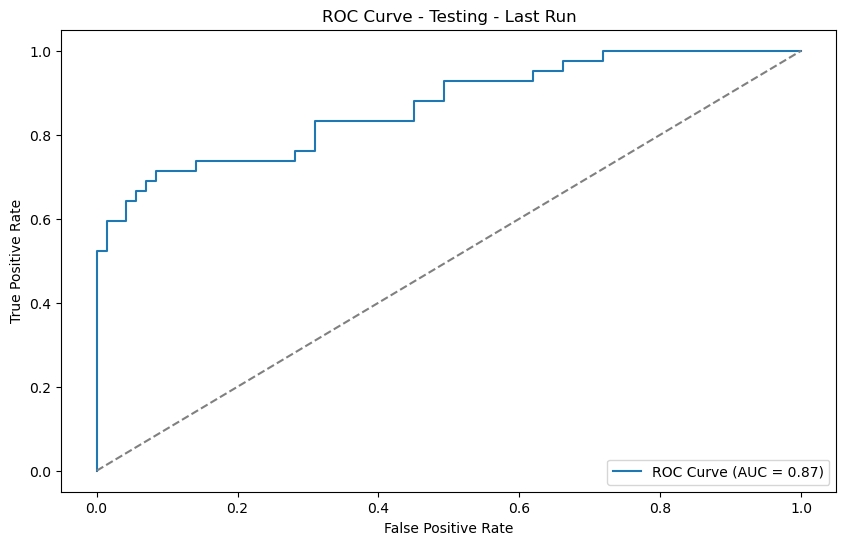

30		0.8925438596491229		0.8407079646017699

--- Summary of Metrics ---
               accuracy  precision    recall  f1-score       auc
Train Average  0.888012   0.896900  0.888012  0.884116  0.950737
Test Average   0.882301   0.894138  0.882301  0.877143  0.945920


In [25]:
train_r, test_r = monte_carlo_unsupervised(df, 30, 2, "kmeans")

### iv. Spectral Clustering:

Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit−predict method.

Iteration	Training Accuracy	Test Accuracy
1		0.8859649122807017		0.8849557522123894
2		0.868421052631579		0.9203539823008849
3		0.8925438596491229		0.8407079646017699
4		0.8793859649122807		0.8761061946902655
5		0.8837719298245614		0.8761061946902655
6		0.8837719298245614		0.8761061946902655
7		0.8728070175438597		0.8938053097345132
8		0.8837719298245614		0.8495575221238938
9		0.8859649122807017		0.8495575221238938
10		0.8771929824561403		0.8761061946902655
11		0.8903508771929824		0.8495575221238938
12		0.8793859649122807		0.8938053097345132
13		0.8793859649122807		0.8938053097345132
14		0.8793859649122807		0.8849557522123894
15		0.8925438596491229		0.8053097345132744
16		0.8728070175438597		0.8849557522123894
17		0.8947368421052632		0.8230088495575221
18		0.881578947368421		0.9292035398230089
19		0.8837719298245614		0.8761061946902655
20		0.8925438596491229		0.8584070796460177
21		0.875		0.911504424778761
22		0.8793859649122807		0.8849557522123894
23		0.8837719298245614		0.87610619469

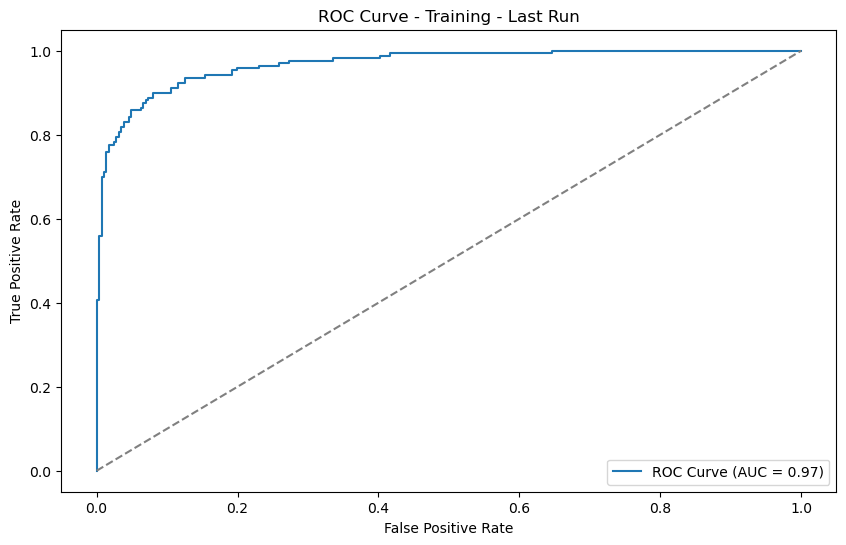

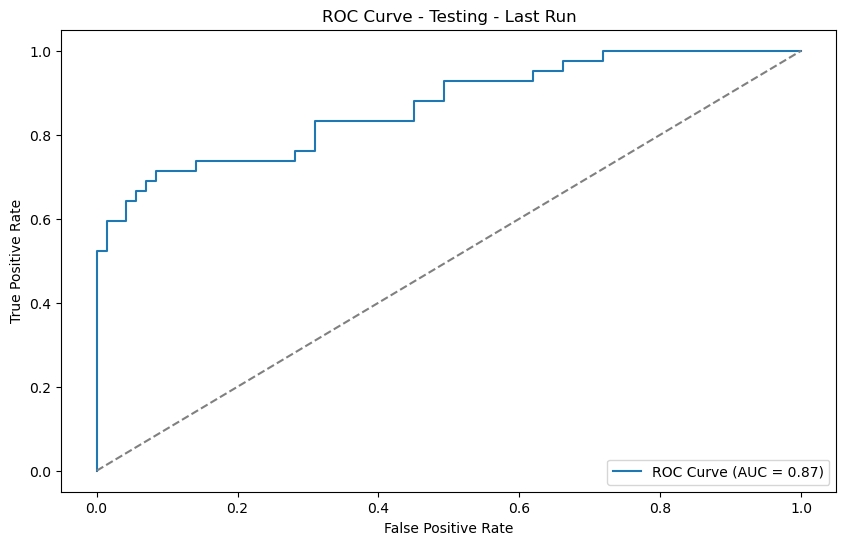

30		0.8925438596491229		0.8230088495575221

--- Summary of Metrics ---
               accuracy  precision    recall  f1-score       auc
Train Average  0.882895   0.893003  0.882895  0.878464  0.950147
Test Average   0.871681   0.885106  0.871681  0.865377  0.945257


(    accuracy  precision    recall  f1-score     auc
 0   0.885965   0.894294  0.885965  0.882089  0.9527
 1   0.868421   0.877499  0.868421  0.863341  0.9391
 2   0.892544   0.902129  0.892544  0.888770  0.9592
 3   0.879386   0.888975  0.879386  0.874871  0.9536
 4   0.883772   0.891307  0.883772  0.879952  0.9471
 5   0.883772   0.893817  0.883772  0.879421  0.9534
 6   0.872807   0.885196  0.872807  0.867276  0.9439
 7   0.883772   0.895223  0.883772  0.879146  0.9522
 8   0.885965   0.896937  0.885965  0.881562  0.9540
 9   0.877193   0.888622  0.877193  0.872156  0.9455
 10  0.890351   0.899086  0.890351  0.886624  0.9501
 11  0.879386   0.888975  0.879386  0.874871  0.9463
 12  0.879386   0.888975  0.879386  0.874871  0.9491
 13  0.879386   0.891820  0.879386  0.874291  0.9442
 14  0.892544   0.899685  0.892544  0.889247  0.9539
 15  0.872807   0.886774  0.872807  0.866954  0.9468
 16  0.894737   0.905215  0.894737  0.890919  0.9600
 17  0.881579   0.892077  0.881579  0.877007  

In [28]:
monte_carlo_unsupervised(df, 30, 2, "spectral")

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

Supervised learning outperform semi-supervised learning, which in turn performs better than unsupervised learning. The difference in performance is small compared to the significant gap between semi-supervised and unsupervised methods. This is because supervised learning benefits from full access to labeled data, which enables it to make more accurate predictions.

Based on the results, supervised learning performs the best, followed by semi-supervised learning, and unsupervised learning lags behind. The semi-supervised method performs better than the unsupervised method due to the partial labeled data, even though it has fewer classes than the fully supervised model. On the other hand, unsupervised learning entirely relies on the patterns in the data, without any labels, which explains its lower performance when compared to both semi-supervised and supervised approaches.

# 2. Activate Learning Using Support Vector Machines

## (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [33]:
df_banknote = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
df_banknote.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']

In [34]:
def choose_data_randomly():    
    train_dp = 900
    test_dp = 472
    test_idx = np.random.choice(df_banknote.shape[0], test_dp, replace=False)
    temp_list = []
    for i in range(df_banknote.shape[0]):
        if i not in test_idx:
            temp_list.append(i);
    train_idx = np.array(temp_list)
    return {
        'train_idx': train_idx,
        'test_idx': test_idx,
    }

In [35]:
index = choose_data_randomly()
x_train = df_banknote.iloc[index['train_idx']]
x_test = df_banknote.iloc[index['test_idx']]

In [36]:
x_train, x_test

(      variance  skewness  kurtosis  entropy  class
 2      3.86600  -2.63830    1.9242  0.10645      0
 3      3.45660   9.52280   -4.0112 -3.59440      0
 4      0.32924  -4.45520    4.5718 -0.98880      0
 5      4.36840   9.67180   -3.9606 -3.16250      0
 7      2.09220  -6.81000    8.4636 -0.60216      0
 ...        ...       ...       ...      ...    ...
 1367   0.40614   1.34920   -1.4501 -0.55949      1
 1368  -1.38870  -4.87730    6.4774  0.34179      1
 1369  -3.75030 -13.45860   17.5932 -2.77710      1
 1370  -3.56370  -8.38270   12.3930 -1.28230      1
 1371  -2.54190  -0.65804    2.6842  1.19520      1
 
 [900 rows x 5 columns],
       variance  skewness   kurtosis  entropy  class
 989   -6.75260   8.81720  -0.061983 -3.72500      1
 765   -3.84830 -12.80470  15.682400 -1.28100      1
 1036  -2.38980  -0.78427   3.014100  0.76205      1
 268    0.92970  -3.79710   4.642900 -0.29570      0
 1106  -0.12690  -1.15050  -0.951380  0.57843      1
 ...        ...       ...      

## (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected data points and L1 penalty(5-fold cross validation). Repeat this process by 10 other randomly selected data points to the pool, until you use all the 900 points. DO NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, ..., 900 data points and their 90 test errors. You have implemented passive learning.

In [39]:
def train_and_evaluate_model(trainX, trainY, testX, testY, settings):
    """Train the classifier and evaluate its performance."""
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(trainX, trainY)
    testPredY = clf.predict(testX)
    testReport = classification_report(testY, testPredY, output_dict=True)
    return testReport['accuracy']

def get_next_pool(touse_idx, pool_size=10):
    """Select the next pool of samples and return the remaining indices."""
    np.random.shuffle(touse_idx)
    pool, touse_idx = touse_idx[:pool_size], touse_idx[pool_size:]
    return pool, touse_idx

def passive_learning(trainX, trainY, testX, testY, settings):
    touse_idx = np.arange(trainX.shape[0])
    used_idx = []
    acc_list = []
    
    while len(touse_idx) > 0:
        pool, touse_idx = get_next_pool(touse_idx)
        used_idx.extend(pool)
        
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        acc = train_and_evaluate_model(used_trainX, used_trainY, testX, testY, settings)
        acc_list.append(acc)
    
    return acc_list

def active_learning2(trainX, trainY, testX, testY, kwargs, max_samples=900):
    touse_idx = np.arange(trainX.shape[0])
    used_idx = []
    acc_list = []
    
    # Initialize with 10 samples
    pool, touse_idx = get_next_pool(touse_idx)
    used_idx.extend(pool)
    
    while len(used_idx) <= max_samples:
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        acc = train_and_evaluate_model(used_trainX, used_trainY, testX, testY, settings)
        acc_list.append(acc)

        if len(touse_idx) == 0:
            break
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
        clf.fit(used_trainX, used_trainY)
        
        dist = clf.decision_function(trainX.iloc[touse_idx])
        sortedarg = np.argsort(np.abs(dist))  # Sort indices by decision function magnitude
        touse_idx = touse_idx[sortedarg]
        
        pool, touse_idx = get_next_pool(touse_idx)
        used_idx.extend(pool)
    
    return acc_list

def active_learning(trainX, trainY, testX, testY, settings):
    touse_idx = np.arange(trainX.shape[0])
    used_idx = []
    acc_list = []

    # Initial pool of 10 samples
    np.random.shuffle(touse_idx)
    pool, touse_idx = touse_idx[:10], touse_idx[10:]
    used_idx.extend(pool)

    while len(used_idx) <= 900:
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]

        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)

        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])

        if len(touse_idx) == 0:
            break

        # Active learning: sort by decision function confidence
        dist = clf.decision_function(trainX.iloc[touse_idx])
        sortedarg = np.argsort(np.abs(dist))  # Sort indices by confidence
        touse_idx = touse_idx[sortedarg]

        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)

    return acc_list

def monte_carlo_2(data, n, mode):
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    kwargs = {
        'param_grid': tuned_params,
        'scoring': 'f1_weighted',
        'n_jobs': -1,
        'verbose': 0
    }
    
    learning_curve = []
    
    for i in range(n):
        index = choose_data_randomly() 
        train_idx, test_idx = index['train_idx'], index['test_idx']
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        
        # normalizer = Normalizer()
        # trainX = normalizer.fit_transform(trainX)
        # testX = normalizer.transform(testX)
        
        kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
        if mode == 'passive':
            acc_list = passive_learning(trainX, trainY, testX, testY, kwargs)
        elif mode == 'active':
            acc_list = active_learning(trainX, trainY, testX, testY, kwargs)
        
        learning_curve.append(acc_list)
        
        print(f"Iteration {i + 1} | Testing accuracy for 10 samples: {round(acc_list[0], 2)} | Testing accuracy for 900 samples: {round(acc_list[-1], 2)}")
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    
    return learning_curve

In [40]:
passive_lc = monte_carlo_2(df_banknote, 50, "passive")

Iteration 1 | Testing accuracy for 10 samples: 0.96 | Testing accuracy for 900 samples: 0.99
Iteration 2 | Testing accuracy for 10 samples: 0.89 | Testing accuracy for 900 samples: 1.0
Iteration 3 | Testing accuracy for 10 samples: 0.83 | Testing accuracy for 900 samples: 0.99
Iteration 4 | Testing accuracy for 10 samples: 0.92 | Testing accuracy for 900 samples: 0.99
Iteration 5 | Testing accuracy for 10 samples: 0.92 | Testing accuracy for 900 samples: 1.0
Iteration 6 | Testing accuracy for 10 samples: 0.97 | Testing accuracy for 900 samples: 0.99
Iteration 7 | Testing accuracy for 10 samples: 0.91 | Testing accuracy for 900 samples: 0.99
Iteration 8 | Testing accuracy for 10 samples: 0.64 | Testing accuracy for 900 samples: 0.99
Iteration 9 | Testing accuracy for 10 samples: 0.89 | Testing accuracy for 900 samples: 0.99
Iteration 10 | Testing accuracy for 10 samples: 0.94 | Testing accuracy for 900 samples: 0.99
Iteration 11 | Testing accuracy for 10 samples: 0.89 | Testing accuracy

### ii. Train a SVM with a pool of 10 randomly selected data points from the training set 5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [42]:
active_lc =  monte_carlo_2(df_banknote, 50, "active")

Iteration 1 | Testing accuracy for 10 samples: 0.95 | Testing accuracy for 900 samples: 0.99
Iteration 2 | Testing accuracy for 10 samples: 0.82 | Testing accuracy for 900 samples: 0.99
Iteration 3 | Testing accuracy for 10 samples: 0.99 | Testing accuracy for 900 samples: 1.0
Iteration 4 | Testing accuracy for 10 samples: 0.86 | Testing accuracy for 900 samples: 0.99
Iteration 5 | Testing accuracy for 10 samples: 0.85 | Testing accuracy for 900 samples: 0.99
Iteration 6 | Testing accuracy for 10 samples: 0.88 | Testing accuracy for 900 samples: 0.99
Iteration 7 | Testing accuracy for 10 samples: 0.58 | Testing accuracy for 900 samples: 0.99
Iteration 8 | Testing accuracy for 10 samples: 0.96 | Testing accuracy for 900 samples: 0.99
Iteration 9 | Testing accuracy for 10 samples: 0.65 | Testing accuracy for 900 samples: 0.99
Iteration 10 | Testing accuracy for 10 samples: 0.85 | Testing accuracy for 900 samples: 0.99
Iteration 11 | Testing accuracy for 10 samples: 0.97 | Testing accurac

## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

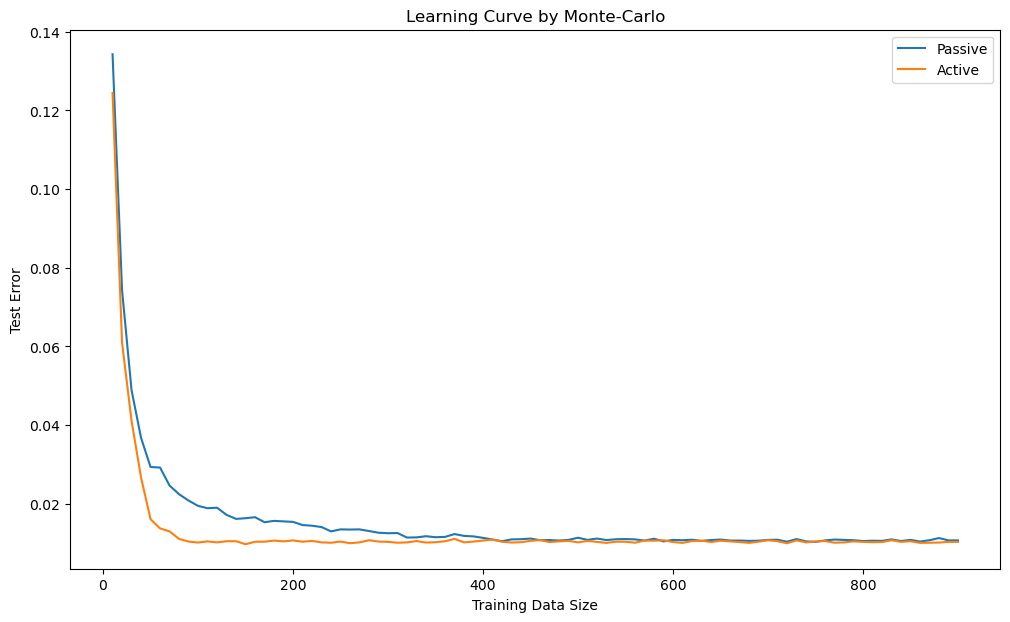

In [44]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.set_title(f"Learning Curve by Monte-Carlo")
x = 10 * np.arange(1, 91)
axes.plot(x, 1 - passive_lc, label='Passive')
axes.plot(x, 1 - active_lc, label='Active')
axes.set_xlabel("Training Data Size")
axes.set_ylabel("Test Error")
axes.legend()
plt.show()